#### 파일 탐색

In [253]:
import os
import os.path as path
import glob

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [254]:
BaseFilePath = 'd:\Codeit\intermediate_project'
filelist = os.listdir(BaseFilePath)

# filter filename
dirname = [f for f in filelist if not f.endswith('.zip')][1]
print(dirname)

주제 2. 구독서비스 프로덕트 데이터 분석


<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20852\4155365745.py:1: SyntaxWarning: invalid escape sequence '\C'
  BaseFilePath = 'd:\Codeit\intermediate_project'


In [255]:
# set common columns
common_cols = []

# get filelist
filelist = os.listdir(path.join(BaseFilePath, dirname))

# read csv files and check common columns
for filename in filelist:
    # csv
    if filename.endswith('.csv'):
        print('csv file found')
    
        # read csv
        
        df = list(pd.read_csv(path.join(BaseFilePath, dirname, filename), chunksize=2000000))
        
        if len(df) == 1:
            df = df[0]
        else:
            df = pd.concat(df)

        # if common columns are not set, set it            
        if common_cols == [] and list(df.columns):
            common_cols = list(df.columns)
        
        # if common columns are set, check common columns
        common_cols = list(set(common_cols).intersection(set(df.columns)))

    # if not csv, just pass    
    else:
        print('other file found')
        print(filename)

print(common_cols)

csv file found
csv file found


csv file found


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20852\2327004738.py:15: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = list(pd.read_csv(path.join(BaseFilePath, dirname, filename), chunksize=2000000))


csv file found
csv file found
csv file found
csv file found
csv file found
csv file found
csv file found


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20852\2327004738.py:15: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = list(pd.read_csv(path.join(BaseFilePath, dirname, filename), chunksize=2000000))
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20852\2327004738.py:15: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = list(pd.read_csv(path.join(BaseFilePath, dirname, filename), chunksize=2000000))
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20852\2327004738.py:15: DtypeWarning: Columns (9,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = list(pd.read_csv(path.join(BaseFilePath, dirname, filename), chunksize=2000000))
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20852\2327004738.py:15: DtypeWarning: Columns (9,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df 

csv file found
csv file found
csv file found
csv file found
csv file found
csv file found
csv file found
other file found
중급1_구독서비스 데이터 이벤트 명세서.xlsx
['event_type', 'language', 'country', 'os_name', 'device_family', 'device_type', 'client_event_time', 'device_carrier', 'platform', 'city', 'user_id', 'os_version']


In [256]:
core_cols = ['user_id', 'event_type', 'client_event_time']

In [257]:
# set dfs
dfs = []

## process files
# get filelist
filelist = os.listdir(path.join(BaseFilePath, dirname))
print("\n\n", filelist)

# set unique values of common columns
col_unique_dict = dict(map(lambda x: (x, set()), common_cols))
print("\n\n", col_unique_dict)

device_and_familiy = set()
country_and_city = set()

# read csv files and check common columns
for filename in filelist:
    print("\n\n", filename)

    # csv
    if filename.endswith('.csv'):
        print('csv file found')
    
        # read csv
        df = list(pd.read_csv(path.join(BaseFilePath, dirname, filename), chunksize = 2000000))[0]

        print(df.columns)
        display(df.info())
        
        # update unique values of common columns
        for col in common_cols:
            
            if col in core_cols:
                continue
            
            col_unique_dict[col].update(df[col].unique())
        
        # drop device_carrier
        df = df.drop('device_carrier', axis=1)
        # convert client_event_time to datetime
        df['client_event_time'] = pd.to_datetime(df['client_event_time'])

        dfs.append(df)

        # before update, fillna with 'unknown'
        df[['country', 'city', 'device_type', 'device_family']].fillna('unknown', inplace=True)
        
        # update unique values of device_type and device_family
        device_and_familiy.update(set(df[['device_type', 'device_family']].value_counts().index))
        country_and_city.update(set(df[['country', 'city']].value_counts().index))
        
            
    # xlsx
    elif filename.endswith('.xlsx'):
        print('xlsx file found')
        
        # read xlsx
        df = pd.read_excel(path.join(BaseFilePath, dirname, filename))
        print(df.columns)
        display(df.info())
        display(df)
    
    # if not csv, just pass    
    else:
        print('other file found')
        print(filename)



 ['click.cancel_plan_button.csv', 'click.content_page_more_review_button.csv', 'click.content_page_start_content_button.csv', 'click.lesson_page_related_question_box.csv', 'complete.lesson.csv', 'complete.signup.csv', 'complete.subscription.csv', 'end.content.csv', 'enter.content_page.csv', 'enter.lesson_page-002.csv', 'enter.main_page.csv', 'enter.payment_page.csv', 'enter.signup_page.csv', 'renew.subscription.csv', 'resubscribe.subscription.csv', 'start.content.csv', 'start.free_trial.csv', '중급1_구독서비스 데이터 이벤트 명세서.xlsx']


 {'event_type': set(), 'language': set(), 'country': set(), 'os_name': set(), 'device_family': set(), 'device_type': set(), 'client_event_time': set(), 'device_carrier': set(), 'platform': set(), 'city': set(), 'user_id': set(), 'os_version': set()}


 click.cancel_plan_button.csv
csv file found
Index(['city', 'client_event_time', 'country', 'device_carrier',
       'device_family', 'device_type', 'event_type', 'language', 'os_name',
       'os_version', 'platform

None



 click.content_page_more_review_button.csv
csv file found


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20852\3804510366.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['country', 'city', 'device_type', 'device_family']].fillna('unknown', inplace=True)


Index(['city', 'client_event_time', 'country', 'device_carrier',
       'device_family', 'device_type', 'event_type', 'language', 'os_name',
       'os_version', 'platform', 'user_id', 'content.id'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93962 entries, 0 to 93961
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city               93792 non-null  object 
 1   client_event_time  93962 non-null  object 
 2   country            93944 non-null  object 
 3   device_carrier     0 non-null      float64
 4   device_family      93962 non-null  object 
 5   device_type        93909 non-null  object 
 6   event_type         93962 non-null  object 
 7   language           93962 non-null  object 
 8   os_name            93962 non-null  object 
 9   os_version         93959 non-null  object 
 10  platform           93962 non-null  object 
 11  user_id            10702 non-null  objec

None

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20852\3804510366.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['country', 'city', 'device_type', 'device_family']].fillna('unknown', inplace=True)




 click.content_page_start_content_button.csv
csv file found
Index(['city', 'client_event_time', 'country', 'device_carrier',
       'device_family', 'device_type', 'event_type', 'language', 'os_name',
       'os_version', 'platform', 'user_id', 'content.id', 'button.name',
       'button_name'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172911 entries, 0 to 172910
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   city               169437 non-null  object 
 1   client_event_time  172911 non-null  object 
 2   country            171495 non-null  object 
 3   device_carrier     0 non-null       float64
 4   device_family      172911 non-null  object 
 5   device_type        171581 non-null  object 
 6   event_type         172911 non-null  object 
 7   language           172911 non-null  object 
 8   os_name            172911 non-null  object 
 9   os_version         17259

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20852\3804510366.py:25: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = list(pd.read_csv(path.join(BaseFilePath, dirname, filename), chunksize = 2000000))[0]


None

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20852\3804510366.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['country', 'city', 'device_type', 'device_family']].fillna('unknown', inplace=True)




 click.lesson_page_related_question_box.csv
csv file found
Index(['city', 'client_event_time', 'country', 'device_carrier',
       'device_family', 'device_type', 'event_type', 'language', 'os_name',
       'os_version', 'platform', 'user_id', 'question.id', 'content.id',
       'lesson.id'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379136 entries, 0 to 1379135
Data columns (total 15 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   city               1355675 non-null  object 
 1   client_event_time  1379136 non-null  object 
 2   country            1364245 non-null  object 
 3   device_carrier     0 non-null        float64
 4   device_family      1379135 non-null  object 
 5   device_type        1372802 non-null  object 
 6   event_type         1379136 non-null  object 
 7   language           1379136 non-null  object 
 8   os_name            1379135 non-null  object 
 9   os_version    

None

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20852\3804510366.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['country', 'city', 'device_type', 'device_family']].fillna('unknown', inplace=True)




 complete.lesson.csv
csv file found
Index(['city', 'client_event_time', 'country', 'device_carrier',
       'device_family', 'device_type', 'event_type', 'language', 'os_name',
       'os_version', 'platform', 'user_id', 'content.id', 'lesson.id'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 14 columns):
 #   Column             Dtype  
---  ------             -----  
 0   city               object 
 1   client_event_time  object 
 2   country            object 
 3   device_carrier     float64
 4   device_family      object 
 5   device_type        object 
 6   event_type         object 
 7   language           object 
 8   os_name            object 
 9   os_version         object 
 10  platform           object 
 11  user_id            object 
 12  content.id         object 
 13  lesson.id          object 
dtypes: float64(1), object(13)
memory usage: 213.6+ MB


None

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20852\3804510366.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['country', 'city', 'device_type', 'device_family']].fillna('unknown', inplace=True)




 complete.signup.csv
csv file found
Index(['city', 'client_event_time', 'country', 'device_carrier',
       'device_family', 'device_type', 'event_type', 'language', 'os_name',
       'os_version', 'platform', 'user_id', 'type'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145133 entries, 0 to 145132
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   city               44774 non-null   object 
 1   client_event_time  145133 non-null  object 
 2   country            45756 non-null   object 
 3   device_carrier     0 non-null       float64
 4   device_family      45767 non-null   object 
 5   device_type        44659 non-null   object 
 6   event_type         145133 non-null  object 
 7   language           45767 non-null   object 
 8   os_name            45745 non-null   object 
 9   os_version         45651 non-null   object 
 10  platform           45767 non-null   object

None



 complete.subscription.csv
csv file found
Index(['city', 'client_event_time', 'country', 'device_carrier',
       'device_family', 'device_type', 'event_type', 'language', 'os_name',
       'os_version', 'platform', 'user_id', 'plan.price', 'paid_amount',
       'coupon.discount_amount', 'pg.type'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14289 entries, 0 to 14288
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    13757 non-null  object 
 1   client_event_time       14289 non-null  object 
 2   country                 13906 non-null  object 
 3   device_carrier          0 non-null      float64
 4   device_family           13914 non-null  object 
 5   device_type             13764 non-null  object 
 6   event_type              14289 non-null  object 
 7   language                13914 non-null  object 
 8   os_name                 13908 n

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20852\3804510366.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['country', 'city', 'device_type', 'device_family']].fillna('unknown', inplace=True)


None



 end.content.csv
csv file found


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20852\3804510366.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['country', 'city', 'device_type', 'device_family']].fillna('unknown', inplace=True)


Index(['city', 'client_event_time', 'country', 'device_carrier',
       'device_family', 'device_type', 'event_type', 'language', 'os_name',
       'os_version', 'platform', 'user_id', 'content.id'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120582 entries, 0 to 120581
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   city               116280 non-null  object 
 1   client_event_time  120582 non-null  object 
 2   country            117182 non-null  object 
 3   device_carrier     0 non-null       float64
 4   device_family      119391 non-null  object 
 5   device_type        118866 non-null  object 
 6   event_type         120582 non-null  object 
 7   language           119392 non-null  object 
 8   os_name            119387 non-null  object 
 9   os_version         119362 non-null  object 
 10  platform           119392 non-null  object 
 11  user_id            120582

None

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20852\3804510366.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['country', 'city', 'device_type', 'device_family']].fillna('unknown', inplace=True)




 enter.content_page.csv
csv file found
Index(['city', 'client_event_time', 'country', 'device_carrier',
       'device_family', 'device_type', 'event_type', 'language', 'os_name',
       'os_version', 'platform', 'user_id', 'content.id'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914257 entries, 0 to 1914256
Data columns (total 13 columns):
 #   Column             Dtype  
---  ------             -----  
 0   city               object 
 1   client_event_time  object 
 2   country            object 
 3   device_carrier     float64
 4   device_family      object 
 5   device_type        object 
 6   event_type         object 
 7   language           object 
 8   os_name            object 
 9   os_version         object 
 10  platform           object 
 11  user_id            object 
 12  content.id         object 
dtypes: float64(1), object(12)
memory usage: 189.9+ MB


None

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20852\3804510366.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['country', 'city', 'device_type', 'device_family']].fillna('unknown', inplace=True)




 enter.lesson_page-002.csv
csv file found


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20852\3804510366.py:25: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = list(pd.read_csv(path.join(BaseFilePath, dirname, filename), chunksize = 2000000))[0]
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20852\3804510366.py:25: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = list(pd.read_csv(path.join(BaseFilePath, dirname, filename), chunksize = 2000000))[0]
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20852\3804510366.py:25: DtypeWarning: Columns (9,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = list(pd.read_csv(path.join(BaseFilePath, dirname, filename), chunksize = 2000000))[0]
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20852\3804510366.py:25: DtypeWarning: Columns (9,15) have mixed types. Specify dtype option on import or set low_memo

Index(['city', 'client_event_time', 'country', 'device_carrier',
       'device_family', 'device_type', 'event_type', 'language', 'os_name',
       'os_version', 'platform', 'user_id', 'content.id', 'is_trial',
       'lesson.id', 'is_free_trial'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   city               object 
 1   client_event_time  object 
 2   country            object 
 3   device_carrier     float64
 4   device_family      object 
 5   device_type        object 
 6   event_type         object 
 7   language           object 
 8   os_name            object 
 9   os_version         object 
 10  platform           object 
 11  user_id            object 
 12  content.id         object 
 13  is_trial           object 
 14  lesson.id          object 
 15  is_free_trial      float64
dtypes: float64(2), object(14)
memory us

None

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20852\3804510366.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['country', 'city', 'device_type', 'device_family']].fillna('unknown', inplace=True)




 enter.main_page.csv
csv file found
Index(['city', 'client_event_time', 'country', 'device_carrier',
       'device_family', 'device_type', 'event_type', 'language', 'os_name',
       'os_version', 'platform', 'user_id'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   city               object 
 1   client_event_time  object 
 2   country            object 
 3   device_carrier     float64
 4   device_family      object 
 5   device_type        object 
 6   event_type         object 
 7   language           object 
 8   os_name            object 
 9   os_version         object 
 10  platform           object 
 11  user_id            object 
dtypes: float64(1), object(11)
memory usage: 183.1+ MB


None

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20852\3804510366.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['country', 'city', 'device_type', 'device_family']].fillna('unknown', inplace=True)




 enter.payment_page.csv
csv file found
Index(['city', 'client_event_time', 'country', 'device_carrier',
       'device_family', 'device_type', 'event_type', 'language', 'os_name',
       'os_version', 'platform', 'user_id'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165061 entries, 0 to 165060
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   city               162362 non-null  object 
 1   client_event_time  165061 non-null  object 
 2   country            164899 non-null  object 
 3   device_carrier     0 non-null       float64
 4   device_family      165060 non-null  object 
 5   device_type        159066 non-null  object 
 6   event_type         165061 non-null  object 
 7   language           165061 non-null  object 
 8   os_name            165061 non-null  object 
 9   os_version         164560 non-null  object 
 10  platform           165061 non-null  object 
 11

None

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20852\3804510366.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['country', 'city', 'device_type', 'device_family']].fillna('unknown', inplace=True)




 enter.signup_page.csv
csv file found
Index(['city', 'client_event_time', 'country', 'device_carrier',
       'device_family', 'device_type', 'event_type', 'language', 'os_name',
       'os_version', 'platform', 'user_id'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596829 entries, 0 to 596828
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   city               581024 non-null  object 
 1   client_event_time  596829 non-null  object 
 2   country            596315 non-null  object 
 3   device_carrier     0 non-null       float64
 4   device_family      596747 non-null  object 
 5   device_type        567387 non-null  object 
 6   event_type         596829 non-null  object 
 7   language           596829 non-null  object 
 8   os_name            596754 non-null  object 
 9   os_version         594650 non-null  object 
 10  platform           596829 non-null  object 
 11 

None

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20852\3804510366.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['country', 'city', 'device_type', 'device_family']].fillna('unknown', inplace=True)




 renew.subscription.csv
csv file found
Index(['city', 'client_event_time', 'country', 'device_carrier',
       'device_family', 'device_type', 'event_type', 'language', 'os_name',
       'os_version', 'platform', 'user_id', 'plan.price', 'paid_amount',
       'coupon.discount_amount', 'pg.type'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15945 entries, 0 to 15944
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    15575 non-null  object 
 1   client_event_time       15945 non-null  object 
 2   country                 15656 non-null  object 
 3   device_carrier          0 non-null      float64
 4   device_family           15657 non-null  object 
 5   device_type             15484 non-null  object 
 6   event_type              15945 non-null  object 
 7   language                15657 non-null  object 
 8   os_name                 15654 non-

None



 resubscribe.subscription.csv
csv file found
Index(['city', 'client_event_time', 'country', 'device_carrier',
       'device_family', 'device_type', 'event_type', 'language', 'os_name',
       'os_version', 'platform', 'user_id', 'plan.price', 'paid_amount',
       'coupon.discount_amount', 'pg.type'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    775 non-null    object 
 1   client_event_time       791 non-null    object 
 2   country                 784 non-null    object 
 3   device_carrier          0 non-null      float64
 4   device_family           784 non-null    object 
 5   device_type             773 non-null    object 
 6   event_type              791 non-null    object 
 7   language                784 non-null    object 
 8   os_name                 784 non-

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20852\3804510366.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['country', 'city', 'device_type', 'device_family']].fillna('unknown', inplace=True)


None

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20852\3804510366.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['country', 'city', 'device_type', 'device_family']].fillna('unknown', inplace=True)




 start.content.csv
csv file found
Index(['city', 'client_event_time', 'country', 'device_carrier',
       'device_family', 'device_type', 'event_type', 'language', 'os_name',
       'os_version', 'platform', 'user_id', 'content.id',
       'content.difficulty'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124917 entries, 0 to 124916
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   city                121017 non-null  object 
 1   client_event_time   124917 non-null  object 
 2   country             122032 non-null  object 
 3   device_carrier      0 non-null       float64
 4   device_family       122690 non-null  object 
 5   device_type         120068 non-null  object 
 6   event_type          124917 non-null  object 
 7   language            122692 non-null  object 
 8   os_name             122671 non-null  object 
 9   os_version          122585 non-null  object 
 1

None



 start.free_trial.csv
csv file found
Index(['city', 'client_event_time', 'country', 'device_carrier',
       'device_family', 'device_type', 'event_type', 'language', 'os_name',
       'os_version', 'platform', 'user_id', 'plan.price', 'plan.type',
       'trial.type'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30621 entries, 0 to 30620
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city               30133 non-null  object 
 1   client_event_time  30621 non-null  object 
 2   country            30491 non-null  object 
 3   device_carrier     0 non-null      float64
 4   device_family      30499 non-null  object 
 5   device_type        30478 non-null  object 
 6   event_type         30621 non-null  object 
 7   language           30499 non-null  object 
 8   os_name            30499 non-null  object 
 9   os_version         30497 non-null  object 
 10  platform       

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20852\3804510366.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['country', 'city', 'device_type', 'device_family']].fillna('unknown', inplace=True)


None

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20852\3804510366.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['country', 'city', 'device_type', 'device_family']].fillna('unknown', inplace=True)




 중급1_구독서비스 데이터 이벤트 명세서.xlsx
xlsx file found
Index(['#', '컬럼명', '컬럼 설명', '컬럼 타입', '비고'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   #       17 non-null     int64 
 1   컬럼명     17 non-null     object
 2   컬럼 설명   17 non-null     object
 3   컬럼 타입   13 non-null     object
 4   비고      5 non-null      object
dtypes: int64(1), object(4)
memory usage: 812.0+ bytes


None

,#,컬럼명,컬럼 설명,컬럼 타입,비고
0,1,enter.main_page,서비스 메인페이지 진입,NaN,NaN
1,2,enter.signup_page,회원가입 페이지 진입,NaN,NaN
2,3,complete.signup,회원가입 완료,로그인 방식,NaN
3,4,enter.content_page,콘텐츠 개별 페이지 진입,콘텐츠 id,NaN
4,5,click.content_page_start_content_button,콘텐츠 수강하기 버튼 클릭,"콘텐츠 id, 버튼 이름",NaN
5,6,click.content_page_more_review_button,콘텐츠 후기 더보기 버튼 클릭,콘텐츠 id,NaN
6,7,enter.payment_page,_x0008_결제 페이지 진입,NaN,NaN
7,8,complete.subscription,첫 결제 완료,"정상가, 할인가, 할인액, 결제수단 타입",첫 결제가 중복인 경우는 첫 결제 환불 후 다시 결제한 케이스로 간주
8,9,renew.subscription,정기 결제 완료,"정상가, 할인가, 할인액, 결제수단 타입",NaN
9,10,resubscribe.subscription,만료 후 재구독 완료,"정상가, 할인가, 할인액, 결제수단 타입",NaN


In [258]:
# rename df
for df in dfs:
    df.rename(columns = {'button_name': 'button_name_A',
                         'button.name': 'button_name_B'}, inplace=True)
    df.rename(columns = (lambda x: x.replace('.', '_')), inplace=True)

In [259]:
print(common_cols)

for k, v in col_unique_dict.items():
    print(k, len(v), v)
    
print(len(device_and_familiy), device_and_familiy)
print(len(country_and_city), country_and_city)

['event_type', 'language', 'country', 'os_name', 'device_family', 'device_type', 'client_event_time', 'device_carrier', 'platform', 'city', 'user_id', 'os_version']
event_type 0 set()
language 70 {'Mongolian', 'Serbian', 'Latvian', 'Japanese', 'Uzbek', 'Malay', 'Indonesian', 'Kannada', 'Oriya', 'Romanian', 'Bulgarian', 'Marathi', 'Czech', 'Swedish', 'Danish', nan, 'Slovenian', 'Filipino', 'Malayalam', 'Albanian', 'Gujarati', 'Chinese', 'Polish', 'Khmer', 'Hebrew', 'Urdu', 'Afrikaans', 'Burmese', 'Galician', 'Finnish', 'Korean', 'French', 'German', 'Dutch', 'English', 'Lao', 'Hindi', 'Croatian', 'Persian', 'Tamil', 'Norwegian', 'Kanuri', 'Catalan', 'Guarani', 'Estonian', 'und', 'Javanese', 'Thai', 'Vietnamese', 'Portuguese', 'Swiss German', 'Telugu', 'Slovak', 'Tagalog', 'Icelandic', 'Russian', 'Ukrainian', 'Lithuanian', 'Turkish', 'Spanish', 'Georgian', 'Flemish', 'Hungarian', 'Italian', 'Arabic', 'Greek', 'Bengali', 'Azerbaijani', 'Macedonian', 'Punjabi'}
country 189 {'Nigeria', 'Pana

#### 로그 시간 중복 체크
- 동일한 유저ID에 대해 같은 로그가 짧은 시간 내에 발생했는지 확인해봅니다.

In [260]:
def check_too_close_log(df):
    ## error handling
    
    # check 'user_id' column
    if 'user_id' not in df.columns:
        print("'user_id' column not found")
        return
    
    # check 'client_event_time' column
    if 'client_event_time' not in df.columns:
        print("'client_event_time' column not found")
        return
    
    # if 'client_event_time' is str, convert to datetime
    if type(df['client_event_time']) == str:    
        df['client_event_time'] = pd.to_datetime(df['client_event_time'])

    ## main

    # drop duplicate
    temp = df.drop_duplicates().copy()
    print(f"drop duplicate : {df.shape[0] - temp.shape[0]} \\")
    df = temp.copy()
    
    # 'user_id' - max conut
    temp = df.groupby('user_id').size().sort_values(ascending=False)
    print(f"'user_id' - max conut : {temp.max()} \\")

    # over 1
    df_len = df.shape[0]
    print(f"over 1 : {((temp > 1).sum() / df_len * 100).round(2)}% \\" )
    
    # 'user_id', 'client_event_time' - max conut
    temp = df.groupby(['user_id', 'client_event_time'])['client_event_time']\
        .count()\
        .sort_values(ascending=False)
    print(f"'user_id', 'client_event_time' - max conut : {temp.max()} \\\n")
    
    if temp.max() > 1:
        mask = df.duplicated(subset=['user_id', 'client_event_time'], keep=False)
        display(df[mask].sort_values(['user_id', 'client_event_time']).head(10))
    
    # too_close_log check
    temp = df.sort_values('client_event_time')\
            .groupby('user_id')['client_event_time']\
            .diff()
    temp.dropna(inplace=True)
    temp.sort_values(ascending=False, inplace=True)
    print(temp.head(3))
    print(temp.tail(3), '\n\n')
    
    # display too close log
    if (temp < '1s').sum() > (temp == '0s').sum():
        cnt = (temp < '1s').sum() - (temp == '0s').sum()
        print(f"too close log : {cnt}, {(cnt / df_len * 100).round(2)}%")
        indexs = temp[(temp < '1s') & ~(temp == '0s')].index
        display(df[df.index.isin(indexs)].sort_values(['user_id', 'client_event_time']))
    
    # # check too close log
    # df['client_event_time'] = pd.to_datetime(df['client_event_time'])
    # df['client_event_time_diff'] = df['client_event_time'].diff()
    # print(df['client_event_time_diff'].describe())
    # print(df[df['client_event_time_diff'] < '1s'])

In [261]:
for i, df in enumerate(dfs):
    print(f"df {i} : {filelist[i]}\n")
    check_too_close_log(df)

df 0 : click.cancel_plan_button.csv

drop duplicate : 0 \
'user_id' - max conut : 5 \
over 1 : 10.57% \
'user_id', 'client_event_time' - max conut : 1 \

13634   723 days 22:19:27.074000
14740   687 days 18:35:29.934000
17081   683 days 17:38:04.974000
Name: client_event_time, dtype: timedelta64[ns]
2399    1 days 01:30:46.818000
12453   1 days 01:18:39.474000
17484   1 days 00:40:14.777000
Name: client_event_time, dtype: timedelta64[ns] 


df 1 : click.content_page_more_review_button.csv

drop duplicate : 1 \
'user_id' - max conut : 285 \
over 1 : 1.33% \
'user_id', 'client_event_time' - max conut : 2 \



,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id
1816,Seoul,2022-08-09 14:10:03.284,South Korea,Android,Android,click.content_page_more_review_button,Korean,Samsung Browser,17,Web,e981a36d8407fd4cdfe789572e7b619d,c269eb6df3a374b464f7c18f12fa398f
82828,Busan,2022-08-09 14:10:03.284,South Korea,Android,Android,click.content_page_more_review_button,Korean,Samsung Browser,17,Web,e981a36d8407fd4cdfe789572e7b619d,c269eb6df3a374b464f7c18f12fa398f
21769,Seoul,2022-01-18 04:12:34.843,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,96,Web,NaN,68a3658f1b936bfff3bd6960cd561b0a
22061,Mapo-gu,2022-01-18 04:12:34.843,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,96,Web,NaN,68a3658f1b936bfff3bd6960cd561b0a


92747   685 days 23:25:01.675000
93121   605 days 02:39:59.042000
93329   549 days 18:01:10.095000
Name: client_event_time, dtype: timedelta64[ns]
93746   0 days 00:00:00.053000
16180   0 days 00:00:00.045000
82828          0 days 00:00:00
Name: client_event_time, dtype: timedelta64[ns] 


too close log : 291, 0.31%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id
14057,Yongin-si,2022-05-31 07:29:29.451,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,101,Web,01f1e7ad72a4038cf9bfb891f1342848,32cf55a55adcc30ad80b674c0fee2ff4
34259,Mapo-gu,2022-03-04 13:22:24.682,South Korea,Mac,Mac,click.content_page_more_review_button,English,Chrome,98,Web,0386abdf5e2b082d78084a8e325ed4ad,f4be1a0fe0e301b03115591777fddf29
34260,Mapo-gu,2022-03-04 13:22:25.583,South Korea,Mac,Mac,click.content_page_more_review_button,English,Chrome,98,Web,0386abdf5e2b082d78084a8e325ed4ad,f4be1a0fe0e301b03115591777fddf29
34264,Mapo-gu,2022-03-04 13:22:31.861,South Korea,Mac,Mac,click.content_page_more_review_button,English,Chrome,98,Web,0386abdf5e2b082d78084a8e325ed4ad,f4be1a0fe0e301b03115591777fddf29
34267,Mapo-gu,2022-03-04 13:22:34.924,South Korea,Mac,Mac,click.content_page_more_review_button,English,Chrome,98,Web,0386abdf5e2b082d78084a8e325ed4ad,f4be1a0fe0e301b03115591777fddf29
...,...,...,...,...,...,...,...,...,...,...,...,...
51097,Daejeon,2022-02-02 07:30:18.125,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,97,Web,faeaa6ea8b113fe9348a60503160a8d3,e543c38ec7fa6bcd5045049ecc31e5f8
51099,Daejeon,2022-02-02 07:30:19.566,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,97,Web,faeaa6ea8b113fe9348a60503160a8d3,e543c38ec7fa6bcd5045049ecc31e5f8
504,Gangnam-gu,2023-04-21 15:22:49.071,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,112.0.0.0,Web,fb1ce3bb2441b0d581a266decdd661a4,38df90d4de533d6296b52c6a1d90e26b
69308,Gangnam-gu,2022-05-09 03:55:01.717,South Korea,Mac,Mac,click.content_page_more_review_button,Korean,Chrome,101,Web,ff3f3faf7543abd0b97db79f472f67db,f4be1a0fe0e301b03115591777fddf29


df 2 : click.content_page_start_content_button.csv

drop duplicate : 378 \
'user_id' - max conut : 254 \
over 1 : 11.31% \
'user_id', 'client_event_time' - max conut : 3 \



,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,button_name_B,button_name_A
99160,Seoul,2022-05-06 05:33:30.223,South Korea,Windows,Windows,click.content_page_start_content_button,Korean,Chrome,100,Web,16e39802400a3a48d7f6761d1a2ba214,68a3658f1b936bfff3bd6960cd561b0a,NaN,이어하기
121090,Mapo-gu,2022-05-06 05:33:30.223,South Korea,Windows,Windows,click.content_page_start_content_button,Korean,Chrome,100,Web,16e39802400a3a48d7f6761d1a2ba214,68a3658f1b936bfff3bd6960cd561b0a,NaN,이어하기
57589,Jongno-gu,2021-12-26 14:28:32.078,South Korea,Android,Android,click.content_page_start_content_button,Korean,Samsung Browser,16,Web,35fe6a629c1bd6aa50debb8934416432,f4be1a0fe0e301b03115591777fddf29,NaN,이어하기
74949,Anyang-si,2021-12-26 14:28:32.078,South Korea,Android,Android,click.content_page_start_content_button,Korean,Samsung Browser,16,Web,35fe6a629c1bd6aa50debb8934416432,f4be1a0fe0e301b03115591777fddf29,NaN,이어하기
57590,Jongno-gu,2021-12-26 14:40:22.619,South Korea,Android,Android,click.content_page_start_content_button,Korean,Samsung Browser,16,Web,35fe6a629c1bd6aa50debb8934416432,f4be1a0fe0e301b03115591777fddf29,NaN,이어하기
74950,Anyang-si,2021-12-26 14:40:22.619,South Korea,Android,Android,click.content_page_start_content_button,Korean,Samsung Browser,16,Web,35fe6a629c1bd6aa50debb8934416432,f4be1a0fe0e301b03115591777fddf29,NaN,이어하기
116912,Dong-gu,2022-02-26 13:20:14.796,South Korea,Android,Android,click.content_page_start_content_button,Korean,Samsung Browser,16,Web,b532f801fe996fbba59a5aa9ed99b227,f4be1a0fe0e301b03115591777fddf29,NaN,이어하기
123268,Seo-gu,2022-02-26 13:20:14.796,South Korea,Android,Android,click.content_page_start_content_button,Korean,Samsung Browser,16,Web,b532f801fe996fbba59a5aa9ed99b227,f4be1a0fe0e301b03115591777fddf29,NaN,이어하기
134218,Dalseo-gu,2022-02-26 13:20:14.796,South Korea,Android,Android,click.content_page_start_content_button,Korean,Samsung Browser,16,Web,b532f801fe996fbba59a5aa9ed99b227,f4be1a0fe0e301b03115591777fddf29,NaN,이어하기
2904,Eunpyeong-gu,2022-11-17 17:20:53.258,South Korea,Windows,Windows,click.content_page_start_content_button,Korean,Chrome,107.0.0.0,Web,NaN,621c7ad99b17d2d16832b618d47aea7e,할인받고 구독 시작,NaN


160254   713 days 09:05:58.400000
157347   690 days 09:53:26.676000
157695   686 days 17:14:57.569000
Name: client_event_time, dtype: timedelta64[ns]
123268   0 days
116912   0 days
74949    0 days
Name: client_event_time, dtype: timedelta64[ns] 


too close log : 3943, 2.29%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,button_name_B,button_name_A
39482,Seoul,2023-05-26 06:06:18.710,South Korea,Apple iPhone,Apple iPhone 14 Pro,click.content_page_start_content_button,Korean,Instagram,283.0.0.16.103,Web,000634ec5553ca63f77c61690353a0be,445fac33232adcb3d1cdab7d8a579430,콘텐츠 구독하기,NaN
130375,Seoul,2022-02-07 06:01:32.163,South Korea,Android,Android,click.content_page_start_content_button,Korean,Chrome WebView,90,Web,001cc7303b6b6d1cdf369589a53b45bb,c269eb6df3a374b464f7c18f12fa398f,NaN,무료로 시작하기
37653,Seoul,2023-05-17 01:43:03.130,South Korea,Windows,Windows,click.content_page_start_content_button,Korean,Edge,113.0.1774.42,Web,00246fef1a90451e4a3ac7c69b1e9b07,f491517f4737a60d661cd1fcacc702c0,콘텐츠 이어보기,NaN
38772,Buk-gu,2023-05-23 12:16:34.631,South Korea,Windows,Windows,click.content_page_start_content_button,Korean,Edge,113.0.1774.50,Web,00246fef1a90451e4a3ac7c69b1e9b07,c269eb6df3a374b464f7c18f12fa398f,콘텐츠 구독하기,NaN
4314,Goyang-si,2023-05-12 03:17:46.045,South Korea,Mac,Mac,click.content_page_start_content_button,Korean,Chrome,113.0.0.0,Web,00407142251a1d41ec06320a3890d629,c269eb6df3a374b464f7c18f12fa398f,콘텐츠 구독하기,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51149,Hwaseong-si,2023-06-05 04:30:40.550,South Korea,Windows,Windows,click.content_page_start_content_button,Korean,Chrome,113.0.0.0,Web,ff1cae4c3d8938b99a6d8783467aded4,445fac33232adcb3d1cdab7d8a579430,콘텐츠 구독하기,NaN
116436,Songpa-gu,2022-10-30 07:49:48.744,South Korea,Mac,Mac,click.content_page_start_content_button,Korean,Chrome,98,Web,ff8ce46f26e5898f4fdbe1b25f8c30dc,5acd4977e14d5edc6a408ae0d468ca4e,NaN,NaN
158203,Rockville,2023-08-27 03:09:14.199,United States,Windows,Windows,click.content_page_start_content_button,English,Chrome,116.0.0.0,Web,ff917e8b6bcf53a48bd1b1efae5d00f5,9aa7628a347707fb155943041e2cb524,콘텐츠 구독하기,NaN
8813,Seoul,2023-06-03 06:29:35.195,South Korea,Mac,Mac,click.content_page_start_content_button,Korean,Safari,16.5,Web,ffbf309d7d275b5c984276b6d77052ef,f4be1a0fe0e301b03115591777fddf29,콘텐츠 이어보기,NaN


df 3 : click.lesson_page_related_question_box.csv

drop duplicate : 84 \
'user_id' - max conut : 3828 \
over 1 : 2.27% \
'user_id', 'client_event_time' - max conut : 2 \



,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,question_id,content_id,lesson_id
682097,Seoul,2022-05-04 01:04:56.803,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,99,Web,16e39802400a3a48d7f6761d1a2ba214,0b28d6a4bb7bc3cb8bb6b81530f909ca,68a3658f1b936bfff3bd6960cd561b0a,1238493aafb242e6bb8b6891271fa8a9
1021069,Mapo-gu,2022-05-04 01:04:56.803,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,99,Web,16e39802400a3a48d7f6761d1a2ba214,0b28d6a4bb7bc3cb8bb6b81530f909ca,68a3658f1b936bfff3bd6960cd561b0a,1238493aafb242e6bb8b6891271fa8a9
682098,Seoul,2022-05-04 01:05:31.407,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,99,Web,16e39802400a3a48d7f6761d1a2ba214,adff87e0c3c9e81516931aceebee3e78,68a3658f1b936bfff3bd6960cd561b0a,1238493aafb242e6bb8b6891271fa8a9
1021070,Mapo-gu,2022-05-04 01:05:31.407,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,99,Web,16e39802400a3a48d7f6761d1a2ba214,adff87e0c3c9e81516931aceebee3e78,68a3658f1b936bfff3bd6960cd561b0a,1238493aafb242e6bb8b6891271fa8a9
635465,Mapo-gu,2022-05-06 06:39:41.113,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,100,Web,16e39802400a3a48d7f6761d1a2ba214,bc1ca8296f1d74a6a491882c371b09bb,68a3658f1b936bfff3bd6960cd561b0a,50c9c2132fc891b215cf5ab9647f2476
682099,Seoul,2022-05-06 06:39:41.113,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,100,Web,16e39802400a3a48d7f6761d1a2ba214,bc1ca8296f1d74a6a491882c371b09bb,68a3658f1b936bfff3bd6960cd561b0a,50c9c2132fc891b215cf5ab9647f2476
635466,Mapo-gu,2022-05-06 06:39:55.321,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,100,Web,16e39802400a3a48d7f6761d1a2ba214,07665e22f8e778b1087b2b034945ac1d,68a3658f1b936bfff3bd6960cd561b0a,50c9c2132fc891b215cf5ab9647f2476
682100,Seoul,2022-05-06 06:39:55.321,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,100,Web,16e39802400a3a48d7f6761d1a2ba214,07665e22f8e778b1087b2b034945ac1d,68a3658f1b936bfff3bd6960cd561b0a,50c9c2132fc891b215cf5ab9647f2476
635467,Mapo-gu,2022-05-06 06:40:14.505,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,100,Web,16e39802400a3a48d7f6761d1a2ba214,ad89be67aeeba2d148a2556c18c0f8fb,68a3658f1b936bfff3bd6960cd561b0a,50c9c2132fc891b215cf5ab9647f2476
682101,Seoul,2022-05-06 06:40:14.505,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,100,Web,16e39802400a3a48d7f6761d1a2ba214,ad89be67aeeba2d148a2556c18c0f8fb,68a3658f1b936bfff3bd6960cd561b0a,50c9c2132fc891b215cf5ab9647f2476


1298815   701 days 14:02:46.761000
1332685   697 days 17:40:46.591000
1336197   697 days 10:41:33.474000
Name: client_event_time, dtype: timedelta64[ns]
983930   0 days
255372   0 days
255377   0 days
Name: client_event_time, dtype: timedelta64[ns] 


too close log : 46927, 3.4%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,question_id,content_id,lesson_id
1096804,Pyeongtaek-si,2022-11-18 01:48:47.370,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,107.0.0.0,Web,0003c0ede663b9e3b55d9dc3f7e8690f,f082779449d765221edcf903d0652dae,f64c475280676531a31f2f8e0648599c,6b568dde9f9c1b2ad04d72b08e08cf99
881760,Gwangmyeong,2022-01-03 16:00:46.275,South Korea,Mac,Mac,click.lesson_page_related_question_box,Korean,Chrome,96,Web,000773425ea95bf12501964471e230ba,NaN,NaN,NaN
881761,Gwangmyeong,2022-01-03 16:00:46.758,South Korea,Mac,Mac,click.lesson_page_related_question_box,Korean,Chrome,96,Web,000773425ea95bf12501964471e230ba,NaN,NaN,NaN
462730,Gangbuk-gu,2022-04-04 05:13:52.372,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,99,Web,0008a61888a167f7c68df68e9e76dcf7,b28f061dcec78adc7de3bff76fbbdd63,c269eb6df3a374b464f7c18f12fa398f,c2b88e494ee633b334aa081cac7b1f02
794030,Seoul,2022-01-04 10:29:27.700,South Korea,Mac,Mac,click.lesson_page_related_question_box,Korean,Safari,14,Web,0011e6528fca2d6c0b576cf6d8493639,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808576,Songpa-gu,2022-01-22 03:04:30.264,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Edge,97,Web,fffcae39952c396123f9a3c0808a2183,NaN,NaN,NaN
898127,Songpa-gu,2022-01-23 07:59:36.917,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Edge,97,Web,fffcae39952c396123f9a3c0808a2183,NaN,NaN,NaN
375477,Songpa-gu,2022-01-26 03:43:31.375,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Edge,97,Web,fffcae39952c396123f9a3c0808a2183,NaN,NaN,NaN
459822,Songpa-gu,2022-01-26 04:28:55.558,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Edge,97,Web,fffcae39952c396123f9a3c0808a2183,NaN,NaN,NaN


df 4 : complete.lesson.csv

drop duplicate : 0 \
'user_id' - max conut : 2735 \
over 1 : 1.33% \
'user_id', 'client_event_time' - max conut : 2 \



,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,lesson_id
1416791,Yongin-si,2022-11-08 12:49:20.917,South Korea,Mac,Mac,complete.lesson,Korean,Chrome,107,Web,5adda05deaed721c6765ca368c80f09b,7fef928cdccef0185dfb931ef59b37d7,d124f92d458ed59e39f71acd387e3237
1416792,Yongin-si,2022-11-08 12:49:20.917,South Korea,Mac,Mac,complete.lesson,Korean,Chrome,107,Web,5adda05deaed721c6765ca368c80f09b,7fef928cdccef0185dfb931ef59b37d7,b87bdfdcdc980d1a5add5f43f8182ea2
1416839,Yongin-si,2022-11-08 12:49:22.802,South Korea,Mac,Mac,complete.lesson,Korean,Chrome,107,Web,5adda05deaed721c6765ca368c80f09b,7fef928cdccef0185dfb931ef59b37d7,6131520ea38abb3ee51f8669668d9a7b
1416840,Yongin-si,2022-11-08 12:49:22.802,South Korea,Mac,Mac,complete.lesson,Korean,Chrome,107,Web,5adda05deaed721c6765ca368c80f09b,7fef928cdccef0185dfb931ef59b37d7,50b0065ebdf32abced9600d16e53b9e9
1416843,Yongin-si,2022-11-08 12:49:22.872,South Korea,Mac,Mac,complete.lesson,Korean,Chrome,107,Web,5adda05deaed721c6765ca368c80f09b,7fef928cdccef0185dfb931ef59b37d7,f9a367b34b7fefcdbc40cb88cc2a1158
1416844,Yongin-si,2022-11-08 12:49:22.872,South Korea,Mac,Mac,complete.lesson,Korean,Chrome,107,Web,5adda05deaed721c6765ca368c80f09b,7fef928cdccef0185dfb931ef59b37d7,85342ef4cae55e34a5cdaa1eac54722d


1097677   536 days 20:31:05.808000
1133440   533 days 23:42:47.466000
981169    532 days 23:30:39.671000
Name: client_event_time, dtype: timedelta64[ns]
1416843   0 days
1416792   0 days
1416840   0 days
Name: client_event_time, dtype: timedelta64[ns] 


too close log : 958, 0.05%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,lesson_id
1719642,Seongnam-si,2022-01-08 15:45:35.885,South Korea,Windows,Windows,complete.lesson,Korean,Chrome,96,Web,0028f62af7782380e55d2e86d73f25a5,32cf55a55adcc30ad80b674c0fee2ff4,301b6754694191830d13f2f24a362f49
214813,Seoul,2023-03-21 07:25:30.353,South Korea,Mac,Mac,complete.lesson,Korean,Chrome,111.0.0.0,Web,00ba1c93acb0f55a25e3ab0fb5e66459,445fac33232adcb3d1cdab7d8a579430,e7b78b990fcc58f148b7d7c7314000be
1725388,Geumjeong-gu,2022-01-11 08:35:13.857,South Korea,Windows,Windows,complete.lesson,Korean,Chrome,97,Web,01bf4162685cae3c638fddbb30e29711,289ae01387d36327c04b176c6d62a626,2fe322d28d3efbf8c8af1ee84727e0be
1421710,Jungnang-gu,2022-04-08 02:23:14.422,South Korea,Windows,Windows,complete.lesson,Korean,Chrome,100,Web,029c7c62a8ca5d79ff4c13860cf9744a,7fef928cdccef0185dfb931ef59b37d7,791bd1f577c5f131404beae7c05e3bc7
863426,Seoul,2023-06-11 15:49:09.348,South Korea,Mac,Mac,complete.lesson,Korean,Safari,15.4,Web,0328582a725ca6e40dd87245f000eae3,e543c38ec7fa6bcd5045049ecc31e5f8,0691fd8912fe2b6e4f9e6e11d6c1674b
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588973,Seoul,2022-02-12 20:17:01.895,South Korea,Mac,Mac,complete.lesson,Korean,Safari,15,Web,fb8249d8f0b8ef2f832945ebc8d86b51,38df90d4de533d6296b52c6a1d90e26b,83a15fa3e7695142a84dd41283650810
1653381,Daegu,2022-06-23 05:25:31.121,South Korea,Windows,Windows,complete.lesson,Korean,Chrome,102,Web,fcfba95911b5b4bf3810419673da7639,6b0a538ad5dfddde4d4b9e6ce6c00a67,ee4745f80136775d84a60089737acdef
1886643,Incheon,2022-03-10 06:39:20.224,South Korea,Windows,Windows,complete.lesson,Korean,Chrome,99,Web,fd264068399d2ccaf1d4365d9a15939b,621c7ad99b17d2d16832b618d47aea7e,a0567ee94b5c4bdda991d3f19374461b
1834451,Seoul,2022-12-14 08:08:08.975,South Korea,Windows,Windows,complete.lesson,Korean,Chrome,108.0.0.0,Web,fe1f1a5866013621dbaacdb45caec398,db1819d3a7a4c4d85dccb3b9e982fbcd,60bc3af1f168a5960bf7e37a06831cb8


df 5 : complete.signup.csv

drop duplicate : 0 \
'user_id' - max conut : 1 \
over 1 : 0.0% \
'user_id', 'client_event_time' - max conut : 1 \

Series([], Name: client_event_time, dtype: timedelta64[ns])
Series([], Name: client_event_time, dtype: timedelta64[ns]) 


df 6 : complete.subscription.csv

drop duplicate : 2 \
'user_id' - max conut : 8 \
over 1 : 2.51% \
'user_id', 'client_event_time' - max conut : 1 \

11965   713 days 23:58:43.941000
12701   666 days 14:00:34.883000
11144   462 days 08:54:56.670000
Name: client_event_time, dtype: timedelta64[ns]
8995   0 days 00:00:00.002000
7629   0 days 00:00:00.001000
9371   0 days 00:00:00.001000
Name: client_event_time, dtype: timedelta64[ns] 


too close log : 56, 0.39%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan_price,paid_amount,coupon_discount_amount,pg_type
4916,Seoul,2022-11-08 09:20:01.878,South Korea,Mac,Mac,complete.subscription,Korean,Chrome,106,Web,02a857284f291785a949fbd7ed7d6e91,42960,42960,0,NaN
8476,Gangnam-gu,2022-11-11 17:10:01.852,South Korea,Windows,Windows,complete.subscription,Korean,Chrome,107,Web,08e0a0b1e7ae39f10cba93cfbfec6ec1,15920,15920,0,NaN
6836,Dongjak-gu,2022-11-17 12:30:02.728,South Korea,Windows,Windows,complete.subscription,Korean,Chrome,107,Web,0ec79c4ff05cb031b57225643ded1c97,131600,131600,0,NaN
5186,Cheonan,2022-11-14 10:45:02.908,South Korea,Windows,Windows,complete.subscription,Korean,Chrome,107,Web,12df81eb070929dbc64ebe17fc95176e,15920,15920,0,NaN
8995,Yongin-si,2022-11-19 12:45:02.194,South Korea,Windows,Windows,complete.subscription,Korean,Chrome,107,Web,139c1cf233ccae4be971eac38eb105b5,15920,15920,0,NaN
5005,Gumi,2022-11-15 23:15:01.630,South Korea,Windows,Windows,complete.subscription,Korean,Edge,107,Web,13b3fce2a05f0e6b75c6714d27e2b38a,15920,15920,0,NaN
5339,Gwangjin-gu,2022-11-14 03:25:02.424,South Korea,Windows,Windows,complete.subscription,Korean,Chrome,107,Web,17dbedc75e53644666161f41d17a760d,15920,15920,0,NaN
8474,Seocho-gu,2022-11-13 12:40:02.088,South Korea,Mac,Mac,complete.subscription,Korean,Chrome,107,Web,1d4cb749775a764c9bee81e9faa84b2e,15920,15920,0,NaN
9309,Seoul,2022-11-13 15:20:02.176,South Korea,Windows,Windows,complete.subscription,Korean,Edge,107,Web,21fdeec4cae2b5512f39ac6ed3a4fdcf,15920,15920,0,NaN
5194,Seoul,2022-11-16 15:55:02.077,South Korea,Apple iPhone,Apple iPhone,complete.subscription,Korean,Mobile Safari,16,Web,2224ca341fc08e5603c82c0f63d75b70,131600,78960,52640,NaN


df 7 : end.content.csv

drop duplicate : 2 \
'user_id' - max conut : 127 \
over 1 : 16.81% \
'user_id', 'client_event_time' - max conut : 1 \

94978    706 days 07:19:20.251000
116551   700 days 17:38:07.926000
83679    695 days 01:34:19.204000
Name: client_event_time, dtype: timedelta64[ns]
75204   0 days 00:00:00.001000
70209   0 days 00:00:00.001000
70223   0 days 00:00:00.001000
Name: client_event_time, dtype: timedelta64[ns] 


too close log : 413, 0.34%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id
43245,Nowon-gu,2022-05-15 12:03:11.939,South Korea,Mac,Mac,end.content,Korean,Chrome,99,Web,0e0332c7d1288e85d86ed5138560d0a9,101e1d0dcc38d9c86156f008a145083e
67652,Seocho-gu,2022-03-18 00:42:50.059,South Korea,Windows,Windows,end.content,Korean,Chrome,99,Web,1bf81491a4dbfe81c7d9c578bc9b8499,18992b667be06d6f29ba0008f99d9745
45358,Seocho-gu,2022-04-28 06:18:34.883,South Korea,Windows,Windows,end.content,Korean,Chrome,100,Web,1bf81491a4dbfe81c7d9c578bc9b8499,f64c475280676531a31f2f8e0648599c
55783,Yongin-si,2022-11-09 01:39:17.312,South Korea,Mac,Mac,end.content,Korean,Chrome,107,Web,1e561fd0e2ad3f7c78c70ce2b39ed005,38df90d4de533d6296b52c6a1d90e26b
55784,Yongin-si,2022-11-09 01:39:17.388,South Korea,Mac,Mac,end.content,Korean,Chrome,107,Web,1e561fd0e2ad3f7c78c70ce2b39ed005,38df90d4de533d6296b52c6a1d90e26b
...,...,...,...,...,...,...,...,...,...,...,...,...
54871,Seocho-gu,2022-11-17 02:02:24.843,South Korea,Mac,Mac,end.content,English,Chrome,107.0.0.0,Web,d5e0de700e4392e27a067986398e1511,f4be1a0fe0e301b03115591777fddf29
54872,Seocho-gu,2022-11-17 02:02:24.906,South Korea,Mac,Mac,end.content,English,Chrome,107.0.0.0,Web,d5e0de700e4392e27a067986398e1511,f4be1a0fe0e301b03115591777fddf29
56212,Seoul,2022-03-11 06:27:26.023,South Korea,Mac,Mac,end.content,Korean,Chrome,99,Web,eff877d600a267464c25a649f2f77dd5,db82104b9c508953b3d00eea82844a48
77346,Seongbuk-gu,2022-03-10 08:09:40.982,South Korea,Windows,Windows,end.content,Korean,Chrome,98,Web,f7a82a367e81adafdf59b9cb66b0a53c,5d922c8a6e9e437e7735aa1376bd79ff


df 8 : enter.content_page.csv

drop duplicate : 178 \
'user_id' - max conut : 29654 \
over 1 : 2.78% \
'user_id', 'client_event_time' - max conut : 3 \



,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id
143597,NaN,2023-03-17 00:14:20.051,South Korea,Samsung Galaxy Phone,Samsung Galaxy Z Fold2 5G,enter.content_page,Korean,Samsung Browser,19.0,Web,06d97f3d72f2e0162caf0ee95eb3ddf0,8a72eed73d3f9d3ab1771548070e7338
377583,Seoul,2023-03-17 00:14:20.051,South Korea,Samsung Galaxy Phone,Samsung Galaxy Z Fold2 5G,enter.content_page,Korean,Samsung Browser,19.0,Web,06d97f3d72f2e0162caf0ee95eb3ddf0,8a72eed73d3f9d3ab1771548070e7338
550854,Osan,2022-03-22 10:26:48.450,South Korea,Linux,Linux,enter.content_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,db1819d3a7a4c4d85dccb3b9e982fbcd
1103292,Seoul,2022-03-22 10:26:48.450,South Korea,Linux,Linux,enter.content_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,db1819d3a7a4c4d85dccb3b9e982fbcd
1276544,Songpa-gu,2022-03-22 10:26:48.450,South Korea,Linux,Linux,enter.content_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,db1819d3a7a4c4d85dccb3b9e982fbcd
550855,Osan,2022-03-22 10:28:05.631,South Korea,Linux,Linux,enter.content_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,db1819d3a7a4c4d85dccb3b9e982fbcd
1103293,Seoul,2022-03-22 10:28:05.631,South Korea,Linux,Linux,enter.content_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,db1819d3a7a4c4d85dccb3b9e982fbcd
1276545,Songpa-gu,2022-03-22 10:28:05.631,South Korea,Linux,Linux,enter.content_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,db1819d3a7a4c4d85dccb3b9e982fbcd
550856,Osan,2022-03-22 10:32:44.294,South Korea,Linux,Linux,enter.content_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,db1819d3a7a4c4d85dccb3b9e982fbcd
1103294,Seoul,2022-03-22 10:32:44.294,South Korea,Linux,Linux,enter.content_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,db1819d3a7a4c4d85dccb3b9e982fbcd


1559244   720 days 13:47:22.161000
1724516   713 days 09:06:00.057000
1622275   711 days 22:56:02.974000
Name: client_event_time, dtype: timedelta64[ns]
1360760   0 days
162079    0 days
673700    0 days
Name: client_event_time, dtype: timedelta64[ns] 


too close log : 6526, 0.34%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id
65709,Yuseong-gu,2023-06-08 08:38:32.733,South Korea,Windows,Windows,enter.content_page,Korean,Chrome,114.0.0.0,Web,006007f28d3675663793a887d8eb9b40,595cb4bbfc83e683b0314ca1312cfbde
1517264,Iksan,2023-10-24 14:46:24.767,South Korea,Windows,Windows,enter.content_page,Korean,Edge,118.0.2088.61,Web,007f9ad21d82744c2890a8a8abf17ef2,f491517f4737a60d661cd1fcacc702c0
1895756,Daejeon,2023-11-02 15:37:56.379,South Korea,Windows,Windows,enter.content_page,Korean,Chrome,118.0.0.0,Web,008c9caf457e064fc2987aea637f34a6,3ca120746c79812b35a345a8a509b5ba
1734419,Yeongdeungpo-gu,2023-11-02 12:57:56.455,South Korea,Windows,Windows,enter.content_page,Korean,Chrome,118.0.0.0,Web,009e388a4a3b03d84d046c68da496bb1,db1819d3a7a4c4d85dccb3b9e982fbcd
1897686,Songpa-gu,2023-10-10 12:47:45.591,South Korea,Windows,Windows,enter.content_page,Korean,Chrome,117.0.0.0,Web,00a28b83758aaae5a0c1733e37096e3d,8a72eed73d3f9d3ab1771548070e7338
...,...,...,...,...,...,...,...,...,...,...,...,...
1772281,Yeongdeungpo-gu,2023-11-01 17:10:33.808,South Korea,Windows,Windows,enter.content_page,Korean,Chrome,118.0.0.0,Web,ff9bb243eff83d84e2cb289ff629aba8,db1819d3a7a4c4d85dccb3b9e982fbcd
843817,Saha-gu,2022-07-20 12:16:56.025,South Korea,Windows,Windows,enter.content_page,Korean,Edge,103,Web,ffe2fc3d0ca5c4d725dbe8d1d4b343ce,18992b667be06d6f29ba0008f99d9745
1605170,Buk-gu,2023-08-08 04:28:55.950,South Korea,Windows,Windows,enter.content_page,Korean,Chrome,115.0.0.0,Web,fffe529de03d6187ef7ed765650c8d2b,c269eb6df3a374b464f7c18f12fa398f
1535061,Buk-gu,2023-11-06 07:15:35.330,South Korea,Windows,Windows,enter.content_page,Korean,Chrome,119.0.0.0,Web,fffe529de03d6187ef7ed765650c8d2b,f491517f4737a60d661cd1fcacc702c0


df 9 : enter.lesson_page-002.csv

drop duplicate : 7 \
'user_id' - max conut : 4131 \
over 1 : 0.81% \
'user_id', 'client_event_time' - max conut : 2 \



,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,is_trial,lesson_id,is_free_trial
329931,Nowon-gu,2023-06-02 09:16:01.886,South Korea,Windows,Windows,enter.lesson_page,Korean,Edge,113.0.1774.57,Web,1116a2ae90ca6b06f85feba27ad51ef0,b314d5aba64a0aab40602cb72a4a1504,False,7c8ed62e9bb612dda7ce5f182f86d99b,NaN
1394358,Dongdaemun-gu,2023-06-02 09:16:01.886,South Korea,Windows,Windows,enter.lesson_page,Korean,Edge,113.0.1774.57,Web,1116a2ae90ca6b06f85feba27ad51ef0,b314d5aba64a0aab40602cb72a4a1504,False,7c8ed62e9bb612dda7ce5f182f86d99b,NaN
1228343,Nam-gu,2023-06-03 22:42:19.200,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,113.0.0.0,Web,22156fc601ba0accd5f8193e6e4da88e,c269eb6df3a374b464f7c18f12fa398f,False,cfa041d5845948e7de8f74cab2c2532d,NaN
1228344,Nam-gu,2023-06-03 22:42:19.200,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,113.0.0.0,Web,22156fc601ba0accd5f8193e6e4da88e,c269eb6df3a374b464f7c18f12fa398f,False,4c6fd5dbf3a5164dfbe51fd0eb3e788f,NaN
1175306,Daejeon,2023-02-02 03:03:32.195,South Korea,Mac,Mac,enter.lesson_page,Korean,Chrome,109.0.0.0,Web,a7d1e107dd8e28aa0099a162b7e32831,e543c38ec7fa6bcd5045049ecc31e5f8,False,6cd85153017d1a5a8f124d78bbe7860a,NaN
1175307,Daejeon,2023-02-02 03:03:32.195,South Korea,Mac,Mac,enter.lesson_page,Korean,Chrome,109.0.0.0,Web,a7d1e107dd8e28aa0099a162b7e32831,c8affa8409b8bd58d00d3477dd2b8ba5,False,6d74753bb3d5c9deee0e95d9f46d5214,NaN
343707,Dongdaemun-gu,2023-03-17 03:45:20.297,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,e80952291a5e930054cfd94262f63e5c,ecde9a1b01763f791c3a185d53b5f394,False,8ef846e922d6e7618687fda9fb5e9293,NaN
432005,Anyang-si,2023-03-17 03:45:20.297,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,e80952291a5e930054cfd94262f63e5c,ecde9a1b01763f791c3a185d53b5f394,False,8ef846e922d6e7618687fda9fb5e9293,NaN
464351,NaN,2023-01-23 05:03:30.008,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,109.0.0.0,Web,f337fd10605c6807c5a112989ef62ca4,d0bce5e5af242d6d60e16b68b4febf2e,False,cc2fca3b8ed54e9c2b0f30725d97247b,NaN
464352,NaN,2023-01-23 05:03:30.008,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,109.0.0.0,Web,f337fd10605c6807c5a112989ef62ca4,18992b667be06d6f29ba0008f99d9745,False,d33881131f902b80ced56bd40e2ce075,NaN


1782448   177 days 01:03:18.552000
1429931   175 days 03:26:00.733000
946193    169 days 07:09:36.714000
Name: client_event_time, dtype: timedelta64[ns]
464352    0 days
1175307   0 days
1228343   0 days
Name: client_event_time, dtype: timedelta64[ns] 


too close log : 184354, 9.22%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,is_trial,lesson_id,is_free_trial
1140257,Seoul,2023-03-18 16:38:50.146,South Korea,Mac,Mac,enter.lesson_page,Korean,Safari,16.3,Web,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,False,60bbf8011a31902dbbed81add43dfd55,NaN
1140270,Seoul,2023-03-18 16:53:42.578,South Korea,Mac,Mac,enter.lesson_page,Korean,Safari,16.3,Web,0000572f2ba8079bcefd2760b632e820,f4be1a0fe0e301b03115591777fddf29,False,bfb6543cc0e7fa189f9c9a0e533b0f43,NaN
1885930,Seoul,2023-04-08 05:15:26.519,South Korea,Mac,Mac,enter.lesson_page,Korean,Safari,16.3,Web,0000572f2ba8079bcefd2760b632e820,f4be1a0fe0e301b03115591777fddf29,False,9076881d7173085ad3967fc5236853cc,NaN
1885940,Seoul,2023-04-08 05:20:48.883,South Korea,Mac,Mac,enter.lesson_page,Korean,Safari,16.3,Web,0000572f2ba8079bcefd2760b632e820,f4be1a0fe0e301b03115591777fddf29,False,4b6cc370e587d711780ed4591634d443,NaN
284124,Seoul,2023-04-10 06:11:19.901,South Korea,Mac,Mac,enter.lesson_page,Korean,Safari,16.3,Web,0000572f2ba8079bcefd2760b632e820,f491517f4737a60d661cd1fcacc702c0,False,1f999ddf3da23ac236e6c74f1fb71c92,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352183,Busanjin-gu,2023-06-01 08:01:26.221,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,113.0.0.0,Web,fffe529de03d6187ef7ed765650c8d2b,f8b0ca043f5f0437603142ae93e6a424,False,0f4967957dd90c4e667cd0976b8417d0,NaN
1274903,Osan,2023-06-02 02:49:38.990,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,113.0.0.0,Web,fffe529de03d6187ef7ed765650c8d2b,f8b0ca043f5f0437603142ae93e6a424,False,465316f056a4698141238af18f781ce8,NaN
987622,Buk-gu,2023-06-11 22:51:58.608,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,114.0.0.0,Web,fffe529de03d6187ef7ed765650c8d2b,621c7ad99b17d2d16832b618d47aea7e,False,fc0b6cf318cd04701211ca246e3b56cf,NaN
987623,Buk-gu,2023-06-11 22:51:58.800,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,114.0.0.0,Web,fffe529de03d6187ef7ed765650c8d2b,621c7ad99b17d2d16832b618d47aea7e,False,fc0b6cf318cd04701211ca246e3b56cf,NaN


df 10 : enter.main_page.csv

drop duplicate : 683 \
'user_id' - max conut : 3807 \
over 1 : 2.5% \
'user_id', 'client_event_time' - max conut : 3 \



,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
1494619,Gangnam-gu,2022-08-16 08:31:53.060,South Korea,Android,Android,enter.main_page,Korean,Chrome WebView,90,Web,010a4a8efd5fd2528719b5bd8098286a
1587990,Mapo-gu,2022-08-16 08:31:53.060,South Korea,Android,Android,enter.main_page,Korean,Chrome WebView,90,Web,010a4a8efd5fd2528719b5bd8098286a
604462,Dongjak-gu,2022-06-02 18:50:43.620,South Korea,Android,Android,enter.main_page,Korean,Chrome Mobile,101,Web,052b0005b4863a3bcfd479cad3fd921d
1106767,Gangnam-gu,2022-06-02 18:50:43.620,South Korea,Android,Android,enter.main_page,Korean,Chrome Mobile,101,Web,052b0005b4863a3bcfd479cad3fd921d
648698,Yeongdeungpo-gu,2022-03-28 13:03:51.602,South Korea,Android,Android,enter.main_page,Korean,Chrome Mobile,99,Web,07e422686e02a62ffc6cf06f8454e1b2
691356,Seocho-gu,2022-03-28 13:03:51.602,South Korea,Android,Android,enter.main_page,Korean,Chrome Mobile,99,Web,07e422686e02a62ffc6cf06f8454e1b2
934291,Suwon,2022-02-24 02:04:12.437,South Korea,Windows,Windows,enter.main_page,Korean,Chrome,98,Web,09501b14e654c6c1f6257ab777907ab9
1533211,Mapo-gu,2022-02-24 02:04:12.437,South Korea,Windows,Windows,enter.main_page,Korean,Chrome,98,Web,09501b14e654c6c1f6257ab777907ab9
180239,Seoul,2022-12-14 07:59:45.946,South Korea,Samsung Phone,Samsung Galaxy Note20 5G,enter.main_page,Korean,Chrome,108.0.0.0,Web,09aed0bc261bc42c9a95c4f566b6bc03
1316996,Sejong,2022-12-14 07:59:45.946,South Korea,Samsung Phone,Samsung Galaxy Note20 5G,enter.main_page,Korean,Chrome,108.0.0.0,Web,09aed0bc261bc42c9a95c4f566b6bc03


1932952   702 days 18:18:13.159000
1999661   677 days 10:28:21.638000
1911373   675 days 08:30:31.099000
Name: client_event_time, dtype: timedelta64[ns]
115137    0 days
989309    0 days
1077674   0 days
Name: client_event_time, dtype: timedelta64[ns] 


too close log : 3196, 0.16%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
1218101,Seoul,2022-01-16 10:49:31.490,South Korea,Windows,Windows,enter.main_page,Korean,Edge,97,Web,0028f62af7782380e55d2e86d73f25a5
787469,Cheonan,2022-07-26 05:06:28.634,South Korea,Windows,Windows,enter.main_page,Korean,Chrome,103,Web,007014899afb38703146a5678da74814
1518260,Seoul,2022-08-22 18:25:27.706,South Korea,Apple iPhone,Apple iPhone,enter.main_page,Korean,Mobile Safari,15,Web,00baaf03ba9a095f009e107d01b7173c
1333492,Dongjak-gu,2022-11-10 09:10:18.935,South Korea,Mac,Mac,enter.main_page,Korean,Chrome,105,Web,00f3b2f8e51cbf56d745604940c1da94
1333496,Dongjak-gu,2022-11-10 09:10:40.316,South Korea,Mac,Mac,enter.main_page,Korean,Chrome,105,Web,00f3b2f8e51cbf56d745604940c1da94
...,...,...,...,...,...,...,...,...,...,...,...
1494746,Incheon,2022-11-11 10:25:40.384,South Korea,Mac,Mac,enter.main_page,Korean,Chrome,107,Web,ff56eed2eee3e18ef7973a69015ae6ae
740178,Rockville,2022-11-12 05:43:28.229,United States,Windows,Windows,enter.main_page,English,Chrome,107,Web,ff917e8b6bcf53a48bd1b1efae5d00f5
1226496,Seoul,2022-12-04 15:52:58.692,South Korea,Apple iPhone,Apple iPhone,enter.main_page,Korean,Chrome,107.0.5304.101,Web,ffdfbf03c274a93e5378813532ce3327
1169047,Gangnam-gu,2022-05-23 00:30:15.773,South Korea,Windows,Windows,enter.main_page,English,Chrome,101,Web,ffe4420b9073409b447933f036fbfe51


df 11 : enter.payment_page.csv

drop duplicate : 21 \
'user_id' - max conut : 101 \
over 1 : 21.52% \
'user_id', 'client_event_time' - max conut : 2 \



,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
26118,Suwon,2023-03-24 10:26:02.694,South Korea,Samsung Phone,Samsung Galaxy S22+,enter.payment_page,Korean,Instagram,274.0.0.26.90,Web,04c4070b4a6f99e76d6939609fa62958
59936,Seoul,2023-03-24 10:26:02.694,South Korea,Samsung Phone,Samsung Galaxy S22+,enter.payment_page,Korean,Instagram,274.0.0.26.90,Web,04c4070b4a6f99e76d6939609fa62958
13062,Seongdong-gu,2022-12-26 12:31:16.131,South Korea,Samsung Phone,Samsung Galaxy S20+ 5G,enter.payment_page,Korean,Chrome,108.0.0.0,Web,07e422686e02a62ffc6cf06f8454e1b2
53309,Dobong-gu,2022-12-26 12:31:16.131,South Korea,Samsung Phone,Samsung Galaxy S20+ 5G,enter.payment_page,Korean,Chrome,108.0.0.0,Web,07e422686e02a62ffc6cf06f8454e1b2
85267,Anyang-si,2022-11-17 10:35:36.694,South Korea,Windows,Windows,enter.payment_page,Korean,Whale,3.17.145.12,Web,2fd7523ead820c380fbe2e7e6000675c
86875,Uiwang-si,2022-11-17 10:35:36.694,South Korea,Windows,Windows,enter.payment_page,Korean,Whale,3.17.145.12,Web,2fd7523ead820c380fbe2e7e6000675c
26336,Seoul,2023-06-05 06:24:48.779,South Korea,Samsung Phone,Samsung Galaxy S22,enter.payment_page,Korean,Samsung Browser,21.0,Web,50d8561b39af0a585aa5fe29135f9868
40223,Yuseong-gu,2023-06-05 06:24:48.779,South Korea,Samsung Phone,Samsung Galaxy S22,enter.payment_page,Korean,Samsung Browser,21.0,Web,50d8561b39af0a585aa5fe29135f9868
33785,Incheon,2023-02-28 15:15:03.105,South Korea,Mac,Mac,enter.payment_page,Korean,Chrome,110.0.0.0,Web,5af7ed9398f4f5a61eedbdd376def391
47474,Yeonsu-gu,2023-02-28 15:15:03.105,South Korea,Mac,Mac,enter.payment_page,Korean,Chrome,110.0.0.0,Web,5af7ed9398f4f5a61eedbdd376def391


162664   392 days 19:51:14.274000
129401   391 days 18:21:45.313000
161582   387 days 20:34:04.340000
Name: client_event_time, dtype: timedelta64[ns]
55765   0 days
552     0 days
13062   0 days
Name: client_event_time, dtype: timedelta64[ns] 


too close log : 23354, 14.15%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
143127,Gyeongju,2023-11-29 01:07:57.136,South Korea,Apple iPad,Apple iPad,enter.payment_page,Korean,Mobile Safari,15.4,Web,0001f15911b404f3bf5b8571afafa4e4
125445,Seoul,2023-10-15 15:09:35.919,South Korea,Windows,Windows,enter.payment_page,Korean,Chrome,117.0.0.0,Web,0001f28a707789a7d78dc28fd2e84dce
158447,Goyang-si,2023-09-20 21:41:03.394,South Korea,Windows,Windows,enter.payment_page,Korean,Edge,116.0.1938.81,Web,0006474e7a888829001df3197bf6d644
92793,Seoul,2023-10-30 19:11:01.197,South Korea,Apple iPhone,Apple iPhone 12 Mini,enter.payment_page,Korean,Instagram,306.0.0.20.118,Web,000ad2412e2ced1b030a32089d794f5d
156235,Pyeongtaek-si,2023-09-27 14:25:36.596,South Korea,Windows,Windows,enter.payment_page,Korean,Edge,117.0.2045.43,Web,001cc1d23174316d3752ed5d1ac32e48
...,...,...,...,...,...,...,...,...,...,...,...
93161,Gangnam-gu,2023-09-15 07:53:30.960,South Korea,Windows,Windows,enter.payment_page,Korean,Chrome,116.0.0.0,Web,fffcca0353b1476fd6f894c214cfb639
152126,Buk-gu,2023-09-27 04:06:39.371,South Korea,Windows,Windows,enter.payment_page,Korean,Chrome,117.0.0.0,Web,fffe529de03d6187ef7ed765650c8d2b
115134,Gangnam-gu,2023-09-11 10:38:24.622,South Korea,Windows,Windows,enter.payment_page,Korean,Edge,116.0.1938.69,Web,ffffd8d78865a66cb3706977f29d1dec
142892,Hwaseong-si,2023-11-15 04:45:44.402,South Korea,Windows,Windows,enter.payment_page,Korean,Chrome,119.0.0.0,Web,ffffd8d78865a66cb3706977f29d1dec


df 12 : enter.signup_page.csv

drop duplicate : 39 \
'user_id' - max conut : nan \
over 1 : 0.0% \
'user_id', 'client_event_time' - max conut : nan \

Series([], Name: client_event_time, dtype: timedelta64[ns])
Series([], Name: client_event_time, dtype: timedelta64[ns]) 


df 13 : renew.subscription.csv

drop duplicate : 0 \
'user_id' - max conut : 17 \
over 1 : 19.96% \
'user_id', 'client_event_time' - max conut : 1 \

15899   475 days 14:10:06.134000
15216   429 days 23:04:59.574000
14891   426 days 00:05:00.503000
Name: client_event_time, dtype: timedelta64[ns]
3074   0 days 00:02:28.658000
9411          0 days 00:01:54
4442   0 days 00:00:56.954000
Name: client_event_time, dtype: timedelta64[ns] 


df 14 : resubscribe.subscription.csv

drop duplicate : 0 \
'user_id' - max conut : 3 \
over 1 : 3.29% \
'user_id', 'client_event_time' - max conut : 1 \

361   467 days 05:51:31.223000
477   331 days 20:40:02.384000
438   329 days 23:32:14.958000
Name: client_event_time, dtype: timedelta

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,content_difficulty
115714,Suyeong-gu,2023-10-15 08:36:55.103,South Korea,Windows,Windows,start.content,Korean,Chrome,118.0.0.0,Web,02c6b331129ea8588abca4e1dd41adea,621c7ad99b17d2d16832b618d47aea7e,advanced
30277,Jeju City,2023-04-03 16:41:37.377,South Korea,Apple iPhone,Apple iPhone 7 Plus,start.content,Korean,Facebook,NaN,Web,065f04b00835f52f288cfc7c4516ccd4,f4be1a0fe0e301b03115591777fddf29,beginner
30278,Jeju City,2023-04-03 16:41:37.875,South Korea,Apple iPhone,Apple iPhone 7 Plus,start.content,Korean,Facebook,NaN,Web,065f04b00835f52f288cfc7c4516ccd4,f4be1a0fe0e301b03115591777fddf29,beginner
2816,Seoul,2023-05-07 03:54:05.242,South Korea,Linux,Linux,start.content,Korean,Chrome,112.0.0.0,Web,0a636d3bc32f16c6410f02a989507aa4,e543c38ec7fa6bcd5045049ecc31e5f8,advanced
117282,Seoul,2023-10-02 06:40:39.715,South Korea,Windows,Windows,start.content,Korean,Chrome,117.0.0.0,Web,0b5fa0fea50b30af6cd6c6d7fc1559a8,cf76ec385bf471bd774ddebf1749d3d4,advanced
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112966,Uijeongbu-si,2023-12-19 13:03:52.482,South Korea,Mac,Mac,start.content,Korean,Chrome,120.0.0.0,Web,f84c4f83ca1e977a89e0f7f7e6561a48,f64c475280676531a31f2f8e0648599c,intermediate
112967,Uijeongbu-si,2023-12-19 13:03:52.902,South Korea,Mac,Mac,start.content,Korean,Chrome,120.0.0.0,Web,f84c4f83ca1e977a89e0f7f7e6561a48,f64c475280676531a31f2f8e0648599c,intermediate
112968,Uijeongbu-si,2023-12-19 13:03:52.948,South Korea,Mac,Mac,start.content,Korean,Chrome,120.0.0.0,Web,f84c4f83ca1e977a89e0f7f7e6561a48,f64c475280676531a31f2f8e0648599c,intermediate
54647,Amherst,2022-09-07 10:25:34.069,United States,Windows,Windows,start.content,Korean,Chrome,104,Web,f8868b5573dc20f97a1c65b25a02b7fb,7fef928cdccef0185dfb931ef59b37d7,advanced


df 16 : start.free_trial.csv

drop duplicate : 0 \
'user_id' - max conut : 66 \
over 1 : 19.31% \
'user_id', 'client_event_time' - max conut : 2 \



,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan_price,plan_type,trial_type
5468,Dongjak-gu,2021-12-28 10:57:50.504,South Korea,Android,Android,start.free_trial,Korean,Samsung Browser,16.0,Web,f6f2c94b0d55814958f27c64c3df775a,NaN,NaN,A
21571,Seoul,2021-12-28 10:57:50.504,South Korea,Android,Android,start.free_trial,Korean,Samsung Browser,16.0,Web,f6f2c94b0d55814958f27c64c3df775a,NaN,NaN,A


981    426 days 06:48:22.342000
1838   423 days 05:00:49.774000
913    400 days 20:00:50.709000
Name: client_event_time, dtype: timedelta64[ns]
25807   0 days 00:00:00.005000
25805   0 days 00:00:00.005000
5468           0 days 00:00:00
Name: client_event_time, dtype: timedelta64[ns] 


too close log : 274, 0.89%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan_price,plan_type,trial_type
23768,Wonju,2022-05-14 23:59:45.405,South Korea,Apple iPad,Apple iPad,start.free_trial,Korean,Chrome Mobile,101.0,Web,01b0b7e0e256a75c5a2b1e7d703abf3a,NaN,NaN,A
17494,Bucheon-si,2022-05-19 04:28:49.278,South Korea,Windows,Windows,start.free_trial,Korean,Chrome,101.0,Web,0432b6494167d2c64d3e1cb7297bf020,NaN,NaN,A
26402,Pohang-si,2022-07-06 08:49:18.835,South Korea,Windows,Windows,start.free_trial,Korean,Chrome,103.0,Web,087b7dbeba41ae6062f6cb58d6257cf8,NaN,NaN,A
6010,Bucheon-si,2022-06-12 11:03:11.101,South Korea,Windows,Windows,start.free_trial,Korean,Chrome,102.0,Web,0901aaa049091a0e60f7367aaecd673e,NaN,NaN,A
13060,Seoul,2022-02-06 06:52:22.728,South Korea,Windows,Windows,start.free_trial,Korean,Chrome,98.0,Web,0a40d8cfc9c8fde661acfa0d8aff3410,NaN,NaN,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19219,Mokpo,2022-01-11 01:09:20.186,South Korea,Windows,Windows,start.free_trial,Korean,Chrome,96.0,Web,fb1dbb308f066b69f4160a8e7ef719d3,NaN,NaN,A
14361,Gangbuk-gu,2022-01-12 03:23:22.428,South Korea,Windows,Windows,start.free_trial,Korean,Chrome,96.0,Web,fd9f20cab43785801d910f7d40a3614f,NaN,NaN,A
14362,Gangbuk-gu,2022-01-12 03:23:22.981,South Korea,Windows,Windows,start.free_trial,Korean,Chrome,96.0,Web,fd9f20cab43785801d910f7d40a3614f,NaN,NaN,A
24849,Ansan-si,2022-05-24 09:01:46.525,South Korea,Windows,Windows,start.free_trial,Korean,Edge,101.0,Web,fe78f01346074dd83a401ba68b23002c,NaN,NaN,A


#### 공통 컬럼 설명
- 
- user_id: 고유 ID
- event_type: 이벤트 타입
- client_event_time: 이벤트 발생시간
- 
- platform : nan - 아마도 App / Web - Web
- device_type : 652 종류
- device_family : 1120 종류 - 너무 많음, 중요도 떨어짐
- device_carrier : 없음? 확인필요 중요도 떨어짐
- 
- language : 71 종류
- country : 189 종류
- city : 4340 종류 - 너무 많음, 중요도 떨어짐
- 
- os_name : 44 종류
- os_version : 3104 종류 - 너무 많음, 중요도 떨어짐
- 
- ( device_type, device_family ) : 690 종류
- ( country, city ) : 4412 종류

#### [0] : click.cancel_plan_button.csv

- 설명 : 구독 취소 버튼 클릭
- 트리거 : 구독 취소 버튼을 클릭했다면 구독 취소가 이루어진 것으로 간주

In [262]:
# df
file_no = 0
df = dfs[file_no].copy()
print(filelist[file_no])

click.cancel_plan_button.csv


In [263]:
# dropna in core_cols
print('before dropna :', df.shape[0], 'entries')
df = df.dropna(subset=core_cols)
print('after dropna  :', df.shape[0], 'entries')

before dropna : 17895 entries
after dropna  : 16853 entries


In [264]:
# 
display(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
Index: 16853 entries, 0 to 17894
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   city               16708 non-null  object        
 1   client_event_time  16853 non-null  datetime64[ns]
 2   country            16851 non-null  object        
 3   device_family      16853 non-null  object        
 4   device_type        16561 non-null  object        
 5   event_type         16853 non-null  object        
 6   language           16853 non-null  object        
 7   os_name            16853 non-null  object        
 8   os_version         16851 non-null  object        
 9   platform           16853 non-null  object        
 10  user_id            16853 non-null  object        
dtypes: datetime64[ns](1), object(10)
memory usage: 1.5+ MB


None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
0,Daegu,2023-04-10 14:57:48.556,South Korea,Windows,Windows,click.cancel_plan_button,Korean,Chrome,111.0.0.0,Web,9e59ecf9a8fbe9051bd0d54f4b702f30
1,Seoul,2023-03-12 08:26:16.224,South Korea,Apple iPad,Apple iPad,click.cancel_plan_button,English,Mobile Safari,16.3,Web,4ed4d8f12c45504a148bfff0f2e9466e
2,Uijeongbu-si,2023-03-12 08:23:04.955,South Korea,Windows,Windows,click.cancel_plan_button,Korean,Chrome,110.0.0.0,Web,b6a1bba3cc4139d7dc821561319221e6
3,Dobong-gu,2023-03-12 08:32:39.271,South Korea,Windows,Windows,click.cancel_plan_button,Korean,Chrome,110.0.0.0,Web,40acc1ddfc012f3d2f58a3de95e9e748
4,Geumjeong-gu,2023-04-12 11:36:28.311,South Korea,Windows,Windows,click.cancel_plan_button,Korean,Chrome,111.0.0.0,Web,bdffe1f18684704d4ea2d7eebcaed180


In [265]:
check_too_close_log(df)

drop duplicate : 0 \
'user_id' - max conut : 5 \
over 1 : 11.22% \
'user_id', 'client_event_time' - max conut : 1 \

13634   723 days 22:19:27.074000
14740   687 days 18:35:29.934000
17081   683 days 17:38:04.974000
Name: client_event_time, dtype: timedelta64[ns]
2399    1 days 01:30:46.818000
12453   1 days 01:18:39.474000
17484   1 days 00:40:14.777000
Name: client_event_time, dtype: timedelta64[ns] 




#### result
core dropna : 17895 -> 16853 \
\
drop duplicate : 0 \
'user_id' - max conut : 5 \
over 1 : 11.22% \
'user_id', 'client_event_time' unique \
\
no pareto

#### [1] : click.content_page_more_review_button.csv

- 설명 : 콘텐츠 후기 더보기 버튼 클릭
- 트리거 : 

In [266]:
# df
file_no = 1
df = dfs[file_no].copy()
print(filelist[file_no])

click.content_page_more_review_button.csv


In [267]:
# 
display(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93962 entries, 0 to 93961
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   city               93792 non-null  object        
 1   client_event_time  93962 non-null  datetime64[ns]
 2   country            93944 non-null  object        
 3   device_family      93962 non-null  object        
 4   device_type        93909 non-null  object        
 5   event_type         93962 non-null  object        
 6   language           93962 non-null  object        
 7   os_name            93962 non-null  object        
 8   os_version         93959 non-null  object        
 9   platform           93962 non-null  object        
 10  user_id            10702 non-null  object        
 11  content_id         93938 non-null  object        
dtypes: datetime64[ns](1), object(11)
memory usage: 8.6+ MB


None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id
0,Seo-gu,2023-04-10 14:10:01.402,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,112.0.0.0,Web,558fe7e8c06b8505f11b33d76f076e56,a1eeebeb6c307641b75b94a2a1d5b9aa
1,London,2023-01-24 21:37:43.417,United Kingdom,Windows,Windows,click.content_page_more_review_button,Korean,Whale,3.18.154.13,Web,e48956538e4df690a5d12adf1e6f2ee3,f491517f4737a60d661cd1fcacc702c0
2,Eunpyeong-gu,2023-01-31 14:44:16.897,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,109.0.0.0,Web,e745da89019e303b122bfceac0521a8f,9aa7628a347707fb155943041e2cb524
3,Seoul,2023-01-31 14:30:36.568,South Korea,Apple iPhone,Apple iPhone,click.content_page_more_review_button,Korean,Mobile Safari,15.6.1,Web,e2c59d444736eceee9eedba85bd4e209,f491517f4737a60d661cd1fcacc702c0
4,Seoul,2023-02-12 03:24:32.337,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,110.0.0.0,Web,74b66b738185ffdbec960db4a0da330a,101e1d0dcc38d9c86156f008a145083e


In [268]:
df[df['user_id'].isnull()].head(5)

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id
6,Seoul,2023-02-02 05:52:39.884,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,109.0.0.0,Web,NaN,e543c38ec7fa6bcd5045049ecc31e5f8
8,Namyangju,2023-04-11 12:41:15.468,South Korea,Samsung Galaxy Note,Samsung Galaxy Note 8,click.content_page_more_review_button,Korean,Chrome,112.0.0.0,Web,NaN,220ce7873b8895d0c81c37600b5bd1e7
17,Goyang-si,2023-06-29 02:10:58.638,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,114.0.0.0,Web,NaN,c269eb6df3a374b464f7c18f12fa398f
20,Seoul,2023-01-10 01:17:51.437,South Korea,Apple iPhone,Apple iPhone 13,click.content_page_more_review_button,Korean,Instagram,264.3.0.19.104,Web,NaN,479926b04fe824bce5bdc7e0f81a2539
23,Seoul,2023-02-27 13:00:25.913,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,110.0.0.0,Web,NaN,f491517f4737a60d661cd1fcacc702c0


In [269]:
# dropna in core_cols
print('before dropna :', df.shape[0], 'entries')
df = df.dropna(subset=core_cols)
print('after dropna  :', df.shape[0], 'entries')

before dropna : 93962 entries
after dropna  : 10702 entries


In [270]:
# 
display(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
Index: 10702 entries, 0 to 93960
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   city               10627 non-null  object        
 1   client_event_time  10702 non-null  datetime64[ns]
 2   country            10689 non-null  object        
 3   device_family      10702 non-null  object        
 4   device_type        10679 non-null  object        
 5   event_type         10702 non-null  object        
 6   language           10702 non-null  object        
 7   os_name            10702 non-null  object        
 8   os_version         10701 non-null  object        
 9   platform           10702 non-null  object        
 10  user_id            10702 non-null  object        
 11  content_id         10684 non-null  object        
dtypes: datetime64[ns](1), object(11)
memory usage: 1.1+ MB


None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id
0,Seo-gu,2023-04-10 14:10:01.402,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,112.0.0.0,Web,558fe7e8c06b8505f11b33d76f076e56,a1eeebeb6c307641b75b94a2a1d5b9aa
1,London,2023-01-24 21:37:43.417,United Kingdom,Windows,Windows,click.content_page_more_review_button,Korean,Whale,3.18.154.13,Web,e48956538e4df690a5d12adf1e6f2ee3,f491517f4737a60d661cd1fcacc702c0
2,Eunpyeong-gu,2023-01-31 14:44:16.897,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,109.0.0.0,Web,e745da89019e303b122bfceac0521a8f,9aa7628a347707fb155943041e2cb524
3,Seoul,2023-01-31 14:30:36.568,South Korea,Apple iPhone,Apple iPhone,click.content_page_more_review_button,Korean,Mobile Safari,15.6.1,Web,e2c59d444736eceee9eedba85bd4e209,f491517f4737a60d661cd1fcacc702c0
4,Seoul,2023-02-12 03:24:32.337,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,110.0.0.0,Web,74b66b738185ffdbec960db4a0da330a,101e1d0dcc38d9c86156f008a145083e


In [271]:
check_too_close_log(df)

drop duplicate : 0 \
'user_id' - max conut : 285 \
over 1 : 11.69% \
'user_id', 'client_event_time' - max conut : 2 \



,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id
1816,Seoul,2022-08-09 14:10:03.284,South Korea,Android,Android,click.content_page_more_review_button,Korean,Samsung Browser,17,Web,e981a36d8407fd4cdfe789572e7b619d,c269eb6df3a374b464f7c18f12fa398f
82828,Busan,2022-08-09 14:10:03.284,South Korea,Android,Android,click.content_page_more_review_button,Korean,Samsung Browser,17,Web,e981a36d8407fd4cdfe789572e7b619d,c269eb6df3a374b464f7c18f12fa398f


92747   685 days 23:25:01.675000
93121   605 days 02:39:59.042000
93329   549 days 18:01:10.095000
Name: client_event_time, dtype: timedelta64[ns]
93746   0 days 00:00:00.053000
16180   0 days 00:00:00.045000
82828          0 days 00:00:00
Name: client_event_time, dtype: timedelta64[ns] 


too close log : 291, 2.72%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id
14057,Yongin-si,2022-05-31 07:29:29.451,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,101,Web,01f1e7ad72a4038cf9bfb891f1342848,32cf55a55adcc30ad80b674c0fee2ff4
34259,Mapo-gu,2022-03-04 13:22:24.682,South Korea,Mac,Mac,click.content_page_more_review_button,English,Chrome,98,Web,0386abdf5e2b082d78084a8e325ed4ad,f4be1a0fe0e301b03115591777fddf29
34260,Mapo-gu,2022-03-04 13:22:25.583,South Korea,Mac,Mac,click.content_page_more_review_button,English,Chrome,98,Web,0386abdf5e2b082d78084a8e325ed4ad,f4be1a0fe0e301b03115591777fddf29
34264,Mapo-gu,2022-03-04 13:22:31.861,South Korea,Mac,Mac,click.content_page_more_review_button,English,Chrome,98,Web,0386abdf5e2b082d78084a8e325ed4ad,f4be1a0fe0e301b03115591777fddf29
34267,Mapo-gu,2022-03-04 13:22:34.924,South Korea,Mac,Mac,click.content_page_more_review_button,English,Chrome,98,Web,0386abdf5e2b082d78084a8e325ed4ad,f4be1a0fe0e301b03115591777fddf29
...,...,...,...,...,...,...,...,...,...,...,...,...
51097,Daejeon,2022-02-02 07:30:18.125,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,97,Web,faeaa6ea8b113fe9348a60503160a8d3,e543c38ec7fa6bcd5045049ecc31e5f8
51099,Daejeon,2022-02-02 07:30:19.566,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,97,Web,faeaa6ea8b113fe9348a60503160a8d3,e543c38ec7fa6bcd5045049ecc31e5f8
504,Gangnam-gu,2023-04-21 15:22:49.071,South Korea,Windows,Windows,click.content_page_more_review_button,Korean,Chrome,112.0.0.0,Web,fb1ce3bb2441b0d581a266decdd661a4,38df90d4de533d6296b52c6a1d90e26b
69308,Gangnam-gu,2022-05-09 03:55:01.717,South Korea,Mac,Mac,click.content_page_more_review_button,Korean,Chrome,101,Web,ff3f3faf7543abd0b97db79f472f67db,f4be1a0fe0e301b03115591777fddf29


In [272]:
def pareto(df, column):
    # check column
    print(f"total {column} : {df[column].nunique()}")
    
    # 'count', 'percentage', 'cum_percentage'
    count = df[column].value_counts()
    percentage = (count / count.sum() * 100).round(2)
    cum_percentage = (count.cumsum() / count.sum() * 100).round(2)

    # setting results
    result = pd.concat([count, percentage, cum_percentage], axis=1)
    result.columns = ['count', 'percentage', 'cum_percentage']
    result.reset_index(inplace=True)

    # display
    display(result.head())
    
    temp = result[result['cum_percentage'] > 50].head(1)
    display(temp)
    print(f"over 50% : {round(((temp.index[0]+1) / result.shape[0] * 100), 2)}%")
    
    temp = result[result['cum_percentage'] > 80].head(1)
    display(temp)
    print(f"over 80% : {round(((temp.index[0]+1) / result.shape[0] * 100), 2)}%")
    
    temp = result[result['cum_percentage'] > 95].head(1)
    display(temp)
    print(f"over 95% : {round(((temp.index[0]+1) / result.shape[0] * 100), 2)}%")
    

In [273]:
pareto(df, 'content_id')

total content_id : 74


,content_id,count,percentage,cum_percentage
0,f4be1a0fe0e301b03115591777fddf29,904,8.46,8.46
1,c269eb6df3a374b464f7c18f12fa398f,573,5.36,13.82
2,f491517f4737a60d661cd1fcacc702c0,568,5.32,19.14
3,b314d5aba64a0aab40602cb72a4a1504,461,4.31,23.46
4,595cb4bbfc83e683b0314ca1312cfbde,387,3.62,27.08


,content_id,count,percentage,cum_percentage
13,479926b04fe824bce5bdc7e0f81a2539,218,2.04,50.02


over 50% : 18.92%


,content_id,count,percentage,cum_percentage
34,ecde9a1b01763f791c3a185d53b5f394,112,1.05,80.39


over 80% : 47.3%


,content_id,count,percentage,cum_percentage
52,c7c5e94311c8d7ab7323a14a84339d09,60,0.56,95.04


over 95% : 71.62%


#### results [1] : click.content_page_more_review_button.csv

core dropna : 93962 -> 10702\
user_id            10702\
\
drop duplicate : 0 \
'user_id' - max conut : 285 \
over 1 : 11.69% \
'user_id', 'client_event_time' - max conut : 2 \
\
pareto : \
\
total content_id : 74 type\
over 50% : 18.92% \
over 80% : 47.3% \
over 95% : 71.62% 

#### [2] : click.content_page_start_content_button.csv

- 설명 : 콘텐츠 수강하기 버튼 클릭
- 트리거 : 

In [274]:
# df
file_no = 2
df = dfs[file_no].copy()
print(filelist[file_no])

click.content_page_start_content_button.csv


In [275]:
# 
display(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172911 entries, 0 to 172910
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   city               169437 non-null  object        
 1   client_event_time  172911 non-null  datetime64[ns]
 2   country            171495 non-null  object        
 3   device_family      172911 non-null  object        
 4   device_type        171581 non-null  object        
 5   event_type         172911 non-null  object        
 6   language           172911 non-null  object        
 7   os_name            172911 non-null  object        
 8   os_version         172593 non-null  object        
 9   platform           172911 non-null  object        
 10  user_id            128361 non-null  object        
 11  content_id         172699 non-null  object        
 12  button_name_B      86242 non-null   object        
 13  button_name_A      38951 non-null   object  

None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,button_name_B,button_name_A
0,Daejeon,2023-04-05 21:14:38.432,South Korea,Windows,Windows,click.content_page_start_content_button,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,콘텐츠 구독하기,NaN
1,Seongnam-si,2023-04-10 14:57:20.033,South Korea,Windows,Windows,click.content_page_start_content_button,Korean,Edge,112.0.1722.34,Web,f7155af01d277f11b1c7d05cf772c686,18992b667be06d6f29ba0008f99d9745,콘텐츠 이어보기,NaN
2,Yangp'yong,2023-04-10 14:28:29.515,South Korea,Windows,Windows,click.content_page_start_content_button,Korean,Chrome,111.0.0.0,Web,1b05f9fe82b80771323caa1cd5683143,dfbdae782996c25daed7517b8835f3aa,콘텐츠 이어보기,NaN
3,Seo-gu,2023-04-10 14:09:30.564,South Korea,Windows,Windows,click.content_page_start_content_button,Korean,Chrome,112.0.0.0,Web,353528475f2bd85934263421ccd579b3,a1eeebeb6c307641b75b94a2a1d5b9aa,콘텐츠 이어보기,NaN
4,Seo-gu,2023-04-10 14:10:52.368,South Korea,Windows,Windows,click.content_page_start_content_button,Korean,Chrome,112.0.0.0,Web,353528475f2bd85934263421ccd579b3,7de35a9d8f14c68e5f2a8788dda5f72e,콘텐츠 구독하기,NaN


In [276]:
# dropna in core_cols
print('before dropna :', df.shape[0], 'entries')
non_id_df = df[df['user_id'].isnull()]
df = df.dropna(subset=core_cols)
print('after dropna  :', df.shape[0], 'entries')

before dropna : 172911 entries
after dropna  : 128361 entries


In [277]:
# too_close_log
check_too_close_log(df)

drop duplicate : 377 \
'user_id' - max conut : 254 \
over 1 : 15.24% \
'user_id', 'client_event_time' - max conut : 3 \



,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,button_name_B,button_name_A
99160,Seoul,2022-05-06 05:33:30.223,South Korea,Windows,Windows,click.content_page_start_content_button,Korean,Chrome,100,Web,16e39802400a3a48d7f6761d1a2ba214,68a3658f1b936bfff3bd6960cd561b0a,NaN,이어하기
121090,Mapo-gu,2022-05-06 05:33:30.223,South Korea,Windows,Windows,click.content_page_start_content_button,Korean,Chrome,100,Web,16e39802400a3a48d7f6761d1a2ba214,68a3658f1b936bfff3bd6960cd561b0a,NaN,이어하기
57589,Jongno-gu,2021-12-26 14:28:32.078,South Korea,Android,Android,click.content_page_start_content_button,Korean,Samsung Browser,16,Web,35fe6a629c1bd6aa50debb8934416432,f4be1a0fe0e301b03115591777fddf29,NaN,이어하기
74949,Anyang-si,2021-12-26 14:28:32.078,South Korea,Android,Android,click.content_page_start_content_button,Korean,Samsung Browser,16,Web,35fe6a629c1bd6aa50debb8934416432,f4be1a0fe0e301b03115591777fddf29,NaN,이어하기
57590,Jongno-gu,2021-12-26 14:40:22.619,South Korea,Android,Android,click.content_page_start_content_button,Korean,Samsung Browser,16,Web,35fe6a629c1bd6aa50debb8934416432,f4be1a0fe0e301b03115591777fddf29,NaN,이어하기
74950,Anyang-si,2021-12-26 14:40:22.619,South Korea,Android,Android,click.content_page_start_content_button,Korean,Samsung Browser,16,Web,35fe6a629c1bd6aa50debb8934416432,f4be1a0fe0e301b03115591777fddf29,NaN,이어하기
116912,Dong-gu,2022-02-26 13:20:14.796,South Korea,Android,Android,click.content_page_start_content_button,Korean,Samsung Browser,16,Web,b532f801fe996fbba59a5aa9ed99b227,f4be1a0fe0e301b03115591777fddf29,NaN,이어하기
123268,Seo-gu,2022-02-26 13:20:14.796,South Korea,Android,Android,click.content_page_start_content_button,Korean,Samsung Browser,16,Web,b532f801fe996fbba59a5aa9ed99b227,f4be1a0fe0e301b03115591777fddf29,NaN,이어하기
134218,Dalseo-gu,2022-02-26 13:20:14.796,South Korea,Android,Android,click.content_page_start_content_button,Korean,Samsung Browser,16,Web,b532f801fe996fbba59a5aa9ed99b227,f4be1a0fe0e301b03115591777fddf29,NaN,이어하기


160254   713 days 09:05:58.400000
157347   690 days 09:53:26.676000
157695   686 days 17:14:57.569000
Name: client_event_time, dtype: timedelta64[ns]
116912   0 days
134218   0 days
57589    0 days
Name: client_event_time, dtype: timedelta64[ns] 


too close log : 3943, 3.08%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,button_name_B,button_name_A
39482,Seoul,2023-05-26 06:06:18.710,South Korea,Apple iPhone,Apple iPhone 14 Pro,click.content_page_start_content_button,Korean,Instagram,283.0.0.16.103,Web,000634ec5553ca63f77c61690353a0be,445fac33232adcb3d1cdab7d8a579430,콘텐츠 구독하기,NaN
130375,Seoul,2022-02-07 06:01:32.163,South Korea,Android,Android,click.content_page_start_content_button,Korean,Chrome WebView,90,Web,001cc7303b6b6d1cdf369589a53b45bb,c269eb6df3a374b464f7c18f12fa398f,NaN,무료로 시작하기
37653,Seoul,2023-05-17 01:43:03.130,South Korea,Windows,Windows,click.content_page_start_content_button,Korean,Edge,113.0.1774.42,Web,00246fef1a90451e4a3ac7c69b1e9b07,f491517f4737a60d661cd1fcacc702c0,콘텐츠 이어보기,NaN
38772,Buk-gu,2023-05-23 12:16:34.631,South Korea,Windows,Windows,click.content_page_start_content_button,Korean,Edge,113.0.1774.50,Web,00246fef1a90451e4a3ac7c69b1e9b07,c269eb6df3a374b464f7c18f12fa398f,콘텐츠 구독하기,NaN
4314,Goyang-si,2023-05-12 03:17:46.045,South Korea,Mac,Mac,click.content_page_start_content_button,Korean,Chrome,113.0.0.0,Web,00407142251a1d41ec06320a3890d629,c269eb6df3a374b464f7c18f12fa398f,콘텐츠 구독하기,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51149,Hwaseong-si,2023-06-05 04:30:40.550,South Korea,Windows,Windows,click.content_page_start_content_button,Korean,Chrome,113.0.0.0,Web,ff1cae4c3d8938b99a6d8783467aded4,445fac33232adcb3d1cdab7d8a579430,콘텐츠 구독하기,NaN
116436,Songpa-gu,2022-10-30 07:49:48.744,South Korea,Mac,Mac,click.content_page_start_content_button,Korean,Chrome,98,Web,ff8ce46f26e5898f4fdbe1b25f8c30dc,5acd4977e14d5edc6a408ae0d468ca4e,NaN,NaN
158203,Rockville,2023-08-27 03:09:14.199,United States,Windows,Windows,click.content_page_start_content_button,English,Chrome,116.0.0.0,Web,ff917e8b6bcf53a48bd1b1efae5d00f5,9aa7628a347707fb155943041e2cb524,콘텐츠 구독하기,NaN
8813,Seoul,2023-06-03 06:29:35.195,South Korea,Mac,Mac,click.content_page_start_content_button,Korean,Safari,16.5,Web,ffbf309d7d275b5c984276b6d77052ef,f4be1a0fe0e301b03115591777fddf29,콘텐츠 이어보기,NaN


In [278]:
# pareto
for col in df.columns:
    # pass through common columns
    if col in common_cols: continue
    
    # display
    print(f"\n\n{col}")
    pareto(df, col)




content_id
total content_id : 165


,content_id,count,percentage,cum_percentage
0,f4be1a0fe0e301b03115591777fddf29,13183,10.28,10.28
1,f491517f4737a60d661cd1fcacc702c0,10383,8.10,18.38
2,61b6463287573f00de13a930805a52d6,8872,6.92,25.30
3,595cb4bbfc83e683b0314ca1312cfbde,5702,4.45,29.75
4,c269eb6df3a374b464f7c18f12fa398f,5191,4.05,33.80


,content_id,count,percentage,cum_percentage
10,445fac33232adcb3d1cdab7d8a579430,2619,2.04,50.72


over 50% : 6.67%


,content_id,count,percentage,cum_percentage
34,3ca120746c79812b35a345a8a509b5ba,999,0.78,80.28


over 80% : 21.21%


,content_id,count,percentage,cum_percentage
64,6c114626032aa4a43c62fd7fcdb19543,337,0.26,95.26


over 95% : 39.39%


button_name_B
total button_name_B : 7


,button_name_B,count,percentage,cum_percentage
0,콘텐츠 구독하기,31776,51.83,51.83
1,콘텐츠 이어보기,25914,42.27,94.09
2,무료로 들어보기,1762,2.87,96.97
3,무료로 시작하기,1253,2.04,99.01
4,최저가 혜택 받기,323,0.53,99.54


,button_name_B,count,percentage,cum_percentage
0,콘텐츠 구독하기,31776,51.83,51.83


over 50% : 14.29%


,button_name_B,count,percentage,cum_percentage
1,콘텐츠 이어보기,25914,42.27,94.09


over 80% : 28.57%


,button_name_B,count,percentage,cum_percentage
2,무료로 들어보기,1762,2.87,96.97


over 95% : 42.86%


button_name_A
total button_name_A : 4


,button_name_A,count,percentage,cum_percentage
0,이어하기,23729,70.49,70.49
1,수강하기,3938,11.70,82.18
2,수강시작,3716,11.04,93.22
3,무료로 시작하기,2282,6.78,100.00


,button_name_A,count,percentage,cum_percentage
0,이어하기,23729,70.49,70.49


over 50% : 25.0%


,button_name_A,count,percentage,cum_percentage
1,수강하기,3938,11.7,82.18


over 80% : 50.0%


,button_name_A,count,percentage,cum_percentage
3,무료로 시작하기,2282,6.78,100.0


over 95% : 100.0%


In [279]:
# too close log in non_id_df
check_too_close_log(non_id_df)

drop duplicate : 1 \
'user_id' - max conut : nan \
over 1 : 0.0% \
'user_id', 'client_event_time' - max conut : nan \

Series([], Name: client_event_time, dtype: timedelta64[ns])
Series([], Name: client_event_time, dtype: timedelta64[ns]) 




In [280]:
# pareto with non_id_df
for col in non_id_df.columns:
    # pass through common columns
    if col in common_cols: continue
    
    # display
    print(f"\n\n{col}")
    pareto(non_id_df, col)



content_id
total content_id : 121


,content_id,count,percentage,cum_percentage
0,61b6463287573f00de13a930805a52d6,24528,55.14,55.14
1,f4be1a0fe0e301b03115591777fddf29,3093,6.95,62.09
2,c269eb6df3a374b464f7c18f12fa398f,2126,4.78,66.87
3,68a3658f1b936bfff3bd6960cd561b0a,1037,2.33,69.20
4,a914987711c7e2db9fd4bff7555ec87c,855,1.92,71.12


,content_id,count,percentage,cum_percentage
0,61b6463287573f00de13a930805a52d6,24528,55.14,55.14


over 50% : 0.83%


,content_id,count,percentage,cum_percentage
11,7de35a9d8f14c68e5f2a8788dda5f72e,474,1.07,80.77


over 80% : 9.92%


,content_id,count,percentage,cum_percentage
47,a22ba84357f14db47d32fa2fbbb4f1e8,82,0.18,95.12


over 95% : 39.67%


button_name_B
total button_name_B : 8


,button_name_B,count,percentage,cum_percentage
0,무료로 들어보기,11834,47.47,47.47
1,콘텐츠 구독하기,9185,36.84,84.31
2,콘텐츠 이어보기,1883,7.55,91.87
3,무료로 시작하기,1260,5.05,96.92
4,최저가 혜택 받기,584,2.34,99.26


,button_name_B,count,percentage,cum_percentage
1,콘텐츠 구독하기,9185,36.84,84.31


over 50% : 25.0%


,button_name_B,count,percentage,cum_percentage
1,콘텐츠 구독하기,9185,36.84,84.31


over 80% : 25.0%


,button_name_B,count,percentage,cum_percentage
3,무료로 시작하기,1260,5.05,96.92


over 95% : 50.0%


button_name_A
total button_name_A : 3


,button_name_A,count,percentage,cum_percentage
0,무료로 시작하기,3812,72.12,72.12
1,수강하기,1410,26.67,98.79
2,이어하기,64,1.21,100.00


,button_name_A,count,percentage,cum_percentage
0,무료로 시작하기,3812,72.12,72.12


over 50% : 33.33%


,button_name_A,count,percentage,cum_percentage
1,수강하기,1410,26.67,98.79


over 80% : 66.67%


,button_name_A,count,percentage,cum_percentage
1,수강하기,1410,26.67,98.79


over 95% : 66.67%


#### result [2] : click.content_page_start_content_button.csv

core dropna : 172911 -> 128361\
user_id            128361 \
\
drop duplicate : 377 \
'user_id' - max conut : 254 \
over 1 : 15.24% \
'user_id', 'client_event_time' - max conut : 3 \
\
too close log : 3943, 3.08% \
\
pareto : \
\
total content_id : 165 type \
over 50% : 6.67% \
over 80% : 21.21% \
over 95% : 39.39% \
\
total button_name_B : 7 type \
콘텐츠 구독하기	51.83 \
콘텐츠 이어보기	42.27 \
무료로 들어보기	2.87 \
무료로 시작하기	2.04 \
최저가 혜택받기	0.53 \
\
over 50% : 14.29% \
over 80% : 28.57% \
over 95% : 42.86% \
\
total button_name_A : 4 type \
이어하기 70.49 \
수강하기 11.70 \
수강시작 11.04 \
무료로 시작하기 6.78 \
\
over 50% : 25.0% \
over 80% : 50.0% \
over 95% : 100.0% \
\
non_id_df pareto : \
\
total content_id : 121 type \
over 50% : 0.83% \
over 80% : 9.92% \
over 95% : 39.67% \
\
total button_name_B : 8 type \
무료로 들어보기 47.47 \
콘텐츠 구독하기 36.84 \
콘텐츠 이어보기 7.55 \
무료로 시작하기 5.05 \
최저가 혜택 받기 2.34 \
\
over 50% : 25.0% \
over 80% : 25.0% \
over 95% : 50.0% \
\
total button_name_A : 3 type \
무료로 시작하기 72.12 \
수강하기 26.67 \
이어하기 1.21 \
\
over 50% : 33.33% \
over 80% : 66.67% \
over 95% : 66.67%

#### [3] : click.lesson_page_related_question_box.csv
- 설명 : 레슨 페이지 내 질문 목록 클릭
- 트리거 :

In [281]:
# df
file_no = 3
df = dfs[file_no].copy()
print(filelist[file_no])

click.lesson_page_related_question_box.csv


In [282]:
# 
display(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379136 entries, 0 to 1379135
Data columns (total 14 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   city               1355675 non-null  object        
 1   client_event_time  1379136 non-null  datetime64[ns]
 2   country            1364245 non-null  object        
 3   device_family      1379135 non-null  object        
 4   device_type        1372802 non-null  object        
 5   event_type         1379136 non-null  object        
 6   language           1379136 non-null  object        
 7   os_name            1379135 non-null  object        
 8   os_version         1378923 non-null  object        
 9   platform           1379136 non-null  object        
 10  user_id            1326233 non-null  object        
 11  question_id        824789 non-null   object        
 12  content_id         824788 non-null   object        
 13  lesson_id          824789 n

None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,question_id,content_id,lesson_id
0,Dong-gu,2023-04-05 21:51:48.377,South Korea,Samsung Phone,Samsung Galaxy S21 5G,click.lesson_page_related_question_box,English,Chrome,111.0.0.0,Web,117f95e12266dcf8f911ae39ff55a800,c654f9825245640595af9b8aecb150aa,c269eb6df3a374b464f7c18f12fa398f,e7dbf75457e67ef644d4ae1981b9e01b
1,Dong-gu,2023-04-05 21:52:21.689,South Korea,Samsung Phone,Samsung Galaxy S21 5G,click.lesson_page_related_question_box,English,Chrome,111.0.0.0,Web,117f95e12266dcf8f911ae39ff55a800,898fb79fc740dc8705b52fb32521d5d5,c269eb6df3a374b464f7c18f12fa398f,e7dbf75457e67ef644d4ae1981b9e01b
2,Dong-gu,2023-04-05 21:52:42.481,South Korea,Samsung Phone,Samsung Galaxy S21 5G,click.lesson_page_related_question_box,English,Chrome,111.0.0.0,Web,117f95e12266dcf8f911ae39ff55a800,9fb80c124d57fd31494738e0af5437a3,c269eb6df3a374b464f7c18f12fa398f,e7dbf75457e67ef644d4ae1981b9e01b
3,Goyang-si,2023-04-05 21:20:15.032,South Korea,Mac,Mac,click.lesson_page_related_question_box,Korean,Chrome,111.0.0.0,Web,e1f3ecae035a3c8ae8cf789fbde98995,9016e2246486e852992ccd9ae0eb27ca,c269eb6df3a374b464f7c18f12fa398f,395bdf0293b24ec47d5a9e960574f851
4,Goyang-si,2023-04-05 21:21:55.275,South Korea,Mac,Mac,click.lesson_page_related_question_box,Korean,Chrome,111.0.0.0,Web,e1f3ecae035a3c8ae8cf789fbde98995,4ecd552eeded70b3274b8edf3ecacbd9,c269eb6df3a374b464f7c18f12fa398f,a738c7835388066e2618af1e5ebacb3c


In [283]:
main_cols = ['question_id', 'content_id', 'lesson_id']

non_user_mask = df['user_id'].isnull()
non_lesson_mask = df['lesson_id'].isnull()

display(df[non_user_mask].info())
display(df[non_user_mask & non_lesson_mask].count())
display(df[~non_user_mask].info())
display(df[(~non_user_mask) & non_lesson_mask].count())

<class 'pandas.core.frame.DataFrame'>
Index: 52903 entries, 574 to 1379133
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   city               52510 non-null  object        
 1   client_event_time  52903 non-null  datetime64[ns]
 2   country            52844 non-null  object        
 3   device_family      52903 non-null  object        
 4   device_type        51586 non-null  object        
 5   event_type         52903 non-null  object        
 6   language           52903 non-null  object        
 7   os_name            52903 non-null  object        
 8   os_version         52901 non-null  object        
 9   platform           52903 non-null  object        
 10  user_id            0 non-null      object        
 11  question_id        51611 non-null  object        
 12  content_id         51611 non-null  object        
 13  lesson_id          51611 non-null  object        
dtypes: date

None

city                 1277
client_event_time    1292
country              1292
device_family        1292
device_type          1292
event_type           1292
language             1292
os_name              1292
os_version           1292
platform             1292
user_id                 0
question_id             0
content_id              0
lesson_id               0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Index: 1326233 entries, 0 to 1379135
Data columns (total 14 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   city               1303165 non-null  object        
 1   client_event_time  1326233 non-null  datetime64[ns]
 2   country            1311401 non-null  object        
 3   device_family      1326232 non-null  object        
 4   device_type        1321216 non-null  object        
 5   event_type         1326233 non-null  object        
 6   language           1326233 non-null  object        
 7   os_name            1326232 non-null  object        
 8   os_version         1326022 non-null  object        
 9   platform           1326233 non-null  object        
 10  user_id            1326233 non-null  object        
 11  question_id        773178 non-null   object        
 12  content_id         773177 non-null   object        
 13  lesson_id          773178 non-nu

None

city                 550150
client_event_time    553055
country              553054
device_family        553055
device_type          553010
event_type           553055
language             553055
os_name              553055
os_version           553055
platform             553055
user_id              553055
question_id               0
content_id                0
lesson_id                 0
dtype: int64

In [284]:
df[(~non_user_mask) & non_lesson_mask].groupby('user_id').size().sort_values(ascending=False)

user_id
82c510b51ce662b77a21bf91be093172    2584
74c365de4aaecc4f224be12cf686ec83    2576
0b9d42aee2cea7b95c782b35e80cfaa5    2060
9de691286543de2a316e56a414e7cf4b    1831
9a825ca077dc6770eb6b9c49590dc294    1544
                                    ... 
493e47b56732e655302301e65dc21790       1
49304e230af5dcedf7731c6ac167616c       1
d65d099eb9c946b99fca05d4bae07d4f       1
ab6a426d60851d0e6e235ad37477028d       1
ae8abc690ed6950bf2952e3506c50373       1
Length: 8721, dtype: int64

In [285]:
# dropna in main_cols
print('before main_cols dropna :', df.shape[0], 'entries')
df = df.dropna(subset=main_cols)
print('after main_cols dropna  :', df.shape[0], 'entries')

# dropna in core_cols
print('before dropna :', df.shape[0], 'entries')
df = df.dropna(subset=core_cols)
print('after dropna  :', df.shape[0], 'entries')

before main_cols dropna : 1379136 entries
after main_cols dropna  : 824788 entries
before dropna : 824788 entries
after dropna  : 773177 entries


In [286]:
# too_close_log
check_too_close_log(df)

drop duplicate : 25 \
'user_id' - max conut : 3430 \
over 1 : 3.43% \
'user_id', 'client_event_time' - max conut : 2 \



,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,question_id,content_id,lesson_id
682097,Seoul,2022-05-04 01:04:56.803,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,99,Web,16e39802400a3a48d7f6761d1a2ba214,0b28d6a4bb7bc3cb8bb6b81530f909ca,68a3658f1b936bfff3bd6960cd561b0a,1238493aafb242e6bb8b6891271fa8a9
1021069,Mapo-gu,2022-05-04 01:04:56.803,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,99,Web,16e39802400a3a48d7f6761d1a2ba214,0b28d6a4bb7bc3cb8bb6b81530f909ca,68a3658f1b936bfff3bd6960cd561b0a,1238493aafb242e6bb8b6891271fa8a9
682098,Seoul,2022-05-04 01:05:31.407,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,99,Web,16e39802400a3a48d7f6761d1a2ba214,adff87e0c3c9e81516931aceebee3e78,68a3658f1b936bfff3bd6960cd561b0a,1238493aafb242e6bb8b6891271fa8a9
1021070,Mapo-gu,2022-05-04 01:05:31.407,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,99,Web,16e39802400a3a48d7f6761d1a2ba214,adff87e0c3c9e81516931aceebee3e78,68a3658f1b936bfff3bd6960cd561b0a,1238493aafb242e6bb8b6891271fa8a9
635465,Mapo-gu,2022-05-06 06:39:41.113,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,100,Web,16e39802400a3a48d7f6761d1a2ba214,bc1ca8296f1d74a6a491882c371b09bb,68a3658f1b936bfff3bd6960cd561b0a,50c9c2132fc891b215cf5ab9647f2476
682099,Seoul,2022-05-06 06:39:41.113,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,100,Web,16e39802400a3a48d7f6761d1a2ba214,bc1ca8296f1d74a6a491882c371b09bb,68a3658f1b936bfff3bd6960cd561b0a,50c9c2132fc891b215cf5ab9647f2476
635466,Mapo-gu,2022-05-06 06:39:55.321,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,100,Web,16e39802400a3a48d7f6761d1a2ba214,07665e22f8e778b1087b2b034945ac1d,68a3658f1b936bfff3bd6960cd561b0a,50c9c2132fc891b215cf5ab9647f2476
682100,Seoul,2022-05-06 06:39:55.321,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,100,Web,16e39802400a3a48d7f6761d1a2ba214,07665e22f8e778b1087b2b034945ac1d,68a3658f1b936bfff3bd6960cd561b0a,50c9c2132fc891b215cf5ab9647f2476
635467,Mapo-gu,2022-05-06 06:40:14.505,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,100,Web,16e39802400a3a48d7f6761d1a2ba214,ad89be67aeeba2d148a2556c18c0f8fb,68a3658f1b936bfff3bd6960cd561b0a,50c9c2132fc891b215cf5ab9647f2476
682101,Seoul,2022-05-06 06:40:14.505,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,100,Web,16e39802400a3a48d7f6761d1a2ba214,ad89be67aeeba2d148a2556c18c0f8fb,68a3658f1b936bfff3bd6960cd561b0a,50c9c2132fc891b215cf5ab9647f2476


1347872   621 days 22:48:29.404000
1209377   596 days 17:43:59.781000
1339106   591 days 01:23:44.528000
Name: client_event_time, dtype: timedelta64[ns]
635468   0 days
682099   0 days
635466   0 days
Name: client_event_time, dtype: timedelta64[ns] 


too close log : 9934, 1.28%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,question_id,content_id,lesson_id
1096804,Pyeongtaek-si,2022-11-18 01:48:47.370,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,107.0.0.0,Web,0003c0ede663b9e3b55d9dc3f7e8690f,f082779449d765221edcf903d0652dae,f64c475280676531a31f2f8e0648599c,6b568dde9f9c1b2ad04d72b08e08cf99
462730,Gangbuk-gu,2022-04-04 05:13:52.372,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,99,Web,0008a61888a167f7c68df68e9e76dcf7,b28f061dcec78adc7de3bff76fbbdd63,c269eb6df3a374b464f7c18f12fa398f,c2b88e494ee633b334aa081cac7b1f02
182834,Seocho-gu,2023-03-16 04:10:04.225,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,110.0.0.0,Web,003d94a1c1aacab781d2f811503fc806,5074b296d3160893712968533236fce0,7de35a9d8f14c68e5f2a8788dda5f72e,1fdbb6fe35961e1b3d665f0721a842c1
76071,Nam-gu,2023-03-04 03:02:12.944,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,110.0.0.0,Web,00750a7dbbd08a4656e12de3cfca29e1,100281c4293c52773d79112f8fcdcba3,68a3658f1b936bfff3bd6960cd561b0a,70f508c48ababa25afbe3cbea7ea3f49
1086466,Nam-gu,2022-03-30 11:59:56.623,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,99,Web,007652bc66e975d889f2c67e10a96de4,686cbe069f4e86b28a3304b016c60a75,f491517f4737a60d661cd1fcacc702c0,70f58aeda1228d5e7f8fc118db057478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343181,Uiwang,2022-06-17 14:19:44.526,South Korea,Android,Android,click.lesson_page_related_question_box,Korean,Chrome Mobile,102,Web,ffa0ba9c8fdcceb0013cd7bae98a1137,396f955347e5b1b50619fedf1a5ad752,68a3658f1b936bfff3bd6960cd561b0a,1ccbb1451cd590e160d3951be4e5593d
1329045,Nam-gu,2023-11-20 06:19:14.607,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,119.0.0.0,Web,ffbc59b51547dfa134d53d9fdb5b3bbd,168dc39b1d8dd25071b752c6acf3fcd7,f4be1a0fe0e301b03115591777fddf29,7be65151a4b1cf91d7ca93b1e2b9ec69
567107,Dongdaemun-gu,2022-09-06 10:37:01.806,South Korea,Windows,Windows,click.lesson_page_related_question_box,Korean,Chrome,105,Web,ffe13db0ad3751c9be06a73aa38bc9fc,697b9eb7df84332e294dfee8c661e272,f4be1a0fe0e301b03115591777fddf29,3022970a4832e8c927847f63c3fad410
334116,Pyeongtaek-si,2022-07-06 10:46:24.263,South Korea,Mac,Mac,click.lesson_page_related_question_box,Korean,Chrome,102,Web,fff219b952002818462faa3746343f09,f099ecaf5fe0d0da0392ccf913677313,f491517f4737a60d661cd1fcacc702c0,dcc27d0a865edfaf0bf3c9d4c59fb43b


In [287]:
# pareto
for col in df.columns:
    # pass through common columns
    if col in common_cols: continue
    
    # display
    print(f"\n\n{col}")
    pareto(df, col)



question_id
total question_id : 7770


,question_id,count,percentage,cum_percentage
0,e568903519ea098d3a507936a0048f85,5926,0.77,0.77
1,fa2db8e9aec37d012b721af029e9a831,3372,0.44,1.20
2,c61c0aa13a7f972a52fa85c55713691d,3016,0.39,1.59
3,c6642c93316f3cf07faae7e124f44c92,2713,0.35,1.94
4,225449666eabbdda0841c677f53d7958,2414,0.31,2.26


,question_id,count,percentage,cum_percentage
699,eaebc99debaa6f83725d74bb9e8ff42a,242,0.03,50.03


over 50% : 9.01%


,question_id,count,percentage,cum_percentage
2452,4361e7c2c2301d811f82fc6120f5baf4,79,0.01,80.01


over 80% : 31.57%


,question_id,count,percentage,cum_percentage
4665,2e04bdaf0ef8336a76cb7aeaa481d955,32,0.0,95.01


over 95% : 60.05%


content_id
total content_id : 113


,content_id,count,percentage,cum_percentage
0,f491517f4737a60d661cd1fcacc702c0,89853,11.62,11.62
1,f4be1a0fe0e301b03115591777fddf29,61532,7.96,19.58
2,595cb4bbfc83e683b0314ca1312cfbde,60104,7.77,27.35
3,c269eb6df3a374b464f7c18f12fa398f,41000,5.30,32.66
4,db1819d3a7a4c4d85dccb3b9e982fbcd,33875,4.38,37.04


,content_id,count,percentage,cum_percentage
8,18992b667be06d6f29ba0008f99d9745,27562,3.56,52.25


over 50% : 7.96%


,content_id,count,percentage,cum_percentage
24,db43a841c994231e2795d4df8931af50,8133,1.05,80.26


over 80% : 22.12%


,content_id,count,percentage,cum_percentage
46,6ed981e96eb69b7169b85ed3994a4980,2859,0.37,95.06


over 95% : 41.59%


lesson_id
total lesson_id : 3047


,lesson_id,count,percentage,cum_percentage
0,bfb6543cc0e7fa189f9c9a0e533b0f43,11155,1.44,1.44
1,02968d35dacf2041e4067dc87d9798a2,6374,0.82,2.27
2,9e0b12235be198f7d0df892a256deedd,6247,0.81,3.08
3,d8576304020cfaf5fed9c37c6bbaaab7,5310,0.69,3.76
4,7959a49f1cba70ab23f0c984da609fa9,5136,0.66,4.43


,lesson_id,count,percentage,cum_percentage
213,f0fc61fe94df8d4b7dc874e979898dc0,751,0.1,50.06


over 50% : 7.02%


,lesson_id,count,percentage,cum_percentage
790,11710f807ec1e98be3ea29922dbcc92b,238,0.03,80.03


over 80% : 25.96%


,lesson_id,count,percentage,cum_percentage
1575,501ca50ff5f76d8a619aec225022d76d,80,0.01,95.01


over 95% : 51.72%


#### results [3] : click.lesson_page_related_question_box.csv
user_id 가 있는 경우 main_col이 없는 경우가 많았다.\
: user_id - 553055 / non_user_id - 1292 \
\
core dropna : 1379136 -> 824788 -> 773177 \
main_col            824788 \
\
drop duplicate : 25 \
'user_id' - max conut : 3430 \
over 1 : 3.43% \
'user_id', 'client_event_time' - max conut : 2 \
\
too close log : 9934, 1.28% \
\
pareto : \
\
total content_id : 113 \
total lesson_id : 3048 \
total question_id : 7770 \
over 50% : 18.92% \
over 80% : 47.3% \
over 95% : 71.62% 

#### [4] : complete.lesson.csv
- 설명 : 레슨 시청 완료
- 트리거 :

In [288]:
# df
file_no = 4
df = dfs[file_no].copy()
print(filelist[file_no])

complete.lesson.csv


In [289]:
#
display(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 13 columns):
 #   Column             Dtype         
---  ------             -----         
 0   city               object        
 1   client_event_time  datetime64[ns]
 2   country            object        
 3   device_family      object        
 4   device_type        object        
 5   event_type         object        
 6   language           object        
 7   os_name            object        
 8   os_version         object        
 9   platform           object        
 10  user_id            object        
 11  content_id         object        
 12  lesson_id          object        
dtypes: datetime64[ns](1), object(12)
memory usage: 198.4+ MB


None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,lesson_id
0,Wonju,2023-04-05 21:55:51.836,South Korea,Windows,Windows,complete.lesson,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,d360d68b65fd3e0eafb7982386d75fd9
1,Daejeon,2023-04-05 21:19:01.243,South Korea,Windows,Windows,complete.lesson,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,7e0f6aae886368ef9fa97007a8e9f7ac
2,Daejeon,2023-04-05 21:20:27.939,South Korea,Windows,Windows,complete.lesson,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,d1e93c9dc08267efab31849bc6083854
3,Daejeon,2023-04-05 21:23:01.534,South Korea,Windows,Windows,complete.lesson,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,f22ea5dc431035305e705552bbc4f45b
4,Daejeon,2023-04-05 21:28:34.965,South Korea,Windows,Windows,complete.lesson,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,ce0bfeb7fb1259c588f437d48ab2690c


In [290]:
# dropna in core_cols
print('before dropna :', df.shape[0], 'entries')
df = df.dropna(subset=core_cols)
print('after dropna  :', df.shape[0], 'entries')

before dropna : 2000000 entries
after dropna  : 2000000 entries


In [291]:
# too_close_log
check_too_close_log(df)


drop duplicate : 0 \
'user_id' - max conut : 2735 \
over 1 : 1.33% \
'user_id', 'client_event_time' - max conut : 2 \



,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,lesson_id
1416791,Yongin-si,2022-11-08 12:49:20.917,South Korea,Mac,Mac,complete.lesson,Korean,Chrome,107,Web,5adda05deaed721c6765ca368c80f09b,7fef928cdccef0185dfb931ef59b37d7,d124f92d458ed59e39f71acd387e3237
1416792,Yongin-si,2022-11-08 12:49:20.917,South Korea,Mac,Mac,complete.lesson,Korean,Chrome,107,Web,5adda05deaed721c6765ca368c80f09b,7fef928cdccef0185dfb931ef59b37d7,b87bdfdcdc980d1a5add5f43f8182ea2
1416839,Yongin-si,2022-11-08 12:49:22.802,South Korea,Mac,Mac,complete.lesson,Korean,Chrome,107,Web,5adda05deaed721c6765ca368c80f09b,7fef928cdccef0185dfb931ef59b37d7,6131520ea38abb3ee51f8669668d9a7b
1416840,Yongin-si,2022-11-08 12:49:22.802,South Korea,Mac,Mac,complete.lesson,Korean,Chrome,107,Web,5adda05deaed721c6765ca368c80f09b,7fef928cdccef0185dfb931ef59b37d7,50b0065ebdf32abced9600d16e53b9e9
1416843,Yongin-si,2022-11-08 12:49:22.872,South Korea,Mac,Mac,complete.lesson,Korean,Chrome,107,Web,5adda05deaed721c6765ca368c80f09b,7fef928cdccef0185dfb931ef59b37d7,f9a367b34b7fefcdbc40cb88cc2a1158
1416844,Yongin-si,2022-11-08 12:49:22.872,South Korea,Mac,Mac,complete.lesson,Korean,Chrome,107,Web,5adda05deaed721c6765ca368c80f09b,7fef928cdccef0185dfb931ef59b37d7,85342ef4cae55e34a5cdaa1eac54722d


1097677   536 days 20:31:05.808000
1133440   533 days 23:42:47.466000
981169    532 days 23:30:39.671000
Name: client_event_time, dtype: timedelta64[ns]
1416843   0 days
1416792   0 days
1416840   0 days
Name: client_event_time, dtype: timedelta64[ns] 


too close log : 958, 0.05%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,lesson_id
1719642,Seongnam-si,2022-01-08 15:45:35.885,South Korea,Windows,Windows,complete.lesson,Korean,Chrome,96,Web,0028f62af7782380e55d2e86d73f25a5,32cf55a55adcc30ad80b674c0fee2ff4,301b6754694191830d13f2f24a362f49
214813,Seoul,2023-03-21 07:25:30.353,South Korea,Mac,Mac,complete.lesson,Korean,Chrome,111.0.0.0,Web,00ba1c93acb0f55a25e3ab0fb5e66459,445fac33232adcb3d1cdab7d8a579430,e7b78b990fcc58f148b7d7c7314000be
1725388,Geumjeong-gu,2022-01-11 08:35:13.857,South Korea,Windows,Windows,complete.lesson,Korean,Chrome,97,Web,01bf4162685cae3c638fddbb30e29711,289ae01387d36327c04b176c6d62a626,2fe322d28d3efbf8c8af1ee84727e0be
1421710,Jungnang-gu,2022-04-08 02:23:14.422,South Korea,Windows,Windows,complete.lesson,Korean,Chrome,100,Web,029c7c62a8ca5d79ff4c13860cf9744a,7fef928cdccef0185dfb931ef59b37d7,791bd1f577c5f131404beae7c05e3bc7
863426,Seoul,2023-06-11 15:49:09.348,South Korea,Mac,Mac,complete.lesson,Korean,Safari,15.4,Web,0328582a725ca6e40dd87245f000eae3,e543c38ec7fa6bcd5045049ecc31e5f8,0691fd8912fe2b6e4f9e6e11d6c1674b
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1588973,Seoul,2022-02-12 20:17:01.895,South Korea,Mac,Mac,complete.lesson,Korean,Safari,15,Web,fb8249d8f0b8ef2f832945ebc8d86b51,38df90d4de533d6296b52c6a1d90e26b,83a15fa3e7695142a84dd41283650810
1653381,Daegu,2022-06-23 05:25:31.121,South Korea,Windows,Windows,complete.lesson,Korean,Chrome,102,Web,fcfba95911b5b4bf3810419673da7639,6b0a538ad5dfddde4d4b9e6ce6c00a67,ee4745f80136775d84a60089737acdef
1886643,Incheon,2022-03-10 06:39:20.224,South Korea,Windows,Windows,complete.lesson,Korean,Chrome,99,Web,fd264068399d2ccaf1d4365d9a15939b,621c7ad99b17d2d16832b618d47aea7e,a0567ee94b5c4bdda991d3f19374461b
1834451,Seoul,2022-12-14 08:08:08.975,South Korea,Windows,Windows,complete.lesson,Korean,Chrome,108.0.0.0,Web,fe1f1a5866013621dbaacdb45caec398,db1819d3a7a4c4d85dccb3b9e982fbcd,60bc3af1f168a5960bf7e37a06831cb8


In [292]:
# pareto
for col in df.columns:
    # pass through common columns
    if col in common_cols: continue
    
    # display
    print(f"\n\n{col}")
    pareto(df, col)



content_id
total content_id : 108


,content_id,count,percentage,cum_percentage
0,f491517f4737a60d661cd1fcacc702c0,179346,8.97,8.97
1,c269eb6df3a374b464f7c18f12fa398f,135087,6.75,15.72
2,f4be1a0fe0e301b03115591777fddf29,101061,5.05,20.77
3,db1819d3a7a4c4d85dccb3b9e982fbcd,87441,4.37,25.15
4,595cb4bbfc83e683b0314ca1312cfbde,79987,4.00,29.15


,content_id,count,percentage,cum_percentage
12,b66cb6ee3ac708fa5c0fd28265c55b36,50867,2.54,52.1


over 50% : 12.04%


,content_id,count,percentage,cum_percentage
31,a914987711c7e2db9fd4bff7555ec87c,19686,0.98,80.56


over 80% : 29.63%


,content_id,count,percentage,cum_percentage
52,03b4a290c08f7fa83933827a994f2e61,7329,0.37,95.2


over 95% : 49.07%


lesson_id
total lesson_id : 4151


,lesson_id,count,percentage,cum_percentage
0,bfb6543cc0e7fa189f9c9a0e533b0f43,7315,0.37,0.37
1,633d1b30ed699e261ea338ad28952338,7205,0.36,0.73
2,a6a8c4b3f5b40b8a96c8f6db10e43bf8,6964,0.35,1.07
3,7be65151a4b1cf91d7ca93b1e2b9ec69,6773,0.34,1.41
4,17e921513ea63e9dafa11cd84eed32b9,6601,0.33,1.74


,lesson_id,count,percentage,cum_percentage
492,af0eaf5fdc06a2d7514d983f5273e5b1,1147,0.06,50.06


over 50% : 11.88%


,lesson_id,count,percentage,cum_percentage
1433,e0e88b5ba33f9afffd541a625a8c359b,431,0.02,80.01


over 80% : 34.55%


,lesson_id,count,percentage,cum_percentage
2461,3dc81b0805f69f95d189ebbb5c14dfd4,174,0.01,95.01


over 95% : 59.31%


In [293]:
df.isna().sum()

city                 80169
client_event_time        0
country              65047
device_family        16923
device_type          23974
event_type               0
language             16923
os_name              17000
os_version           17612
platform             16923
user_id                  0
content_id               0
lesson_id                0
dtype: int64

#### results [4] : complete.lesson.csv
core dropna : 5405069  -> 5405069
\
drop duplicate : 5 \
'user_id' - max conut : 3345 \
over 1 : 0.84% \
'user_id', 'client_event_time' - max conut : 2 \
\
df.isna().sum() \
city                 189679 \
client_event_time         0 \
country              148360 \
device_family         53035 \
device_type           80829 \
event_type                0 \
language              53014 \
os_name               53291 \
os_version            54076 \
platform              53014 \
user_id                   0 \
content_id                0 \
lesson_id                 0 \
\
too close log : 2807, 0.05% \
\
pareto : \
\
total content_id : 168 \
over 50% : 8.33% \
over 80% : 20.83% \
over 95% : 35.71% \
total lesson_id : 5050 \
over 50% : 10.53% \
over 80% : 31.19% \
over 95% : 54.75% 

#### [5] : complete.signup.csv
- 설명 : 회원가입 완료

In [294]:
# df
file_no = 5
df = dfs[file_no].copy()
print(filelist[file_no])

complete.signup.csv


In [295]:
#
display(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145133 entries, 0 to 145132
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   city               44774 non-null   object        
 1   client_event_time  145133 non-null  datetime64[ns]
 2   country            45756 non-null   object        
 3   device_family      45767 non-null   object        
 4   device_type        44659 non-null   object        
 5   event_type         145133 non-null  object        
 6   language           45767 non-null   object        
 7   os_name            45745 non-null   object        
 8   os_version         45651 non-null   object        
 9   platform           45767 non-null   object        
 10  user_id            145133 non-null  object        
 11  type               144958 non-null  object        
dtypes: datetime64[ns](1), object(11)
memory usage: 13.3+ MB


None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,type
0,NaN,2023-04-05 21:33:26.068,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,74d17c27a41656e7788b0c81d9f76cda,kakao
1,NaN,2023-04-05 21:45:18.672,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,06b6868000a5d576180aca47896d6cce,kakao
2,Seo-gu,2023-04-10 14:47:56.424,South Korea,Windows,Windows,complete.signup,Korean,Chrome,111.0.0.0,Web,e131c319972bd580146c5a2faba26613,kakao
3,Suwon,2023-04-10 14:25:45.920,South Korea,Apple iPhone,Apple iPhone,complete.signup,Korean,Mobile Safari,16.3,Web,e3b8bfa80d866f296aad139e09023ef3,naver
4,NaN,2023-04-10 14:09:50.698,NaN,NaN,NaN,complete.signup,NaN,NaN,NaN,NaN,5208a60918f18562ac9d668a35b20303,kakao


In [296]:
# dropna in core_cols
print('before dropna :', df.shape[0], 'entries')
df = df.dropna(subset=core_cols)
print('after dropna  :', df.shape[0], 'entries')

before dropna : 145133 entries
after dropna  : 145133 entries


In [297]:
# too_close_log
check_too_close_log(df)

drop duplicate : 0 \
'user_id' - max conut : 1 \
over 1 : 0.0% \
'user_id', 'client_event_time' - max conut : 1 \

Series([], Name: client_event_time, dtype: timedelta64[ns])
Series([], Name: client_event_time, dtype: timedelta64[ns]) 




In [298]:
# pareto
for col in df.columns:
    # pass through common columns
    if col in common_cols: continue
    
    # display
    print(f"\n\n{col}")
    pareto(df, col)



type
total type : 6


,type,count,percentage,cum_percentage
0,kakao,89484,61.73,61.73
1,google,21465,14.81,76.54
2,naver,19440,13.41,89.95
3,email,14126,9.74,99.69
4,facebook,442,0.30,100.00


,type,count,percentage,cum_percentage
0,kakao,89484,61.73,61.73


over 50% : 16.67%


,type,count,percentage,cum_percentage
2,naver,19440,13.41,89.95


over 80% : 50.0%


,type,count,percentage,cum_percentage
3,email,14126,9.74,99.69


over 95% : 66.67%


#### pre-defined and database info - [5]

In [299]:
print(f'num of users : {df["user_id"].nunique()}')

num of users : 145133


In [300]:
mask = df.isna().any(axis = 1)
non_info_user = list(df.loc[mask, 'user_id'].values)
info_user = list(df.loc[~mask, 'user_id'].values)
info_user[:5]

['e131c319972bd580146c5a2faba26613',
 'e3b8bfa80d866f296aad139e09023ef3',
 '43264caf4d797e1c485a8b1f588dc5ce',
 '9f9a65b7615301fba1a2b449278d54be',
 'e9dd1b9bc5f155f30b20bc19a99bcc93']

#### results [5] : complete.signup.csv
\
core dropna : 145133
\
drop duplicate : 0 \
'user_id' - unique \
over 1 : 0.0% \
'user_id', 'client_event_time' - unique \
\
pareto : \
\
total type : 6 \
kakao   61.73 \
google  14.81 \
naver   13.41 \
email   9.74 \
facebook 0.30 \
\
over 50% : 16.67% \
over 80% : 50.0% \
over 95% : 66.67% 

#### [6] : complete.subscription.csv
- 설명 : 첫 결제 완료
- 트리거 : 

In [301]:
# df
file_no = 6
df = dfs[file_no].copy()
print(filelist[file_no])

complete.subscription.csv


In [302]:
#
display(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14289 entries, 0 to 14288
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    13757 non-null  object        
 1   client_event_time       14289 non-null  datetime64[ns]
 2   country                 13906 non-null  object        
 3   device_family           13914 non-null  object        
 4   device_type             13764 non-null  object        
 5   event_type              14289 non-null  object        
 6   language                13914 non-null  object        
 7   os_name                 13908 non-null  object        
 8   os_version              13899 non-null  object        
 9   platform                13914 non-null  object        
 10  user_id                 14289 non-null  object        
 11  plan_price              14289 non-null  int64         
 12  paid_amount             14289 non-null  int64 

None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan_price,paid_amount,coupon_discount_amount,pg_type
0,Nowon-gu,2023-04-05 21:40:04.000,South Korea,Windows,Windows,complete.subscription,Korean,Edge,111.0.1661.62,Web,1116a2ae90ca6b06f85feba27ad51ef0,15920,15920,0,NaN
1,Seoul,2023-04-10 14:20:03.008,South Korea,Apple iPhone,Apple iPhone,complete.subscription,Korean,Mobile Safari,16.3,Web,c0f5678df8967163e6e2c464ed006791,131600,131600,0,NaN
2,Yangsan,2023-03-12 08:46:14.026,South Korea,Windows,Windows,complete.subscription,Korean,Chrome,111.0.0.0,Web,79421b5d038205ad7adbb1e2c3b89741,131600,119756,11844,NaN
3,Geumjeong-gu,2023-04-12 11:35:01.865,South Korea,Windows,Windows,complete.subscription,Korean,Chrome,111.0.0.0,Web,bdffe1f18684704d4ea2d7eebcaed180,131600,131600,0,NaN
4,Gwangmyeong,2023-05-31 01:25:55.820,South Korea,Mac,Mac,complete.subscription,Korean,Chrome,113.0.0.0,Web,d4f54ecf6c4d7bf8742f80505f02d6dc,15920,15920,0,NaN


In [303]:
# dropna in core_cols
print('before dropna :', df.shape[0], 'entries')
df = df.dropna(subset=core_cols)
print('after dropna  :', df.shape[0], 'entries')

before dropna : 14289 entries
after dropna  : 14289 entries


In [304]:
# too_close_log
check_too_close_log(df)

drop duplicate : 2 \
'user_id' - max conut : 8 \
over 1 : 2.51% \
'user_id', 'client_event_time' - max conut : 1 \

11965   713 days 23:58:43.941000
12701   666 days 14:00:34.883000
11144   462 days 08:54:56.670000
Name: client_event_time, dtype: timedelta64[ns]
8995   0 days 00:00:00.002000
7629   0 days 00:00:00.001000
9371   0 days 00:00:00.001000
Name: client_event_time, dtype: timedelta64[ns] 


too close log : 56, 0.39%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan_price,paid_amount,coupon_discount_amount,pg_type
4916,Seoul,2022-11-08 09:20:01.878,South Korea,Mac,Mac,complete.subscription,Korean,Chrome,106,Web,02a857284f291785a949fbd7ed7d6e91,42960,42960,0,NaN
8476,Gangnam-gu,2022-11-11 17:10:01.852,South Korea,Windows,Windows,complete.subscription,Korean,Chrome,107,Web,08e0a0b1e7ae39f10cba93cfbfec6ec1,15920,15920,0,NaN
6836,Dongjak-gu,2022-11-17 12:30:02.728,South Korea,Windows,Windows,complete.subscription,Korean,Chrome,107,Web,0ec79c4ff05cb031b57225643ded1c97,131600,131600,0,NaN
5186,Cheonan,2022-11-14 10:45:02.908,South Korea,Windows,Windows,complete.subscription,Korean,Chrome,107,Web,12df81eb070929dbc64ebe17fc95176e,15920,15920,0,NaN
8995,Yongin-si,2022-11-19 12:45:02.194,South Korea,Windows,Windows,complete.subscription,Korean,Chrome,107,Web,139c1cf233ccae4be971eac38eb105b5,15920,15920,0,NaN
5005,Gumi,2022-11-15 23:15:01.630,South Korea,Windows,Windows,complete.subscription,Korean,Edge,107,Web,13b3fce2a05f0e6b75c6714d27e2b38a,15920,15920,0,NaN
5339,Gwangjin-gu,2022-11-14 03:25:02.424,South Korea,Windows,Windows,complete.subscription,Korean,Chrome,107,Web,17dbedc75e53644666161f41d17a760d,15920,15920,0,NaN
8474,Seocho-gu,2022-11-13 12:40:02.088,South Korea,Mac,Mac,complete.subscription,Korean,Chrome,107,Web,1d4cb749775a764c9bee81e9faa84b2e,15920,15920,0,NaN
9309,Seoul,2022-11-13 15:20:02.176,South Korea,Windows,Windows,complete.subscription,Korean,Edge,107,Web,21fdeec4cae2b5512f39ac6ed3a4fdcf,15920,15920,0,NaN
5194,Seoul,2022-11-16 15:55:02.077,South Korea,Apple iPhone,Apple iPhone,complete.subscription,Korean,Mobile Safari,16,Web,2224ca341fc08e5603c82c0f63d75b70,131600,78960,52640,NaN


In [305]:
# pareto
for col in df.columns:
    # pass through common columns
    if col in common_cols: continue
    
    # display
    print(f"\n\n{col}")
    pareto(df, col)



plan_price
total plan_price : 12


,plan_price,count,percentage,cum_percentage
0,15920,7704,53.92,53.92
1,131600,1892,13.24,67.16
2,79200,1217,8.52,75.67
3,42960,1130,7.91,83.58
4,95520,870,6.09,89.67


,plan_price,count,percentage,cum_percentage
0,15920,7704,53.92,53.92


over 50% : 8.33%


,plan_price,count,percentage,cum_percentage
3,42960,1130,7.91,83.58


over 80% : 33.33%


,plan_price,count,percentage,cum_percentage
6,95200,346,2.42,96.03


over 95% : 58.33%


paid_amount
total paid_amount : 41


,paid_amount,count,percentage,cum_percentage
0,15920,5735,40.14,40.14
1,131600,1340,9.38,49.51
2,79200,1217,8.52,58.03
3,95520,853,5.97,64.00
4,3960,793,5.55,69.55


,paid_amount,count,percentage,cum_percentage
2,79200,1217,8.52,58.03


over 50% : 7.32%


,paid_amount,count,percentage,cum_percentage
7,83200,565,3.95,83.66


over 80% : 19.51%


,paid_amount,count,percentage,cum_percentage
13,91200,221,1.55,95.36


over 95% : 34.15%


coupon_discount_amount
total coupon_discount_amount : 33


,coupon_discount_amount,count,percentage,cum_percentage
0,0,11364,79.53,79.53
1,11960,793,5.55,85.08
2,2388,706,4.94,90.02
3,19740,295,2.06,92.08
4,6444,252,1.76,93.85


,coupon_discount_amount,count,percentage,cum_percentage
0,0,11364,79.53,79.53


over 50% : 3.03%


,coupon_discount_amount,count,percentage,cum_percentage
1,11960,793,5.55,85.08


over 80% : 6.06%


,coupon_discount_amount,count,percentage,cum_percentage
5,1592,217,1.52,95.37


over 95% : 18.18%


pg_type
total pg_type : 2


,pg_type,count,percentage,cum_percentage
0,A,1029,62.67,62.67
1,B,613,37.33,100.00


,pg_type,count,percentage,cum_percentage
0,A,1029,62.67,62.67


over 50% : 50.0%


,pg_type,count,percentage,cum_percentage
1,B,613,37.33,100.0


over 80% : 100.0%


,pg_type,count,percentage,cum_percentage
1,B,613,37.33,100.0


over 95% : 100.0%


#### ======== pre-defined and database info ========

In [306]:
temp = df.groupby('user_id').size()
over1_first_subscript_user = list(temp[temp > 1].index)
over1_first_subscript_user[:5]

['018e9f53c73beed1d161a392126d513b',
 '01ee9c8e8858d201d0ae72cc2757546c',
 '02a857284f291785a949fbd7ed7d6e91',
 '046469242e1de011419057a9511925c3',
 '04e3ed921de9a3cb187256ece5cf81bc']

#### results [6] : complete.subscription.csv
\
core dropna : 14289 
\
drop duplicate : 2 \
'user_id' - max conut : 8 \
over 1 : 2.51% \
'user_id', 'client_event_time' - unique \
\
too close log : 56, 0.39% \
\
pareto : \
\
total plan_price : 12 \
\
over 50% : 8.33% \
over 80% : 33.33% \
over 95% : 58.33% \
\
total paid_amount : 41 \
\
over 50% : 7.32% \
over 80% : 19.51% \
over 95% : 34.15% \
\
total paid_amount : 33 \
\
over 50% : 3.03% \
over 80% : 6.06% \
over 95% : 18.18% \
\
total pg_type : 2

#### [7] : end.content.csv
- 설명 : 콘텐츠 시청 완료
- 트리거 : 콘텐츠 내 모든 레슨를 시청하면 해당 테이블에 로그가 쌓임

In [307]:
# df
file_no = 7
df = dfs[file_no].copy()
print(filelist[file_no])

end.content.csv


In [308]:
#
display(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120582 entries, 0 to 120581
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   city               116280 non-null  object        
 1   client_event_time  120582 non-null  datetime64[ns]
 2   country            117182 non-null  object        
 3   device_family      119391 non-null  object        
 4   device_type        118866 non-null  object        
 5   event_type         120582 non-null  object        
 6   language           119392 non-null  object        
 7   os_name            119387 non-null  object        
 8   os_version         119362 non-null  object        
 9   platform           119392 non-null  object        
 10  user_id            120582 non-null  object        
 11  content_id         120582 non-null  object        
dtypes: datetime64[ns](1), object(11)
memory usage: 11.0+ MB


None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id
0,Yokohama,2023-04-10 14:02:10.600,Japan,Windows,Windows,end.content,Japanese,Chrome,111.0.0.0,Web,3fd801c6192296cf7b85efc01bd547b9,a914987711c7e2db9fd4bff7555ec87c
1,Seoul,2023-04-10 14:21:26.466,South Korea,Windows,Windows,end.content,Korean,Chrome,111.0.0.0,Web,85a332649d34bc7b5ebdec7660b1d57d,f64c475280676531a31f2f8e0648599c
2,Seongbuk-gu,2023-04-10 14:37:04.440,South Korea,Windows,Windows,end.content,Korean,Chrome,111.0.0.0,Web,2bf8cb1d9c5d4556f5165c2aaf804f2e,7fef928cdccef0185dfb931ef59b37d7
3,Seo-gu,2023-04-10 14:37:19.909,South Korea,Windows,Windows,end.content,Korean,Chrome,111.0.0.0,Web,831813f54c0d55c17db612f0ea311c93,68a3658f1b936bfff3bd6960cd561b0a
4,Seo-gu,2023-04-10 14:08:58.968,South Korea,Windows,Windows,end.content,Korean,Chrome,112.0.0.0,Web,353528475f2bd85934263421ccd579b3,a1eeebeb6c307641b75b94a2a1d5b9aa


In [309]:
# dropna in core_cols
print('before dropna :', df.shape[0], 'entries')
df = df.dropna(subset=core_cols)
print('after dropna  :', df.shape[0], 'entries')

before dropna : 120582 entries
after dropna  : 120582 entries


In [310]:
# too_close_log
check_too_close_log(df)

drop duplicate : 2 \
'user_id' - max conut : 127 \
over 1 : 16.81% \
'user_id', 'client_event_time' - max conut : 1 \

94978    706 days 07:19:20.251000
116551   700 days 17:38:07.926000
83679    695 days 01:34:19.204000
Name: client_event_time, dtype: timedelta64[ns]
75204   0 days 00:00:00.001000
70209   0 days 00:00:00.001000
70223   0 days 00:00:00.001000
Name: client_event_time, dtype: timedelta64[ns] 


too close log : 413, 0.34%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id
43245,Nowon-gu,2022-05-15 12:03:11.939,South Korea,Mac,Mac,end.content,Korean,Chrome,99,Web,0e0332c7d1288e85d86ed5138560d0a9,101e1d0dcc38d9c86156f008a145083e
67652,Seocho-gu,2022-03-18 00:42:50.059,South Korea,Windows,Windows,end.content,Korean,Chrome,99,Web,1bf81491a4dbfe81c7d9c578bc9b8499,18992b667be06d6f29ba0008f99d9745
45358,Seocho-gu,2022-04-28 06:18:34.883,South Korea,Windows,Windows,end.content,Korean,Chrome,100,Web,1bf81491a4dbfe81c7d9c578bc9b8499,f64c475280676531a31f2f8e0648599c
55783,Yongin-si,2022-11-09 01:39:17.312,South Korea,Mac,Mac,end.content,Korean,Chrome,107,Web,1e561fd0e2ad3f7c78c70ce2b39ed005,38df90d4de533d6296b52c6a1d90e26b
55784,Yongin-si,2022-11-09 01:39:17.388,South Korea,Mac,Mac,end.content,Korean,Chrome,107,Web,1e561fd0e2ad3f7c78c70ce2b39ed005,38df90d4de533d6296b52c6a1d90e26b
...,...,...,...,...,...,...,...,...,...,...,...,...
54871,Seocho-gu,2022-11-17 02:02:24.843,South Korea,Mac,Mac,end.content,English,Chrome,107.0.0.0,Web,d5e0de700e4392e27a067986398e1511,f4be1a0fe0e301b03115591777fddf29
54872,Seocho-gu,2022-11-17 02:02:24.906,South Korea,Mac,Mac,end.content,English,Chrome,107.0.0.0,Web,d5e0de700e4392e27a067986398e1511,f4be1a0fe0e301b03115591777fddf29
56212,Seoul,2022-03-11 06:27:26.023,South Korea,Mac,Mac,end.content,Korean,Chrome,99,Web,eff877d600a267464c25a649f2f77dd5,db82104b9c508953b3d00eea82844a48
77346,Seongbuk-gu,2022-03-10 08:09:40.982,South Korea,Windows,Windows,end.content,Korean,Chrome,98,Web,f7a82a367e81adafdf59b9cb66b0a53c,5d922c8a6e9e437e7735aa1376bd79ff


In [311]:
# pareto
for col in df.columns:
    # pass through common columns
    if col in common_cols: continue
    
    # display
    print(f"\n\n{col}")
    pareto(df, col)



content_id
total content_id : 160


,content_id,count,percentage,cum_percentage
0,f4be1a0fe0e301b03115591777fddf29,16053,13.31,13.31
1,f491517f4737a60d661cd1fcacc702c0,8090,6.71,20.02
2,595cb4bbfc83e683b0314ca1312cfbde,6631,5.50,25.52
3,61b6463287573f00de13a930805a52d6,6254,5.19,30.71
4,68a3658f1b936bfff3bd6960cd561b0a,5505,4.57,35.27


,content_id,count,percentage,cum_percentage
9,db1819d3a7a4c4d85dccb3b9e982fbcd,3159,2.62,50.48


over 50% : 6.25%


,content_id,count,percentage,cum_percentage
31,b8d4ec0133e5ce485055bfd69cd28abd,940,0.78,80.18


over 80% : 20.0%


,content_id,count,percentage,cum_percentage
65,7102ec0223c06a3a14a7556274d86b7d,217,0.18,95.13


over 95% : 41.25%


#### ======== pre-defined and database info ========

In [312]:
file_no = 7
df = dfs[file_no].copy()

# simple version of content_end_df
com_content_end_df = df[['user_id', 'client_event_time', 'content_id']]
com_content_end_df

,user_id,client_event_time,content_id
0,3fd801c6192296cf7b85efc01bd547b9,2023-04-10 14:02:10.600,a914987711c7e2db9fd4bff7555ec87c
1,85a332649d34bc7b5ebdec7660b1d57d,2023-04-10 14:21:26.466,f64c475280676531a31f2f8e0648599c
2,2bf8cb1d9c5d4556f5165c2aaf804f2e,2023-04-10 14:37:04.440,7fef928cdccef0185dfb931ef59b37d7
3,831813f54c0d55c17db612f0ea311c93,2023-04-10 14:37:19.909,68a3658f1b936bfff3bd6960cd561b0a
4,353528475f2bd85934263421ccd579b3,2023-04-10 14:08:58.968,a1eeebeb6c307641b75b94a2a1d5b9aa
...,...,...,...
120577,86453faaa4d0da97c471665e8d35642b,2023-10-10 05:21:55.287,710ffb5be9f89772b7baa9f62c9c8805
120578,a0a63b8416b759f2524918094a04d1bf,2023-10-10 05:52:23.524,101e1d0dcc38d9c86156f008a145083e
120579,e209e09abc061bd69f3116ff23dcb56b,2023-10-10 05:43:45.139,f4be1a0fe0e301b03115591777fddf29
120580,e962f191e86d935bc3cf7a566156a11a,2023-10-10 05:13:17.274,61b6463287573f00de13a930805a52d6


#### results [7] : end.content.csv
\
core dropna : 120582 
\
drop duplicate : 2 \
'user_id' - max conut : 127 \
over 1 : 16.81% \
'user_id', 'client_event_time' - unique \
\
too close log : 413, 0.34% \
\
pareto : \
\
total content_id : 160 \
\
over 50% : 6.25% \
over 80% : 20.0% \
over 95% : 41.25%

#### [8] : enter.content_page.csv
- 설명 : 콘텐츠 개별 페이지 진입
- 트리거 : 

In [313]:
# df
file_no = 8
df = dfs[file_no].copy()
print(filelist[file_no])


enter.content_page.csv


In [314]:
#
display(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914257 entries, 0 to 1914256
Data columns (total 12 columns):
 #   Column             Dtype         
---  ------             -----         
 0   city               object        
 1   client_event_time  datetime64[ns]
 2   country            object        
 3   device_family      object        
 4   device_type        object        
 5   event_type         object        
 6   language           object        
 7   os_name            object        
 8   os_version         object        
 9   platform           object        
 10  user_id            object        
 11  content_id         object        
dtypes: datetime64[ns](1), object(11)
memory usage: 175.3+ MB


None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id
0,Seoul,2023-04-05 21:40:35.740,South Korea,Apple iPhone,Apple iPhone,enter.content_page,Korean,Chrome,108.0.5359.112,Web,d57aba7b4527e71b96135deaaec57def,220ce7873b8895d0c81c37600b5bd1e7
1,Hwaseong-si,2023-04-05 21:01:59.950,South Korea,Samsung Galaxy Note,Samsung Galaxy Note10+ 5G,enter.content_page,Korean,Chrome,111.0.0.0,Web,NaN,ecde9a1b01763f791c3a185d53b5f394
2,Daejeon,2023-04-05 21:13:12.038,South Korea,Windows,Windows,enter.content_page,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,b8d4ec0133e5ce485055bfd69cd28abd
3,Daejeon,2023-04-05 21:14:25.355,South Korea,Windows,Windows,enter.content_page,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430
4,Seoul,2023-04-05 21:44:23.759,South Korea,Samsung Phone,Samsung Galaxy S20 FE 5G,enter.content_page,Korean,Samsung Browser,14.2,Web,NaN,7cebec6e79cc981dbf421c5ec2aedd9d


In [315]:
df.isna().sum()

city                  30757
client_event_time         0
country                7570
device_family           639
device_type           23651
event_type                0
language                  0
os_name                 149
os_version             2549
platform                  0
user_id              465168
content_id                0
dtype: int64

In [316]:
# dropna in core_cols
print('before dropna :', df.shape[0], 'entries')
non_id_df = df[df['user_id'].isnull()]
df = df.dropna(subset=core_cols)
print('after dropna  :', df.shape[0], 'entries')

before dropna : 1914257 entries
after dropna  : 1449089 entries


In [317]:
# too_close_log
check_too_close_log(df)

drop duplicate : 55 \
'user_id' - max conut : 29654 \
over 1 : 3.67% \
'user_id', 'client_event_time' - max conut : 3 \



,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id
143597,NaN,2023-03-17 00:14:20.051,South Korea,Samsung Galaxy Phone,Samsung Galaxy Z Fold2 5G,enter.content_page,Korean,Samsung Browser,19.0,Web,06d97f3d72f2e0162caf0ee95eb3ddf0,8a72eed73d3f9d3ab1771548070e7338
377583,Seoul,2023-03-17 00:14:20.051,South Korea,Samsung Galaxy Phone,Samsung Galaxy Z Fold2 5G,enter.content_page,Korean,Samsung Browser,19.0,Web,06d97f3d72f2e0162caf0ee95eb3ddf0,8a72eed73d3f9d3ab1771548070e7338
550854,Osan,2022-03-22 10:26:48.450,South Korea,Linux,Linux,enter.content_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,db1819d3a7a4c4d85dccb3b9e982fbcd
1103292,Seoul,2022-03-22 10:26:48.450,South Korea,Linux,Linux,enter.content_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,db1819d3a7a4c4d85dccb3b9e982fbcd
1276544,Songpa-gu,2022-03-22 10:26:48.450,South Korea,Linux,Linux,enter.content_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,db1819d3a7a4c4d85dccb3b9e982fbcd
550855,Osan,2022-03-22 10:28:05.631,South Korea,Linux,Linux,enter.content_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,db1819d3a7a4c4d85dccb3b9e982fbcd
1103293,Seoul,2022-03-22 10:28:05.631,South Korea,Linux,Linux,enter.content_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,db1819d3a7a4c4d85dccb3b9e982fbcd
1276545,Songpa-gu,2022-03-22 10:28:05.631,South Korea,Linux,Linux,enter.content_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,db1819d3a7a4c4d85dccb3b9e982fbcd
550856,Osan,2022-03-22 10:32:44.294,South Korea,Linux,Linux,enter.content_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,db1819d3a7a4c4d85dccb3b9e982fbcd
1103294,Seoul,2022-03-22 10:32:44.294,South Korea,Linux,Linux,enter.content_page,Korean,Samsung Browser,16,Web,0f0ca10ec2fb620a371ba3530446bcdc,db1819d3a7a4c4d85dccb3b9e982fbcd


1559244   720 days 13:47:22.161000
1724516   713 days 09:06:00.057000
1622275   711 days 22:56:02.974000
Name: client_event_time, dtype: timedelta64[ns]
1169210   0 days
162080    0 days
673700    0 days
Name: client_event_time, dtype: timedelta64[ns] 


too close log : 6526, 0.45%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id
65709,Yuseong-gu,2023-06-08 08:38:32.733,South Korea,Windows,Windows,enter.content_page,Korean,Chrome,114.0.0.0,Web,006007f28d3675663793a887d8eb9b40,595cb4bbfc83e683b0314ca1312cfbde
1517264,Iksan,2023-10-24 14:46:24.767,South Korea,Windows,Windows,enter.content_page,Korean,Edge,118.0.2088.61,Web,007f9ad21d82744c2890a8a8abf17ef2,f491517f4737a60d661cd1fcacc702c0
1895756,Daejeon,2023-11-02 15:37:56.379,South Korea,Windows,Windows,enter.content_page,Korean,Chrome,118.0.0.0,Web,008c9caf457e064fc2987aea637f34a6,3ca120746c79812b35a345a8a509b5ba
1734419,Yeongdeungpo-gu,2023-11-02 12:57:56.455,South Korea,Windows,Windows,enter.content_page,Korean,Chrome,118.0.0.0,Web,009e388a4a3b03d84d046c68da496bb1,db1819d3a7a4c4d85dccb3b9e982fbcd
1897686,Songpa-gu,2023-10-10 12:47:45.591,South Korea,Windows,Windows,enter.content_page,Korean,Chrome,117.0.0.0,Web,00a28b83758aaae5a0c1733e37096e3d,8a72eed73d3f9d3ab1771548070e7338
...,...,...,...,...,...,...,...,...,...,...,...,...
1772281,Yeongdeungpo-gu,2023-11-01 17:10:33.808,South Korea,Windows,Windows,enter.content_page,Korean,Chrome,118.0.0.0,Web,ff9bb243eff83d84e2cb289ff629aba8,db1819d3a7a4c4d85dccb3b9e982fbcd
843817,Saha-gu,2022-07-20 12:16:56.025,South Korea,Windows,Windows,enter.content_page,Korean,Edge,103,Web,ffe2fc3d0ca5c4d725dbe8d1d4b343ce,18992b667be06d6f29ba0008f99d9745
1605170,Buk-gu,2023-08-08 04:28:55.950,South Korea,Windows,Windows,enter.content_page,Korean,Chrome,115.0.0.0,Web,fffe529de03d6187ef7ed765650c8d2b,c269eb6df3a374b464f7c18f12fa398f
1535061,Buk-gu,2023-11-06 07:15:35.330,South Korea,Windows,Windows,enter.content_page,Korean,Chrome,119.0.0.0,Web,fffe529de03d6187ef7ed765650c8d2b,f491517f4737a60d661cd1fcacc702c0


In [318]:
# pareto
for col in df.columns:
    # pass through common columns
    if col in common_cols: continue
    
    # display
    print(f"\n\n{col}")
    pareto(df, col)



content_id
total content_id : 207


,content_id,count,percentage,cum_percentage
0,f4be1a0fe0e301b03115591777fddf29,119337,8.24,8.24
1,f491517f4737a60d661cd1fcacc702c0,90779,6.26,14.50
2,595cb4bbfc83e683b0314ca1312cfbde,86101,5.94,20.44
3,61b6463287573f00de13a930805a52d6,54772,3.78,24.22
4,b314d5aba64a0aab40602cb72a4a1504,51559,3.56,27.78


,content_id,count,percentage,cum_percentage
14,f64c475280676531a31f2f8e0648599c,24790,1.71,50.61


over 50% : 7.25%


,content_id,count,percentage,cum_percentage
41,f351e92bba7aadae94d04c85c3fb1834,9962,0.69,80.4


over 80% : 20.29%


,content_id,count,percentage,cum_percentage
74,3b883765ba3731d00686a78af35a6dbb,3056,0.21,95.05


over 95% : 36.23%


In [319]:
# too close log in non_id_df
check_too_close_log(non_id_df)

drop duplicate : 123 \
'user_id' - max conut : nan \
over 1 : 0.0% \
'user_id', 'client_event_time' - max conut : nan \

Series([], Name: client_event_time, dtype: timedelta64[ns])
Series([], Name: client_event_time, dtype: timedelta64[ns]) 




In [320]:
# pareto with non_id_df
for col in non_id_df.columns:
    # pass through common columns
    if col in common_cols: continue
    
    # display
    print(f"\n\n{col}")
    pareto(non_id_df, col)



content_id
total content_id : 174


,content_id,count,percentage,cum_percentage
0,61b6463287573f00de13a930805a52d6,131686,28.31,28.31
1,f4be1a0fe0e301b03115591777fddf29,41240,8.87,37.17
2,c269eb6df3a374b464f7c18f12fa398f,25381,5.46,42.63
3,7cebec6e79cc981dbf421c5ec2aedd9d,18972,4.08,46.71
4,68a3658f1b936bfff3bd6960cd561b0a,13518,2.91,49.62


,content_id,count,percentage,cum_percentage
5,f491517f4737a60d661cd1fcacc702c0,10841,2.33,51.95


over 50% : 3.45%


,content_id,count,percentage,cum_percentage
30,db43a841c994231e2795d4df8931af50,2911,0.63,80.32


over 80% : 17.82%


,content_id,count,percentage,cum_percentage
68,03b4a290c08f7fa83933827a994f2e61,1071,0.23,95.19


over 95% : 39.66%


#### ======== pre-defined and database info ========

#### results [8] : enter.content_page.csv
\
core dropna : 1914257 -> 1449089 
\
drop duplicate : 55 \
'user_id' - max conut : 29654 \
over 1 : 3.67% \
'user_id', 'client_event_time' - max conut : 3 \
\
too close log : 6526, 0.45% \
\
pareto : \
\
total content_id : 207 \
\
over 50% : 7.25% \
over 80% : 20.29% \
over 95% : 36.23% \
\
non_id pareto : \
\
total content_id : 174 \
\
over 50% : 3.45% \
over 80% : 17.82% \
over 95% : 39.66%

#### [9] : enter.lesson_page-002.csv
- 설명 : 레슨 시작
- 콘텐츠는 여러 개의 레슨으로 구성되어 있습니다.

In [321]:
# df
file_no = 9
df = dfs[file_no].copy()
print(filelist[file_no])

enter.lesson_page-002.csv


In [322]:
#
display(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 15 columns):
 #   Column             Dtype         
---  ------             -----         
 0   city               object        
 1   client_event_time  datetime64[ns]
 2   country            object        
 3   device_family      object        
 4   device_type        object        
 5   event_type         object        
 6   language           object        
 7   os_name            object        
 8   os_version         object        
 9   platform           object        
 10  user_id            object        
 11  content_id         object        
 12  is_trial           object        
 13  lesson_id          object        
 14  is_free_trial      float64       
dtypes: datetime64[ns](1), float64(1), object(13)
memory usage: 228.9+ MB


None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,is_trial,lesson_id,is_free_trial
0,Wonju,2023-04-05 21:46:04.333,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN
1,Wonju,2023-04-05 21:55:50.787,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,d360d68b65fd3e0eafb7982386d75fd9,NaN
2,Wonju,2023-04-05 21:55:55.684,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,91053eda0bffb4db6c9317acf15bc44a,94bdcbd9f329aafa84ab464b6721187d,False,770740696ab1809d6b50d4013b64a75c,NaN
3,Dongdaemun-gu,2023-04-05 21:04:55.828,South Korea,Mac,Mac,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,b2b31f00b82edc6419b25324a7ae41a4,5fc64d786416b980cfda86afd69e4516,False,68cc362ca81b5899b3c9b4dea0aaddff,NaN
4,Dongdaemun-gu,2023-04-05 21:05:34.139,South Korea,Mac,Mac,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,b2b31f00b82edc6419b25324a7ae41a4,db43a841c994231e2795d4df8931af50,False,144682f4648f81de8e6aabd11b92105e,NaN


In [323]:
# check null
df_len = df.shape[0]
result = df.isna().sum()
(result / df_len * 100).round(2)

city                   3.18
client_event_time      0.00
country                2.28
device_family          0.02
device_type            0.60
event_type             0.00
language               0.00
os_name                0.00
os_version             0.04
platform               0.00
user_id                0.88
content_id             0.00
is_trial               0.00
lesson_id              0.00
is_free_trial        100.00
dtype: float64

In [324]:
# dropna in core_cols
print('before dropna :', df.shape[0], 'entries')
non_id_df = df[df['user_id'].isnull()]
df = df.dropna(subset=core_cols)
print('after dropna  :', df.shape[0], 'entries')

before dropna : 2000000 entries
after dropna  : 1982410 entries


In [325]:
# too_close_log
check_too_close_log(df)

drop duplicate : 6 \
'user_id' - max conut : 4131 \
over 1 : 0.82% \
'user_id', 'client_event_time' - max conut : 2 \



,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,is_trial,lesson_id,is_free_trial
329931,Nowon-gu,2023-06-02 09:16:01.886,South Korea,Windows,Windows,enter.lesson_page,Korean,Edge,113.0.1774.57,Web,1116a2ae90ca6b06f85feba27ad51ef0,b314d5aba64a0aab40602cb72a4a1504,False,7c8ed62e9bb612dda7ce5f182f86d99b,NaN
1394358,Dongdaemun-gu,2023-06-02 09:16:01.886,South Korea,Windows,Windows,enter.lesson_page,Korean,Edge,113.0.1774.57,Web,1116a2ae90ca6b06f85feba27ad51ef0,b314d5aba64a0aab40602cb72a4a1504,False,7c8ed62e9bb612dda7ce5f182f86d99b,NaN
1228343,Nam-gu,2023-06-03 22:42:19.200,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,113.0.0.0,Web,22156fc601ba0accd5f8193e6e4da88e,c269eb6df3a374b464f7c18f12fa398f,False,cfa041d5845948e7de8f74cab2c2532d,NaN
1228344,Nam-gu,2023-06-03 22:42:19.200,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,113.0.0.0,Web,22156fc601ba0accd5f8193e6e4da88e,c269eb6df3a374b464f7c18f12fa398f,False,4c6fd5dbf3a5164dfbe51fd0eb3e788f,NaN
1175306,Daejeon,2023-02-02 03:03:32.195,South Korea,Mac,Mac,enter.lesson_page,Korean,Chrome,109.0.0.0,Web,a7d1e107dd8e28aa0099a162b7e32831,e543c38ec7fa6bcd5045049ecc31e5f8,False,6cd85153017d1a5a8f124d78bbe7860a,NaN
1175307,Daejeon,2023-02-02 03:03:32.195,South Korea,Mac,Mac,enter.lesson_page,Korean,Chrome,109.0.0.0,Web,a7d1e107dd8e28aa0099a162b7e32831,c8affa8409b8bd58d00d3477dd2b8ba5,False,6d74753bb3d5c9deee0e95d9f46d5214,NaN
343707,Dongdaemun-gu,2023-03-17 03:45:20.297,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,e80952291a5e930054cfd94262f63e5c,ecde9a1b01763f791c3a185d53b5f394,False,8ef846e922d6e7618687fda9fb5e9293,NaN
432005,Anyang-si,2023-03-17 03:45:20.297,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,111.0.0.0,Web,e80952291a5e930054cfd94262f63e5c,ecde9a1b01763f791c3a185d53b5f394,False,8ef846e922d6e7618687fda9fb5e9293,NaN
464351,NaN,2023-01-23 05:03:30.008,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,109.0.0.0,Web,f337fd10605c6807c5a112989ef62ca4,d0bce5e5af242d6d60e16b68b4febf2e,False,cc2fca3b8ed54e9c2b0f30725d97247b,NaN
464352,NaN,2023-01-23 05:03:30.008,NaN,Windows,Windows,enter.lesson_page,Korean,Chrome,109.0.0.0,Web,f337fd10605c6807c5a112989ef62ca4,18992b667be06d6f29ba0008f99d9745,False,d33881131f902b80ced56bd40e2ce075,NaN


1782448   177 days 01:03:18.552000
1429931   175 days 03:26:00.733000
946193    169 days 07:09:36.714000
Name: client_event_time, dtype: timedelta64[ns]
464352    0 days
1175306   0 days
1228344   0 days
Name: client_event_time, dtype: timedelta64[ns] 


too close log : 184354, 9.3%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,is_trial,lesson_id,is_free_trial
1140257,Seoul,2023-03-18 16:38:50.146,South Korea,Mac,Mac,enter.lesson_page,Korean,Safari,16.3,Web,0000572f2ba8079bcefd2760b632e820,61b6463287573f00de13a930805a52d6,False,60bbf8011a31902dbbed81add43dfd55,NaN
1140270,Seoul,2023-03-18 16:53:42.578,South Korea,Mac,Mac,enter.lesson_page,Korean,Safari,16.3,Web,0000572f2ba8079bcefd2760b632e820,f4be1a0fe0e301b03115591777fddf29,False,bfb6543cc0e7fa189f9c9a0e533b0f43,NaN
1885930,Seoul,2023-04-08 05:15:26.519,South Korea,Mac,Mac,enter.lesson_page,Korean,Safari,16.3,Web,0000572f2ba8079bcefd2760b632e820,f4be1a0fe0e301b03115591777fddf29,False,9076881d7173085ad3967fc5236853cc,NaN
1885940,Seoul,2023-04-08 05:20:48.883,South Korea,Mac,Mac,enter.lesson_page,Korean,Safari,16.3,Web,0000572f2ba8079bcefd2760b632e820,f4be1a0fe0e301b03115591777fddf29,False,4b6cc370e587d711780ed4591634d443,NaN
284124,Seoul,2023-04-10 06:11:19.901,South Korea,Mac,Mac,enter.lesson_page,Korean,Safari,16.3,Web,0000572f2ba8079bcefd2760b632e820,f491517f4737a60d661cd1fcacc702c0,False,1f999ddf3da23ac236e6c74f1fb71c92,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352183,Busanjin-gu,2023-06-01 08:01:26.221,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,113.0.0.0,Web,fffe529de03d6187ef7ed765650c8d2b,f8b0ca043f5f0437603142ae93e6a424,False,0f4967957dd90c4e667cd0976b8417d0,NaN
1274903,Osan,2023-06-02 02:49:38.990,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,113.0.0.0,Web,fffe529de03d6187ef7ed765650c8d2b,f8b0ca043f5f0437603142ae93e6a424,False,465316f056a4698141238af18f781ce8,NaN
987622,Buk-gu,2023-06-11 22:51:58.608,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,114.0.0.0,Web,fffe529de03d6187ef7ed765650c8d2b,621c7ad99b17d2d16832b618d47aea7e,False,fc0b6cf318cd04701211ca246e3b56cf,NaN
987623,Buk-gu,2023-06-11 22:51:58.800,South Korea,Windows,Windows,enter.lesson_page,Korean,Chrome,114.0.0.0,Web,fffe529de03d6187ef7ed765650c8d2b,621c7ad99b17d2d16832b618d47aea7e,False,fc0b6cf318cd04701211ca246e3b56cf,NaN


In [326]:
# pareto
for col in df.columns:
    # pass through common columns
    if col in common_cols: continue
    
    # display
    print(f"\n\n{col}")
    pareto(df, col)



content_id
total content_id : 109


,content_id,count,percentage,cum_percentage
0,f491517f4737a60d661cd1fcacc702c0,203635,10.27,10.27
1,c269eb6df3a374b464f7c18f12fa398f,113112,5.71,15.98
2,595cb4bbfc83e683b0314ca1312cfbde,110080,5.55,21.53
3,db1819d3a7a4c4d85dccb3b9e982fbcd,108097,5.45,26.98
4,f4be1a0fe0e301b03115591777fddf29,96870,4.89,31.87


,content_id,count,percentage,cum_percentage
10,4641438a6c81ef572d997dbdc9100f8b,66180,3.34,53.05


over 50% : 10.09%


,content_id,count,percentage,cum_percentage
26,220ce7873b8895d0c81c37600b5bd1e7,17958,0.91,80.75


over 80% : 24.77%


,content_id,count,percentage,cum_percentage
52,5fc64d786416b980cfda86afd69e4516,6358,0.32,95.06


over 95% : 48.62%


is_trial
total is_trial : 2


,is_trial,count,percentage,cum_percentage
0,False,1964086,99.08,99.08
1,True,18324,0.92,100.00


,is_trial,count,percentage,cum_percentage
0,False,1964086,99.08,99.08


over 50% : 50.0%


,is_trial,count,percentage,cum_percentage
0,False,1964086,99.08,99.08


over 80% : 50.0%


,is_trial,count,percentage,cum_percentage
0,False,1964086,99.08,99.08


over 95% : 50.0%


lesson_id
total lesson_id : 4086


,lesson_id,count,percentage,cum_percentage
0,9b9fae5ab3489c02f72d83ee0d813e4f,12663,0.64,0.64
1,4b4c27b285ef525c39051ed3ac2bd497,12519,0.63,1.27
2,2ed4b83e65edc2b1efb193aaa3c60cf9,10450,0.53,1.80
3,bfb6543cc0e7fa189f9c9a0e533b0f43,10442,0.53,2.32
4,02968d35dacf2041e4067dc87d9798a2,10068,0.51,2.83


,lesson_id,count,percentage,cum_percentage
297,8374bf8921eb748be216fa2626d210c5,1596,0.08,50.01


over 50% : 7.29%


,lesson_id,count,percentage,cum_percentage
1082,db8d6c7fe8ec23f18a9a2843cd1b8fcb,389,0.02,80.01


over 80% : 26.51%


,lesson_id,count,percentage,cum_percentage
2265,81b99800a0c6ae5632d3a62826162e60,135,0.01,95.01


over 95% : 55.46%


is_free_trial
total is_free_trial : 0


,is_free_trial,count,percentage,cum_percentage


,is_free_trial,count,percentage,cum_percentage


IndexError: index 0 is out of bounds for axis 0 with size 0

#### ======== pre-defined and database info ========

In [ ]:
df['is_free_trial'].fillna('unknown', inplace=True)
df['is_trial'].fillna('unknown', inplace=True)

df.loc[df['is_free_trial'] == 'unknown', 'is_free_trial'] = 2
df.loc[df['is_free_trial'] == 'True', 'is_free_trial'] = 1
df.loc[df['is_free_trial'] == 'False', 'is_free_trial'] = 0
df.loc[df['is_trial'] == 'unknown', 'is_trial'] = 2
df.loc[df['is_trial'] == 'True', 'is_trial'] = 1
df.loc[df['is_trial'] == 'False', 'is_trial'] = 0

df['is_free_trial'] = df['is_free_trial'].astype(int)
df['is_trial'] = df['is_trial'].astype(int)

com_content_lesson_df = df[['user_id', 'client_event_time', 'content_id', 'lesson_id', 'is_free_trial', 'is_trial']]
com_content_lesson_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19491178 entries, 0 to 21029706
Data columns (total 6 columns):
 #   Column             Dtype         
---  ------             -----         
 0   user_id            object        
 1   client_event_time  datetime64[ns]
 2   content_id         object        
 3   lesson_id          object        
 4   is_free_trial      int32         
 5   is_trial           int32         
dtypes: datetime64[ns](1), int32(2), object(3)
memory usage: 892.2+ MB


#### results [9] : enter.lesson_page-002.csv
\
core dropna : 21029707  -> 19491178  
\
drop duplicate : 621 \
'user_id' - max conut : 38951 \
over 1 : 0.45% \
'user_id', 'client_event_time' - max conut : 3 \
\
too close log : 2258807, 11.59% \
\
pareto : \
\
total content_id : 181 \
\
over 50% : 6.63% \
over 80% : 17.13% \
over 95% : 31.49% \
\
total is_trial : 2 \
\
False	99.19 \
True	0.81 \
\
total lesson_id : 5477 \
\
over 50% : 6.83% \
over 80% : 23.83% \
over 95% : 46.96% \
\
total is_free_trial : 2 \
\
False	96.89 \
True	3.11 \

#### [10] : enter.main_page.csv
- 설명 : 서비스 메인페이지 진입


In [ ]:
# df
file_no = 10
df = dfs[file_no].copy()
print(filelist[file_no])

enter.main_page.csv


In [ ]:
#
display(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133548 entries, 0 to 2133547
Data columns (total 11 columns):
 #   Column             Dtype         
---  ------             -----         
 0   city               object        
 1   client_event_time  datetime64[ns]
 2   country            object        
 3   device_family      object        
 4   device_type        object        
 5   event_type         object        
 6   language           object        
 7   os_name            object        
 8   os_version         object        
 9   platform           object        
 10  user_id            object        
dtypes: datetime64[ns](1), object(10)
memory usage: 179.1+ MB


None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
0,Seongnam-si,2023-04-05 21:55:06.140,South Korea,Samsung Phone,Samsung Galaxy S21 5G,enter.main_page,Korean,Whale,1.0.0.0,Web,NaN
1,Dongdaemun-gu,2023-04-05 21:04:28.967,South Korea,Mac,Mac,enter.main_page,Korean,Chrome,111.0.0.0,Web,b2b31f00b82edc6419b25324a7ae41a4
2,Hwaseong-si,2023-04-05 21:01:31.258,South Korea,Samsung Galaxy Note,Samsung Galaxy Note10+ 5G,enter.main_page,Korean,Chrome,111.0.0.0,Web,NaN
3,Hwaseong-si,2023-04-05 21:02:50.374,South Korea,Samsung Galaxy Note,Samsung Galaxy Note10+ 5G,enter.main_page,Korean,Chrome,111.0.0.0,Web,NaN
4,Seoul,2023-04-05 21:30:33.727,South Korea,Samsung Phone,Samsung Galaxy A51 5G,enter.main_page,Korean,Chrome,112.0.0.0,Web,NaN


In [ ]:
# dropna in core_cols
print('before dropna :', df.shape[0], 'entries')
non_id_df = df[df['user_id'].isnull()]
df = df.dropna(subset=core_cols)
print('after dropna  :', df.shape[0], 'entries')

before dropna : 2133548 entries
after dropna  : 522516 entries


In [ ]:
# too_close_log
check_too_close_log(df)


drop duplicate : 255 \
'user_id' - max conut : 3808 \
over 1 : 9.65% \
'user_id', 'client_event_time' - max conut : 3 \



,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
1494619,Gangnam-gu,2022-08-16 08:31:53.060,South Korea,Android,Android,enter.main_page,Korean,Chrome WebView,90,Web,010a4a8efd5fd2528719b5bd8098286a
1587990,Mapo-gu,2022-08-16 08:31:53.060,South Korea,Android,Android,enter.main_page,Korean,Chrome WebView,90,Web,010a4a8efd5fd2528719b5bd8098286a
604462,Dongjak-gu,2022-06-02 18:50:43.620,South Korea,Android,Android,enter.main_page,Korean,Chrome Mobile,101,Web,052b0005b4863a3bcfd479cad3fd921d
1106767,Gangnam-gu,2022-06-02 18:50:43.620,South Korea,Android,Android,enter.main_page,Korean,Chrome Mobile,101,Web,052b0005b4863a3bcfd479cad3fd921d
648698,Yeongdeungpo-gu,2022-03-28 13:03:51.602,South Korea,Android,Android,enter.main_page,Korean,Chrome Mobile,99,Web,07e422686e02a62ffc6cf06f8454e1b2
691356,Seocho-gu,2022-03-28 13:03:51.602,South Korea,Android,Android,enter.main_page,Korean,Chrome Mobile,99,Web,07e422686e02a62ffc6cf06f8454e1b2
934291,Suwon,2022-02-24 02:04:12.437,South Korea,Windows,Windows,enter.main_page,Korean,Chrome,98,Web,09501b14e654c6c1f6257ab777907ab9
1533211,Mapo-gu,2022-02-24 02:04:12.437,South Korea,Windows,Windows,enter.main_page,Korean,Chrome,98,Web,09501b14e654c6c1f6257ab777907ab9
180239,Seoul,2022-12-14 07:59:45.946,South Korea,Samsung Phone,Samsung Galaxy Note20 5G,enter.main_page,Korean,Chrome,108.0.0.0,Web,09aed0bc261bc42c9a95c4f566b6bc03
1316996,Sejong,2022-12-14 07:59:45.946,South Korea,Samsung Phone,Samsung Galaxy Note20 5G,enter.main_page,Korean,Chrome,108.0.0.0,Web,09aed0bc261bc42c9a95c4f566b6bc03


1999661   677 days 10:28:21.638000
1911373   675 days 08:30:31.099000
1963371   675 days 06:26:44.139000
Name: client_event_time, dtype: timedelta64[ns]
1422721   0 days
970209    0 days
758841    0 days
Name: client_event_time, dtype: timedelta64[ns] 


too close log : 3197, 0.61%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
1218101,Seoul,2022-01-16 10:49:31.490,South Korea,Windows,Windows,enter.main_page,Korean,Edge,97,Web,0028f62af7782380e55d2e86d73f25a5
787469,Cheonan,2022-07-26 05:06:28.634,South Korea,Windows,Windows,enter.main_page,Korean,Chrome,103,Web,007014899afb38703146a5678da74814
1518260,Seoul,2022-08-22 18:25:27.706,South Korea,Apple iPhone,Apple iPhone,enter.main_page,Korean,Mobile Safari,15,Web,00baaf03ba9a095f009e107d01b7173c
1333492,Dongjak-gu,2022-11-10 09:10:18.935,South Korea,Mac,Mac,enter.main_page,Korean,Chrome,105,Web,00f3b2f8e51cbf56d745604940c1da94
1333496,Dongjak-gu,2022-11-10 09:10:40.316,South Korea,Mac,Mac,enter.main_page,Korean,Chrome,105,Web,00f3b2f8e51cbf56d745604940c1da94
...,...,...,...,...,...,...,...,...,...,...,...
1494746,Incheon,2022-11-11 10:25:40.384,South Korea,Mac,Mac,enter.main_page,Korean,Chrome,107,Web,ff56eed2eee3e18ef7973a69015ae6ae
740178,Rockville,2022-11-12 05:43:28.229,United States,Windows,Windows,enter.main_page,English,Chrome,107,Web,ff917e8b6bcf53a48bd1b1efae5d00f5
1226496,Seoul,2022-12-04 15:52:58.692,South Korea,Apple iPhone,Apple iPhone,enter.main_page,Korean,Chrome,107.0.5304.101,Web,ffdfbf03c274a93e5378813532ce3327
1169047,Gangnam-gu,2022-05-23 00:30:15.773,South Korea,Windows,Windows,enter.main_page,English,Chrome,101,Web,ffe4420b9073409b447933f036fbfe51


In [ ]:
# pareto
for col in df.columns:
    # pass through common columns
    if col in common_cols: continue
    
    # display
    print(f"\n\n{col}")
    pareto(df, col)

In [ ]:
# check null
df_len = df.shape[0]
result = df.isna().sum()
(result / df_len * 100).round(2)

city                 1.00
client_event_time    0.00
country              0.07
device_family        0.00
device_type          0.27
event_type           0.00
language             0.00
os_name              0.00
os_version           0.05
platform             0.00
user_id              0.00
dtype: float64

In [ ]:
# check null with non_id_df
df_len = non_id_df.shape[0]
result = non_id_df.isna().sum()
(result / df_len * 100).round(2)

city                   3.21
client_event_time      0.00
country                0.09
device_family          0.17
device_type            3.64
event_type             0.00
language               0.00
os_name                0.14
os_version             0.84
platform               0.00
user_id              100.00
dtype: float64

#### ======== pre-defined and database info ========

In [ ]:
non_id_enter_main = non_id_df

#### results [10] : enter.main_page.csv
\
core dropna : 2133548  -> 522516   
\
drop duplicate : 255 \
'user_id' - max conut : 3808 \
over 1 : 9.65% \
'user_id', 'client_event_time' - max conut : 3 \
\
too close log : 3197, 0.61% \
\
check null : \
\
city                 1.00 \
client_event_time    0.00 \
country              0.07 \
device_family        0.00 \
device_type          0.27 \
event_type           0.00 \
language             0.00 \
os_name              0.00 \
os_version           0.05 \
platform             0.00 \
user_id              0.00 \
\
check null with non_id_df : \
\
city                   3.21 \
client_event_time      0.00 \
country                0.09 \
device_family          0.17 \
device_type            3.64 \
event_type             0.00 \
language               0.00 \
os_name                0.14 \
os_version             0.84 \
platform               0.00 \
user_id              100.00

#### [11] : enter.payment_page.csv
- 설명 : enter.payment_page


In [ ]:
# df
file_no = 11
df = dfs[file_no].copy()
print(filelist[file_no])

enter.payment_page.csv


In [ ]:
#
display(df.info())
display(df.head(5))
display(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165061 entries, 0 to 165060
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   city               162362 non-null  object        
 1   client_event_time  165061 non-null  datetime64[ns]
 2   country            164899 non-null  object        
 3   device_family      165060 non-null  object        
 4   device_type        159066 non-null  object        
 5   event_type         165061 non-null  object        
 6   language           165061 non-null  object        
 7   os_name            165061 non-null  object        
 8   os_version         164560 non-null  object        
 9   platform           165061 non-null  object        
 10  user_id            158834 non-null  object        
dtypes: datetime64[ns](1), object(10)
memory usage: 13.9+ MB


None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
0,Seoul,2023-04-05 21:31:27.602,South Korea,Samsung Phone,Samsung Galaxy A51 5G,enter.payment_page,Korean,Chrome,112.0.0.0,Web,8ee58bcaa05b234cdbf84167c0983385
1,Wonju,2023-04-05 21:33:30.699,South Korea,Windows,Windows,enter.payment_page,Korean,Chrome,111.0.0.0,Web,74d17c27a41656e7788b0c81d9f76cda
2,Daejeon,2023-04-05 21:05:28.337,South Korea,Windows,Windows,enter.payment_page,Korean,Edge,111.0.1661.62,Web,62cfa08370da60b8db4495baaff62806
3,Seoul,2023-04-05 21:45:27.935,South Korea,Mac,Mac,enter.payment_page,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce
4,Seoul,2023-04-05 21:46:50.632,South Korea,Mac,Mac,enter.payment_page,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce


Index(['city', 'client_event_time', 'country', 'device_family', 'device_type',
       'event_type', 'language', 'os_name', 'os_version', 'platform',
       'user_id'],
      dtype='object')

In [ ]:
# dropna in core_cols
print('before dropna :', df.shape[0], 'entries')
df = df.dropna(subset=core_cols[1:])
print('after dropna  :', df.shape[0], 'entries')

before dropna : 165061 entries
after dropna  : 165061 entries


In [ ]:
# too_close_log
check_too_close_log(df)

drop duplicate : 21
'user_id' - max conut : 101
over 1 : 21.52%
'user_id', 'client_event_time' - max conut : 2



,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
26118,Suwon,2023-03-24 10:26:02.694,South Korea,Samsung Phone,Samsung Galaxy S22+,enter.payment_page,Korean,Instagram,274.0.0.26.90,Web,04c4070b4a6f99e76d6939609fa62958
59936,Seoul,2023-03-24 10:26:02.694,South Korea,Samsung Phone,Samsung Galaxy S22+,enter.payment_page,Korean,Instagram,274.0.0.26.90,Web,04c4070b4a6f99e76d6939609fa62958
13062,Seongdong-gu,2022-12-26 12:31:16.131,South Korea,Samsung Phone,Samsung Galaxy S20+ 5G,enter.payment_page,Korean,Chrome,108.0.0.0,Web,07e422686e02a62ffc6cf06f8454e1b2
53309,Dobong-gu,2022-12-26 12:31:16.131,South Korea,Samsung Phone,Samsung Galaxy S20+ 5G,enter.payment_page,Korean,Chrome,108.0.0.0,Web,07e422686e02a62ffc6cf06f8454e1b2
85267,Anyang-si,2022-11-17 10:35:36.694,South Korea,Windows,Windows,enter.payment_page,Korean,Whale,3.17.145.12,Web,2fd7523ead820c380fbe2e7e6000675c
86875,Uiwang-si,2022-11-17 10:35:36.694,South Korea,Windows,Windows,enter.payment_page,Korean,Whale,3.17.145.12,Web,2fd7523ead820c380fbe2e7e6000675c
26336,Seoul,2023-06-05 06:24:48.779,South Korea,Samsung Phone,Samsung Galaxy S22,enter.payment_page,Korean,Samsung Browser,21.0,Web,50d8561b39af0a585aa5fe29135f9868
40223,Yuseong-gu,2023-06-05 06:24:48.779,South Korea,Samsung Phone,Samsung Galaxy S22,enter.payment_page,Korean,Samsung Browser,21.0,Web,50d8561b39af0a585aa5fe29135f9868
33785,Incheon,2023-02-28 15:15:03.105,South Korea,Mac,Mac,enter.payment_page,Korean,Chrome,110.0.0.0,Web,5af7ed9398f4f5a61eedbdd376def391
47474,Yeonsu-gu,2023-02-28 15:15:03.105,South Korea,Mac,Mac,enter.payment_page,Korean,Chrome,110.0.0.0,Web,5af7ed9398f4f5a61eedbdd376def391


162664   392 days 19:51:14.274000
129401   391 days 18:21:45.313000
161582   387 days 20:34:04.340000
Name: client_event_time, dtype: timedelta64[ns]
55765   0 days
552     0 days
13062   0 days
Name: client_event_time, dtype: timedelta64[ns] 


too close log : 23354, 14.15%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
143127,Gyeongju,2023-11-29 01:07:57.136,South Korea,Apple iPad,Apple iPad,enter.payment_page,Korean,Mobile Safari,15.4,Web,0001f15911b404f3bf5b8571afafa4e4
125445,Seoul,2023-10-15 15:09:35.919,South Korea,Windows,Windows,enter.payment_page,Korean,Chrome,117.0.0.0,Web,0001f28a707789a7d78dc28fd2e84dce
158447,Goyang-si,2023-09-20 21:41:03.394,South Korea,Windows,Windows,enter.payment_page,Korean,Edge,116.0.1938.81,Web,0006474e7a888829001df3197bf6d644
92793,Seoul,2023-10-30 19:11:01.197,South Korea,Apple iPhone,Apple iPhone 12 Mini,enter.payment_page,Korean,Instagram,306.0.0.20.118,Web,000ad2412e2ced1b030a32089d794f5d
156235,Pyeongtaek-si,2023-09-27 14:25:36.596,South Korea,Windows,Windows,enter.payment_page,Korean,Edge,117.0.2045.43,Web,001cc1d23174316d3752ed5d1ac32e48
...,...,...,...,...,...,...,...,...,...,...,...
93161,Gangnam-gu,2023-09-15 07:53:30.960,South Korea,Windows,Windows,enter.payment_page,Korean,Chrome,116.0.0.0,Web,fffcca0353b1476fd6f894c214cfb639
152126,Buk-gu,2023-09-27 04:06:39.371,South Korea,Windows,Windows,enter.payment_page,Korean,Chrome,117.0.0.0,Web,fffe529de03d6187ef7ed765650c8d2b
115134,Gangnam-gu,2023-09-11 10:38:24.622,South Korea,Windows,Windows,enter.payment_page,Korean,Edge,116.0.1938.69,Web,ffffd8d78865a66cb3706977f29d1dec
142892,Hwaseong-si,2023-11-15 04:45:44.402,South Korea,Windows,Windows,enter.payment_page,Korean,Chrome,119.0.0.0,Web,ffffd8d78865a66cb3706977f29d1dec


In [ ]:
# pareto
for col in df.columns:
    # pass through common columns
    if col in common_cols: continue
    
    # display
    print(f"\n\n{col}")
    pareto(df, col)

#### results [11] : enter.payment_page.csv
\
core dropna : 165061
\
drop duplicate : 21 \
'user_id' - max conut : 101 \
over 1 : 21.52% \
'user_id', 'client_event_time' - max conut : 2 \
\
too close log : 23354, 14.15%

#### [12] : enter.signup_page.csv
- 설명 : 회원가입 페이지 진입


In [ ]:
# df
file_no = 12
df = dfs[file_no].copy()
print(filelist[file_no])

enter.signup_page.csv


In [ ]:
#
display(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596829 entries, 0 to 596828
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   city               581024 non-null  object        
 1   client_event_time  596829 non-null  datetime64[ns]
 2   country            596315 non-null  object        
 3   device_family      596747 non-null  object        
 4   device_type        567387 non-null  object        
 5   event_type         596829 non-null  object        
 6   language           596829 non-null  object        
 7   os_name            596754 non-null  object        
 8   os_version         594650 non-null  object        
 9   platform           596829 non-null  object        
 10  user_id            0 non-null       float64       
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 50.1+ MB


None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
0,Seoul,2023-04-05 21:30:42.557,South Korea,Samsung Phone,Samsung Galaxy A51 5G,enter.signup_page,Korean,Chrome,112.0.0.0,Web,NaN
1,Seoul,2023-04-05 21:37:41.467,South Korea,Samsung SM-S916N,NaN,enter.signup_page,Korean,Chrome,111.0.0.0,Web,NaN
2,Seoul,2023-04-05 21:05:53.237,South Korea,Apple iPhone,Apple iPhone,enter.signup_page,Korean,Mobile Safari,16.4,Web,NaN
3,Gangnam-gu,2023-04-05 21:41:58.269,South Korea,Mac,Mac,enter.signup_page,Korean,Safari,16.3,Web,NaN
4,Seoul,2023-04-05 21:44:53.294,South Korea,Mac,Mac,enter.signup_page,Korean,Safari,15.6.1,Web,NaN


In [ ]:
# dropna in core_cols
print('before dropna :', df.shape[0], 'entries')
df = df.dropna(subset=core_cols[1:])
print('after dropna  :', df.shape[0], 'entries')

before dropna : 596829 entries
after dropna  : 596829 entries


In [ ]:
# too_close_log
check_too_close_log(df)

drop duplicate : 39
'user_id' - max conut : nan
over 1 : 0.0%
'user_id', 'client_event_time' - max conut : nan

Series([], Name: client_event_time, dtype: timedelta64[ns])
Series([], Name: client_event_time, dtype: timedelta64[ns]) 




In [ ]:
# pareto
for col in df.columns:
    # pass through common columns
    if col in common_cols: continue
    
    # display
    print(f"\n\n{col}")
    pareto(df, col)

#### results [12] : enter.signup_page.csv
\
core dropna : 596829 

#### [13] : renew.subscription.csv

- 설명 : 정기 결제 완료


In [ ]:
# df
file_no = 13
df = dfs[file_no].copy()
print(filelist[file_no])

renew.subscription.csv


In [ ]:
#
display(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15945 entries, 0 to 15944
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    15575 non-null  object        
 1   client_event_time       15945 non-null  datetime64[ns]
 2   country                 15656 non-null  object        
 3   device_family           15657 non-null  object        
 4   device_type             15484 non-null  object        
 5   event_type              15945 non-null  object        
 6   language                15657 non-null  object        
 7   os_name                 15654 non-null  object        
 8   os_version              15644 non-null  object        
 9   platform                15657 non-null  object        
 10  user_id                 15945 non-null  object        
 11  plan_price              15945 non-null  int64         
 12  paid_amount             15945 non-null  int64 

None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan_price,paid_amount,coupon_discount_amount,pg_type
0,Nam-gu,2022-09-08 03:05:02.068,South Korea,Windows,Windows,renew.subscription,Korean,Edge,104,Web,6ddea3af2eaae869861c1190dcc9d4a3,15920,15920,0,NaN
1,Nam-gu,2022-09-08 03:40:02.050,South Korea,Windows,Windows,renew.subscription,Korean,Chrome,104,Web,c2d47034960fdff5df495822ff66fbc1,15920,15920,0,NaN
2,Dongjak-gu,2022-09-08 03:49:00.829,South Korea,Windows,Windows,renew.subscription,Korean,Chrome,104,Web,de91f1226dd938990fefc79545daf468,42960,40812,2148,NaN
3,Yongin-si,2022-09-08 04:10:06.406,South Korea,Windows,Windows,renew.subscription,Korean,Chrome,104,Web,bf14840a8cb4643e6d557da96e35a3af,15920,15920,0,NaN
4,Dongjak-gu,2022-09-08 04:40:01.895,South Korea,Android,Android,renew.subscription,Korean,Chrome Mobile,103,Web,7ddc1c2990d0645d82885394e3c518b5,15920,15920,0,NaN


In [ ]:
# dropna in core_cols
print('before dropna :', df.shape[0], 'entries')
df = df.dropna(subset=core_cols)
print('after dropna  :', df.shape[0], 'entries')

before dropna : 15945 entries
after dropna  : 15945 entries


In [ ]:
# too_close_log
check_too_close_log(df)

drop duplicate : 0
'user_id' - max conut : 17
over 1 : 19.96%
'user_id', 'client_event_time' - max conut : 1

15899   475 days 14:10:06.134000
15216   429 days 23:04:59.574000
14891   426 days 00:05:00.503000
Name: client_event_time, dtype: timedelta64[ns]
3074   0 days 00:02:28.658000
9411          0 days 00:01:54
4442   0 days 00:00:56.954000
Name: client_event_time, dtype: timedelta64[ns] 




In [ ]:
# pareto
for col in df.columns:
    # pass through common columns
    if col in common_cols: continue
    
    # display
    print(f"\n\n{col}")
    pareto(df, col)



plan_price
total plan_price : 11


,plan_price,count,percentage,cum_percentage
0,15920,11817,74.11,74.11
1,42960,1062,6.66,80.77
2,79200,954,5.98,86.75
3,131600,891,5.59,92.34
4,95520,537,3.37,95.71


,plan_price,count,percentage,cum_percentage
0,15920,11817,74.11,74.11


over 50% : 9.09%


,plan_price,count,percentage,cum_percentage
1,42960,1062,6.66,80.77


over 80% : 18.18%


,plan_price,count,percentage,cum_percentage
4,95520,537,3.37,95.71


over 95% : 45.45%


paid_amount
total paid_amount : 43


,paid_amount,count,percentage,cum_percentage
0,15920,10621,66.61,66.61
1,42960,968,6.07,72.68
2,79200,943,5.91,78.60
3,7960,872,5.47,84.06
4,131600,823,5.16,89.23


,paid_amount,count,percentage,cum_percentage
0,15920,10621,66.61,66.61


over 50% : 2.33%


,paid_amount,count,percentage,cum_percentage
3,7960,872,5.47,84.06


over 80% : 9.3%


,paid_amount,count,percentage,cum_percentage
7,87200,160,1.0,95.24


over 95% : 18.6%


coupon_discount_amount
total coupon_discount_amount : 37


,coupon_discount_amount,count,percentage,cum_percentage
0,0,14526,91.10,91.10
1,7960,872,5.47,96.57
2,2388,131,0.82,97.39
3,11960,78,0.49,97.88
4,17184,64,0.40,98.28


,coupon_discount_amount,count,percentage,cum_percentage
0,0,14526,91.1,91.1


over 50% : 2.7%


,coupon_discount_amount,count,percentage,cum_percentage
0,0,14526,91.1,91.1


over 80% : 2.7%


,coupon_discount_amount,count,percentage,cum_percentage
1,7960,872,5.47,96.57


over 95% : 5.41%


pg_type
total pg_type : 3


,pg_type,count,percentage,cum_percentage
0,A,2579,94.40,94.40
1,B,104,3.81,98.21
2,C,49,1.79,100.00


,pg_type,count,percentage,cum_percentage
0,A,2579,94.4,94.4


over 50% : 33.33%


,pg_type,count,percentage,cum_percentage
0,A,2579,94.4,94.4


over 80% : 33.33%


,pg_type,count,percentage,cum_percentage
1,B,104,3.81,98.21


over 95% : 66.67%


#### results [13] : renew.subscription.csv
\
core dropna : 15945 
\
drop duplicate : 0 \
'user_id' - max conut : 17 \
over 1 : 19.96% \
'user_id', 'client_event_time' - unique \
\
pareto : \
\
total plan_price : 11 \
\
over 50% : 9.09% \
over 80% : 18.18% \
over 95% : 45.45% \
\
total paid_amount : 43 \
\
over 50% : 2.33% \
over 80% : 9.3% \
over 95% : 18.6% \
\
total coupon_discount_amount : 37 \
\
over 50% : 2.7% \
over 80% : 2.7% \
over 95% : 5.41% \
\
total pg_type : 3

#### [14] : resubscribe.subscription.csv

- 설명 : 만료 후 재구독 완료


In [ ]:
# df
file_no = 14
df = dfs[file_no].copy()
print(filelist[file_no])

resubscribe.subscription.csv


In [ ]:
# 
display(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    775 non-null    object        
 1   client_event_time       791 non-null    datetime64[ns]
 2   country                 784 non-null    object        
 3   device_family           784 non-null    object        
 4   device_type             773 non-null    object        
 5   event_type              791 non-null    object        
 6   language                784 non-null    object        
 7   os_name                 784 non-null    object        
 8   os_version              784 non-null    object        
 9   platform                784 non-null    object        
 10  user_id                 791 non-null    object        
 11  plan_price              791 non-null    int64         
 12  paid_amount             791 non-null    int64     

None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan_price,paid_amount,coupon_discount_amount,pg_type
0,Daejeon,2023-04-05 21:11:45.525,South Korea,Windows,Windows,resubscribe.subscription,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,15920,15920,0,NaN
1,Seoul,2023-06-30 09:59:56.848,South Korea,Samsung Phone,Samsung Galaxy S22+,resubscribe.subscription,Korean,Chrome WebView,113.0.5672.162,Web,68831c27e47f0e8f04ba809baeec218e,15920,15920,0,NaN
2,Nowon-gu,2023-06-13 06:20:22.524,South Korea,Windows,Windows,resubscribe.subscription,Korean,Chrome,114.0.0.0,Web,4e7568cb7db01f8386614ec2c6c961cd,15920,15920,0,NaN
3,Suwon,2023-06-11 11:02:11.878,South Korea,Windows,Windows,resubscribe.subscription,Korean,Chrome,114.0.0.0,Web,f91f19527b9ec688e028ec884b1b5c1c,131600,131600,0,NaN
4,Koishikawa,2023-06-13 14:39:25.736,Japan,Apple iPhone,Apple iPhone,resubscribe.subscription,Japanese,Chrome,114.0.5735.99,Web,2276d7d2a31e05f4a5558c6406cc36c9,131600,131600,0,NaN


In [ ]:
# dropna in core_cols
print('before dropna :', df.shape[0], 'entries')
df = df.dropna(subset=core_cols)
print('after dropna  :', df.shape[0], 'entries')

before dropna : 791 entries
after dropna  : 791 entries


In [ ]:
# too_close_log
check_too_close_log(df)

drop duplicate : 0
'user_id' - max conut : 3
over 1 : 3.29%
'user_id', 'client_event_time' - max conut : 1

361   467 days 05:51:31.223000
477   331 days 20:40:02.384000
438   329 days 23:32:14.958000
Name: client_event_time, dtype: timedelta64[ns]
458   65 days 04:45:23.334000
736   39 days 13:30:59.560000
93    34 days 20:12:09.346000
Name: client_event_time, dtype: timedelta64[ns] 




In [ ]:
# pareto
for col in df.columns:
    # pass through common columns
    if col in common_cols: continue
    
    # display
    print(f"\n\n{col}")
    pareto(df, col)



plan_price
total plan_price : 4


,plan_price,count,percentage,cum_percentage
0,15920,544,68.77,68.77
1,131600,116,14.66,83.44
2,95520,93,11.76,95.20
3,42960,38,4.80,100.00


,plan_price,count,percentage,cum_percentage
0,15920,544,68.77,68.77


over 50% : 25.0%


,plan_price,count,percentage,cum_percentage
1,131600,116,14.66,83.44


over 80% : 50.0%


,plan_price,count,percentage,cum_percentage
2,95520,93,11.76,95.2


over 95% : 75.0%


paid_amount
total paid_amount : 22


,paid_amount,count,percentage,cum_percentage
0,15920,480,60.68,60.68
1,131600,98,12.39,73.07
2,95520,93,11.76,84.83
3,42960,29,3.67,88.50
4,13532,18,2.28,90.77


,paid_amount,count,percentage,cum_percentage
0,15920,480,60.68,60.68


over 50% : 4.55%


,paid_amount,count,percentage,cum_percentage
2,95520,93,11.76,84.83


over 80% : 13.64%


,paid_amount,count,percentage,cum_percentage
7,111860,6,0.76,95.07


over 95% : 36.36%


coupon_discount_amount
total coupon_discount_amount : 19


,coupon_discount_amount,count,percentage,cum_percentage
0,0,700,88.50,88.50
1,2388,18,2.28,90.77
2,796,14,1.77,92.54
3,478,14,1.77,94.31
4,7960,6,0.76,95.07


,coupon_discount_amount,count,percentage,cum_percentage
0,0,700,88.5,88.5


over 50% : 5.26%


,coupon_discount_amount,count,percentage,cum_percentage
0,0,700,88.5,88.5


over 80% : 5.26%


,coupon_discount_amount,count,percentage,cum_percentage
4,7960,6,0.76,95.07


over 95% : 26.32%


pg_type
total pg_type : 2


,pg_type,count,percentage,cum_percentage
0,A,123,71.1,71.1
1,B,50,28.9,100.0


,pg_type,count,percentage,cum_percentage
0,A,123,71.1,71.1


over 50% : 50.0%


,pg_type,count,percentage,cum_percentage
1,B,50,28.9,100.0


over 80% : 100.0%


,pg_type,count,percentage,cum_percentage
1,B,50,28.9,100.0


over 95% : 100.0%


#### results [14] : resubscribe.subscription.csv
\
core dropna : 791  
\
drop duplicate : 0 \
'user_id' - max conut : 3 \
over 1 : 3.29% \
'user_id', 'client_event_time' - unique \
\
pareto : \
\
total plan_price : 4 \
\
over 50% : 25.0% \
over 80% : 50.0% \
over 95% : 75.0% \
\
total paid_amount : 22 \
\
over 50% : 4.55% \
over 80% : 13.64% \
over 95% : 36.36% \
\
total coupon_discount_amount : 19 \
\
over 50% : 5.26% \
over 80% : 5.26% \
over 95% : 26.32% \
\
total pg_type : 2 \
A 71.1 \
B 28.9

#### [15] : start.content.csv

- 설명 : 콘텐츠 수강 시작
 / 22년 8월부터 수집된 테이블입니다.


In [ ]:
# df
file_no = 15
df = dfs[file_no].copy()
print(filelist[file_no])

start.content.csv


In [ ]:
#
display(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124917 entries, 0 to 124916
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   city                121017 non-null  object        
 1   client_event_time   124917 non-null  datetime64[ns]
 2   country             122032 non-null  object        
 3   device_family       122690 non-null  object        
 4   device_type         120068 non-null  object        
 5   event_type          124917 non-null  object        
 6   language            122692 non-null  object        
 7   os_name             122671 non-null  object        
 8   os_version          122585 non-null  object        
 9   platform            122692 non-null  object        
 10  user_id             124917 non-null  object        
 11  content_id          124917 non-null  object        
 12  content_difficulty  124917 non-null  object        
dtypes: datetime64[ns](1), object(

None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,content_difficulty
0,Daejeon,2023-04-05 21:14:39.906,South Korea,Windows,Windows,start.content,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,445fac33232adcb3d1cdab7d8a579430,beginner
1,Seoul,2023-04-05 21:50:19.674,South Korea,Mac,Mac,start.content,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce,f4be1a0fe0e301b03115591777fddf29,beginner
2,Seoul,2023-04-10 14:06:26.585,South Korea,Mac,Mac,start.content,Korean,Whale,3.19.166.16,Web,7b2ff3116db46b5e4326d49c7b027631,61b6463287573f00de13a930805a52d6,beginner
3,Toronto,2023-04-10 14:15:29.040,Canada,Windows,Windows,start.content,English,Chrome,111.0.0.0,Web,eb7515590646ead796fdfb54e2729240,61b6463287573f00de13a930805a52d6,beginner
4,Seoul,2023-04-10 14:21:36.467,South Korea,Windows,Windows,start.content,Korean,Chrome,111.0.0.0,Web,85a332649d34bc7b5ebdec7660b1d57d,18992b667be06d6f29ba0008f99d9745,advanced


In [ ]:
# dropna in core_cols
print('before dropna :', df.shape[0], 'entries')
df = df.dropna(subset=core_cols)
print('after dropna  :', df.shape[0], 'entries')

before dropna : 124917 entries
after dropna  : 124917 entries


In [ ]:
# too_close_log
check_too_close_log(df)

drop duplicate : 0
'user_id' - max conut : 83
over 1 : 13.79%
'user_id', 'client_event_time' - max conut : 1

119286   490 days 21:02:00.665000
74538    484 days 01:06:30.710000
67118    479 days 17:59:08.214000
Name: client_event_time, dtype: timedelta64[ns]
122190   0 days 00:00:00.002000
88044    0 days 00:00:00.002000
22596    0 days 00:00:00.001000
Name: client_event_time, dtype: timedelta64[ns] 


too close log : 99, 0.08%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,content_id,content_difficulty
115714,Suyeong-gu,2023-10-15 08:36:55.103,South Korea,Windows,Windows,start.content,Korean,Chrome,118.0.0.0,Web,02c6b331129ea8588abca4e1dd41adea,621c7ad99b17d2d16832b618d47aea7e,advanced
30277,Jeju City,2023-04-03 16:41:37.377,South Korea,Apple iPhone,Apple iPhone 7 Plus,start.content,Korean,Facebook,NaN,Web,065f04b00835f52f288cfc7c4516ccd4,f4be1a0fe0e301b03115591777fddf29,beginner
30278,Jeju City,2023-04-03 16:41:37.875,South Korea,Apple iPhone,Apple iPhone 7 Plus,start.content,Korean,Facebook,NaN,Web,065f04b00835f52f288cfc7c4516ccd4,f4be1a0fe0e301b03115591777fddf29,beginner
2816,Seoul,2023-05-07 03:54:05.242,South Korea,Linux,Linux,start.content,Korean,Chrome,112.0.0.0,Web,0a636d3bc32f16c6410f02a989507aa4,e543c38ec7fa6bcd5045049ecc31e5f8,advanced
117282,Seoul,2023-10-02 06:40:39.715,South Korea,Windows,Windows,start.content,Korean,Chrome,117.0.0.0,Web,0b5fa0fea50b30af6cd6c6d7fc1559a8,cf76ec385bf471bd774ddebf1749d3d4,advanced
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112966,Uijeongbu-si,2023-12-19 13:03:52.482,South Korea,Mac,Mac,start.content,Korean,Chrome,120.0.0.0,Web,f84c4f83ca1e977a89e0f7f7e6561a48,f64c475280676531a31f2f8e0648599c,intermediate
112967,Uijeongbu-si,2023-12-19 13:03:52.902,South Korea,Mac,Mac,start.content,Korean,Chrome,120.0.0.0,Web,f84c4f83ca1e977a89e0f7f7e6561a48,f64c475280676531a31f2f8e0648599c,intermediate
112968,Uijeongbu-si,2023-12-19 13:03:52.948,South Korea,Mac,Mac,start.content,Korean,Chrome,120.0.0.0,Web,f84c4f83ca1e977a89e0f7f7e6561a48,f64c475280676531a31f2f8e0648599c,intermediate
54647,Amherst,2022-09-07 10:25:34.069,United States,Windows,Windows,start.content,Korean,Chrome,104,Web,f8868b5573dc20f97a1c65b25a02b7fb,7fef928cdccef0185dfb931ef59b37d7,advanced


In [ ]:
# pareto
for col in df.columns:
    # pass through common columns
    if col in common_cols: continue
    
    # display
    print(f"\n\n{col}")
    pareto(df, col)



content_id
total content_id : 151


,content_id,count,percentage,cum_percentage
0,f4be1a0fe0e301b03115591777fddf29,25051,20.05,20.05
1,61b6463287573f00de13a930805a52d6,15234,12.20,32.25
2,f491517f4737a60d661cd1fcacc702c0,5617,4.50,36.75
3,68a3658f1b936bfff3bd6960cd561b0a,5571,4.46,41.21
4,445fac33232adcb3d1cdab7d8a579430,4717,3.78,44.98


,content_id,count,percentage,cum_percentage
6,c269eb6df3a374b464f7c18f12fa398f,3451,2.76,51.06


over 50% : 4.64%


,content_id,count,percentage,cum_percentage
31,66fbc8fa22ac46a73eb3dfe499d270a7,926,0.74,80.52


over 80% : 21.19%


,content_id,count,percentage,cum_percentage
66,25affb7ca2791a79dbd0a96d7ecf9b4b,315,0.25,95.08


over 95% : 44.37%


content_difficulty
total content_difficulty : 4


,content_difficulty,count,percentage,cum_percentage
0,beginner,58628,46.93,46.93
1,intermediate,36109,28.91,75.84
2,advanced,27485,22.00,97.84
3,hard,2695,2.16,100.00


,content_difficulty,count,percentage,cum_percentage
1,intermediate,36109,28.91,75.84


over 50% : 50.0%


,content_difficulty,count,percentage,cum_percentage
2,advanced,27485,22.0,97.84


over 80% : 75.0%


,content_difficulty,count,percentage,cum_percentage
2,advanced,27485,22.0,97.84


over 95% : 75.0%


#### results #### [15] : start.content.csv
\
core dropna : 124917   
\
drop duplicate : 0 \ 
'user_id' - max conut : 83 \ 
over 1 : 13.79% \ 
'user_id', 'client_event_time' - unique \ 
\
too close log : 99, 0.08% \
\
pareto : \
\
total content_id : 151 \
\
over 50% : 4.64% \
over 80% : 21.19% \
over 95% : 44.37% \
\
total paid_amount : 22 \
\
over 50% : 4.55% \
over 80% : 13.64% \
over 95% : 36.36% \
\
total content_difficulty : 4 \
\
beginner 46.93 \
intermediate 28.91 \
advanced 22.00 \
hard 2.16

#### [16] : start.free_trial.csv

- 설명 : 서비스 무료체험 시작


In [ ]:
# df
file_no = 16
df = dfs[file_no].copy()
print(filelist[file_no])

start.free_trial.csv


In [ ]:
#
display(df.info())
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30621 entries, 0 to 30620
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   city               30133 non-null  object        
 1   client_event_time  30621 non-null  datetime64[ns]
 2   country            30491 non-null  object        
 3   device_family      30499 non-null  object        
 4   device_type        30478 non-null  object        
 5   event_type         30621 non-null  object        
 6   language           30499 non-null  object        
 7   os_name            30499 non-null  object        
 8   os_version         30497 non-null  object        
 9   platform           30499 non-null  object        
 10  user_id            30607 non-null  object        
 11  plan_price         2439 non-null   float64       
 12  plan_type          2439 non-null   object        
 13  trial_type         30621 non-null  object        
dtypes: dat

None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan_price,plan_type,trial_type
0,Seoul,2023-04-05 21:49:36.156,South Korea,Mac,Mac,start.free_trial,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce,15920.0,1개월 플랜,B
1,Dobong-gu,2023-03-12 08:28:29.384,South Korea,Windows,Windows,start.free_trial,Korean,Chrome,110.0.0.0,Web,40acc1ddfc012f3d2f58a3de95e9e748,15920.0,1개월 플랜,B
2,NaN,2023-03-12 08:35:00.107,NaN,NaN,NaN,start.free_trial,NaN,NaN,NaN,NaN,38aca03fba9753a6b2f31b829fb16a30,15920.0,1개월 플랜,B
3,Seoul,2023-04-12 11:36:50.250,South Korea,Mac,Mac,start.free_trial,Korean,Safari,15.1,Web,cc8051a75f62278b0e4216dd0a182d8c,15920.0,1개월 플랜,B
4,NaN,2023-02-18 04:13:20.822,NaN,NaN,NaN,start.free_trial,NaN,NaN,NaN,NaN,4cc436ad294973993ccad3e3a70053a7,131600.0,12개월 플랜,B


In [ ]:
# dropna in core_cols
print('before dropna :', df.shape[0], 'entries')
df = df.dropna(subset=core_cols)
print('after dropna  :', df.shape[0], 'entries')

before dropna : 30621 entries
after dropna  : 30607 entries


In [ ]:
# too_close_log
check_too_close_log(df)

drop duplicate : 0 \
'user_id' - max conut : 66 \
over 1 : 19.32% \
'user_id', 'client_event_time' - max conut : 2 \



,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan_price,plan_type,trial_type
5468,Dongjak-gu,2021-12-28 10:57:50.504,South Korea,Android,Android,start.free_trial,Korean,Samsung Browser,16.0,Web,f6f2c94b0d55814958f27c64c3df775a,NaN,NaN,A
21571,Seoul,2021-12-28 10:57:50.504,South Korea,Android,Android,start.free_trial,Korean,Samsung Browser,16.0,Web,f6f2c94b0d55814958f27c64c3df775a,NaN,NaN,A


981    426 days 06:48:22.342000
1838   423 days 05:00:49.774000
913    400 days 20:00:50.709000
Name: client_event_time, dtype: timedelta64[ns]
25807   0 days 00:00:00.005000
25805   0 days 00:00:00.005000
5468           0 days 00:00:00
Name: client_event_time, dtype: timedelta64[ns] 


too close log : 274, 0.9%


,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan_price,plan_type,trial_type
23768,Wonju,2022-05-14 23:59:45.405,South Korea,Apple iPad,Apple iPad,start.free_trial,Korean,Chrome Mobile,101.0,Web,01b0b7e0e256a75c5a2b1e7d703abf3a,NaN,NaN,A
17494,Bucheon-si,2022-05-19 04:28:49.278,South Korea,Windows,Windows,start.free_trial,Korean,Chrome,101.0,Web,0432b6494167d2c64d3e1cb7297bf020,NaN,NaN,A
26402,Pohang-si,2022-07-06 08:49:18.835,South Korea,Windows,Windows,start.free_trial,Korean,Chrome,103.0,Web,087b7dbeba41ae6062f6cb58d6257cf8,NaN,NaN,A
6010,Bucheon-si,2022-06-12 11:03:11.101,South Korea,Windows,Windows,start.free_trial,Korean,Chrome,102.0,Web,0901aaa049091a0e60f7367aaecd673e,NaN,NaN,A
13060,Seoul,2022-02-06 06:52:22.728,South Korea,Windows,Windows,start.free_trial,Korean,Chrome,98.0,Web,0a40d8cfc9c8fde661acfa0d8aff3410,NaN,NaN,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19219,Mokpo,2022-01-11 01:09:20.186,South Korea,Windows,Windows,start.free_trial,Korean,Chrome,96.0,Web,fb1dbb308f066b69f4160a8e7ef719d3,NaN,NaN,A
14361,Gangbuk-gu,2022-01-12 03:23:22.428,South Korea,Windows,Windows,start.free_trial,Korean,Chrome,96.0,Web,fd9f20cab43785801d910f7d40a3614f,NaN,NaN,A
14362,Gangbuk-gu,2022-01-12 03:23:22.981,South Korea,Windows,Windows,start.free_trial,Korean,Chrome,96.0,Web,fd9f20cab43785801d910f7d40a3614f,NaN,NaN,A
24849,Ansan-si,2022-05-24 09:01:46.525,South Korea,Windows,Windows,start.free_trial,Korean,Edge,101.0,Web,fe78f01346074dd83a401ba68b23002c,NaN,NaN,A


In [ ]:
# pareto
for col in df.columns:
    # pass through common columns
    if col in common_cols: continue
    
    # display
    print(f"\n\n{col}")
    pareto(df, col)



plan_price
total plan_price : 2


,plan_price,count,percentage,cum_percentage
0,15920.0,1278,52.4,52.4
1,131600.0,1161,47.6,100.0


,plan_price,count,percentage,cum_percentage
0,15920.0,1278,52.4,52.4


over 50% : 50.0%


,plan_price,count,percentage,cum_percentage
1,131600.0,1161,47.6,100.0


over 80% : 100.0%


,plan_price,count,percentage,cum_percentage
1,131600.0,1161,47.6,100.0


over 95% : 100.0%


plan_type
total plan_type : 2


,plan_type,count,percentage,cum_percentage
0,1개월 플랜,1278,52.4,52.4
1,12개월 플랜,1161,47.6,100.0


,plan_type,count,percentage,cum_percentage
0,1개월 플랜,1278,52.4,52.4


over 50% : 50.0%


,plan_type,count,percentage,cum_percentage
1,12개월 플랜,1161,47.6,100.0


over 80% : 100.0%


,plan_type,count,percentage,cum_percentage
1,12개월 플랜,1161,47.6,100.0


over 95% : 100.0%


trial_type
total trial_type : 2


,trial_type,count,percentage,cum_percentage
0,A,28168,92.03,92.03
1,B,2439,7.97,100.00


,trial_type,count,percentage,cum_percentage
0,A,28168,92.03,92.03


over 50% : 50.0%


,trial_type,count,percentage,cum_percentage
0,A,28168,92.03,92.03


over 80% : 50.0%


,trial_type,count,percentage,cum_percentage
1,B,2439,7.97,100.0


over 95% : 100.0%


#### ======== end of simple EDA ========

#### 할일 7, 8, 9, 10, 17

7  : [11] : enter.payment_page.csv
8  : [6] : complete.subscription.csv
9  : [13] : renew.subscription.csv
10 : [14] : resubscribe.subscription.csv
17 : [0] : click.cancel_plan_button.csv

In [ ]:
def get_com_df(df, core_cols, common_cols):
    target_col = [ col for col in df.columns if col not in common_cols]
    print(target_col)
    result = df[core_cols + target_col]
    display(result.head(5))
    
    return result


In [ ]:
print(core_cols)
print(common_cols)

# 7  : [11] : enter.payment_page.csv
enter_pay_df = dfs[11].copy()

com_enter_pay_df = get_com_df(enter_pay_df, core_cols, common_cols)

display(enter_pay_df.info())
display(enter_pay_df.head(5))
display(com_enter_pay_df.head(5))

# 8  : [6]  : complete.subscription.csv
first_subscript_df = dfs[6].copy()

print(over1_first_subscript_user[:5])
com_first_subscript_df = get_com_df(first_subscript_df, core_cols, common_cols)

display(first_subscript_df.info())
display(first_subscript_df.head(5))
display(com_first_subscript_df.head(5))

# 9  : [13] : renew.subscription.csv
auto_pay_df = dfs[13].copy()

com_auto_pay_df = get_com_df(auto_pay_df, core_cols, common_cols)

display(auto_pay_df.info())
display(auto_pay_df.head(5))
display(com_auto_pay_df.head(5))

# 10 : [14] : resubscribe.subscription.csv
re_subscript_df = dfs[14].copy()

com_re_subscript_df = get_com_df(re_subscript_df, core_cols, common_cols)

display(re_subscript_df.info())
display(re_subscript_df.head(5))
display(com_re_subscript_df.head(5))

# 17 : [0]  : click.cancel_plan_button.csv
cancel_plan_df = dfs[0].copy()

com_cancel_plan_df = get_com_df(cancel_plan_df, core_cols, common_cols)

display(cancel_plan_df.info())
display(cancel_plan_df.head(5))
display(com_cancel_plan_df.head(5))


['user_id', 'event_type', 'client_event_time']
['event_type', 'language', 'country', 'os_name', 'device_family', 'device_type', 'client_event_time', 'device_carrier', 'platform', 'city', 'user_id', 'os_version']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165061 entries, 0 to 165060
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   city               162362 non-null  object        
 1   client_event_time  165061 non-null  datetime64[ns]
 2   country            164899 non-null  object        
 3   device_family      165060 non-null  object        
 4   device_type        159066 non-null  object        
 5   event_type         165061 non-null  object        
 6   language           165061 non-null  object        
 7   os_name            165061 non-null  object        
 8   os_version         164560 non-null  object        
 9   platform           165061 non-null  object        
 10  

None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
0,Seoul,2023-04-05 21:31:27.602,South Korea,Samsung Phone,Samsung Galaxy A51 5G,enter.payment_page,Korean,Chrome,112.0.0.0,Web,8ee58bcaa05b234cdbf84167c0983385
1,Wonju,2023-04-05 21:33:30.699,South Korea,Windows,Windows,enter.payment_page,Korean,Chrome,111.0.0.0,Web,74d17c27a41656e7788b0c81d9f76cda
2,Daejeon,2023-04-05 21:05:28.337,South Korea,Windows,Windows,enter.payment_page,Korean,Edge,111.0.1661.62,Web,62cfa08370da60b8db4495baaff62806
3,Seoul,2023-04-05 21:45:27.935,South Korea,Mac,Mac,enter.payment_page,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce
4,Seoul,2023-04-05 21:46:50.632,South Korea,Mac,Mac,enter.payment_page,Korean,Safari,15.6.1,Web,06b6868000a5d576180aca47896d6cce


[]


,user_id,event_type,client_event_time
0,8ee58bcaa05b234cdbf84167c0983385,enter.payment_page,2023-04-05 21:31:27.602
1,74d17c27a41656e7788b0c81d9f76cda,enter.payment_page,2023-04-05 21:33:30.699
2,62cfa08370da60b8db4495baaff62806,enter.payment_page,2023-04-05 21:05:28.337
3,06b6868000a5d576180aca47896d6cce,enter.payment_page,2023-04-05 21:45:27.935
4,06b6868000a5d576180aca47896d6cce,enter.payment_page,2023-04-05 21:46:50.632


,user_id,event_type,client_event_time
0,8ee58bcaa05b234cdbf84167c0983385,enter.payment_page,2023-04-05 21:31:27.602
1,74d17c27a41656e7788b0c81d9f76cda,enter.payment_page,2023-04-05 21:33:30.699
2,62cfa08370da60b8db4495baaff62806,enter.payment_page,2023-04-05 21:05:28.337
3,06b6868000a5d576180aca47896d6cce,enter.payment_page,2023-04-05 21:45:27.935
4,06b6868000a5d576180aca47896d6cce,enter.payment_page,2023-04-05 21:46:50.632


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14289 entries, 0 to 14288
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    13757 non-null  object        
 1   client_event_time       14289 non-null  datetime64[ns]
 2   country                 13906 non-null  object        
 3   device_family           13914 non-null  object        
 4   device_type             13764 non-null  object        
 5   event_type              14289 non-null  object        
 6   language                13914 non-null  object        
 7   os_name                 13908 non-null  object        
 8   os_version              13899 non-null  object        
 9   platform                13914 non-null  object        
 10  user_id                 14289 non-null  object        
 11  plan_price              14289 non-null  int64         
 12  paid_amount             14289 non-null  int64 

None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan_price,paid_amount,coupon_discount_amount,pg_type
0,Nowon-gu,2023-04-05 21:40:04.000,South Korea,Windows,Windows,complete.subscription,Korean,Edge,111.0.1661.62,Web,1116a2ae90ca6b06f85feba27ad51ef0,15920,15920,0,NaN
1,Seoul,2023-04-10 14:20:03.008,South Korea,Apple iPhone,Apple iPhone,complete.subscription,Korean,Mobile Safari,16.3,Web,c0f5678df8967163e6e2c464ed006791,131600,131600,0,NaN
2,Yangsan,2023-03-12 08:46:14.026,South Korea,Windows,Windows,complete.subscription,Korean,Chrome,111.0.0.0,Web,79421b5d038205ad7adbb1e2c3b89741,131600,119756,11844,NaN
3,Geumjeong-gu,2023-04-12 11:35:01.865,South Korea,Windows,Windows,complete.subscription,Korean,Chrome,111.0.0.0,Web,bdffe1f18684704d4ea2d7eebcaed180,131600,131600,0,NaN
4,Gwangmyeong,2023-05-31 01:25:55.820,South Korea,Mac,Mac,complete.subscription,Korean,Chrome,113.0.0.0,Web,d4f54ecf6c4d7bf8742f80505f02d6dc,15920,15920,0,NaN


['018e9f53c73beed1d161a392126d513b', '01ee9c8e8858d201d0ae72cc2757546c', '02a857284f291785a949fbd7ed7d6e91', '046469242e1de011419057a9511925c3', '04e3ed921de9a3cb187256ece5cf81bc']
['plan_price', 'paid_amount', 'coupon_discount_amount', 'pg_type']


,user_id,event_type,client_event_time,plan_price,paid_amount,coupon_discount_amount,pg_type
0,1116a2ae90ca6b06f85feba27ad51ef0,complete.subscription,2023-04-05 21:40:04.000,15920,15920,0,NaN
1,c0f5678df8967163e6e2c464ed006791,complete.subscription,2023-04-10 14:20:03.008,131600,131600,0,NaN
2,79421b5d038205ad7adbb1e2c3b89741,complete.subscription,2023-03-12 08:46:14.026,131600,119756,11844,NaN
3,bdffe1f18684704d4ea2d7eebcaed180,complete.subscription,2023-04-12 11:35:01.865,131600,131600,0,NaN
4,d4f54ecf6c4d7bf8742f80505f02d6dc,complete.subscription,2023-05-31 01:25:55.820,15920,15920,0,NaN


,user_id,event_type,client_event_time,plan_price,paid_amount,coupon_discount_amount,pg_type
0,1116a2ae90ca6b06f85feba27ad51ef0,complete.subscription,2023-04-05 21:40:04.000,15920,15920,0,NaN
1,c0f5678df8967163e6e2c464ed006791,complete.subscription,2023-04-10 14:20:03.008,131600,131600,0,NaN
2,79421b5d038205ad7adbb1e2c3b89741,complete.subscription,2023-03-12 08:46:14.026,131600,119756,11844,NaN
3,bdffe1f18684704d4ea2d7eebcaed180,complete.subscription,2023-04-12 11:35:01.865,131600,131600,0,NaN
4,d4f54ecf6c4d7bf8742f80505f02d6dc,complete.subscription,2023-05-31 01:25:55.820,15920,15920,0,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15945 entries, 0 to 15944
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    15575 non-null  object        
 1   client_event_time       15945 non-null  datetime64[ns]
 2   country                 15656 non-null  object        
 3   device_family           15657 non-null  object        
 4   device_type             15484 non-null  object        
 5   event_type              15945 non-null  object        
 6   language                15657 non-null  object        
 7   os_name                 15654 non-null  object        
 8   os_version              15644 non-null  object        
 9   platform                15657 non-null  object        
 10  user_id                 15945 non-null  object        
 11  plan_price              15945 non-null  int64         
 12  paid_amount             15945 non-null  int64 

None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan_price,paid_amount,coupon_discount_amount,pg_type
0,Nam-gu,2022-09-08 03:05:02.068,South Korea,Windows,Windows,renew.subscription,Korean,Edge,104,Web,6ddea3af2eaae869861c1190dcc9d4a3,15920,15920,0,NaN
1,Nam-gu,2022-09-08 03:40:02.050,South Korea,Windows,Windows,renew.subscription,Korean,Chrome,104,Web,c2d47034960fdff5df495822ff66fbc1,15920,15920,0,NaN
2,Dongjak-gu,2022-09-08 03:49:00.829,South Korea,Windows,Windows,renew.subscription,Korean,Chrome,104,Web,de91f1226dd938990fefc79545daf468,42960,40812,2148,NaN
3,Yongin-si,2022-09-08 04:10:06.406,South Korea,Windows,Windows,renew.subscription,Korean,Chrome,104,Web,bf14840a8cb4643e6d557da96e35a3af,15920,15920,0,NaN
4,Dongjak-gu,2022-09-08 04:40:01.895,South Korea,Android,Android,renew.subscription,Korean,Chrome Mobile,103,Web,7ddc1c2990d0645d82885394e3c518b5,15920,15920,0,NaN


['plan_price', 'paid_amount', 'coupon_discount_amount', 'pg_type']


,user_id,event_type,client_event_time,plan_price,paid_amount,coupon_discount_amount,pg_type
0,6ddea3af2eaae869861c1190dcc9d4a3,renew.subscription,2022-09-08 03:05:02.068,15920,15920,0,NaN
1,c2d47034960fdff5df495822ff66fbc1,renew.subscription,2022-09-08 03:40:02.050,15920,15920,0,NaN
2,de91f1226dd938990fefc79545daf468,renew.subscription,2022-09-08 03:49:00.829,42960,40812,2148,NaN
3,bf14840a8cb4643e6d557da96e35a3af,renew.subscription,2022-09-08 04:10:06.406,15920,15920,0,NaN
4,7ddc1c2990d0645d82885394e3c518b5,renew.subscription,2022-09-08 04:40:01.895,15920,15920,0,NaN


,user_id,event_type,client_event_time,plan_price,paid_amount,coupon_discount_amount,pg_type
0,6ddea3af2eaae869861c1190dcc9d4a3,renew.subscription,2022-09-08 03:05:02.068,15920,15920,0,NaN
1,c2d47034960fdff5df495822ff66fbc1,renew.subscription,2022-09-08 03:40:02.050,15920,15920,0,NaN
2,de91f1226dd938990fefc79545daf468,renew.subscription,2022-09-08 03:49:00.829,42960,40812,2148,NaN
3,bf14840a8cb4643e6d557da96e35a3af,renew.subscription,2022-09-08 04:10:06.406,15920,15920,0,NaN
4,7ddc1c2990d0645d82885394e3c518b5,renew.subscription,2022-09-08 04:40:01.895,15920,15920,0,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    775 non-null    object        
 1   client_event_time       791 non-null    datetime64[ns]
 2   country                 784 non-null    object        
 3   device_family           784 non-null    object        
 4   device_type             773 non-null    object        
 5   event_type              791 non-null    object        
 6   language                784 non-null    object        
 7   os_name                 784 non-null    object        
 8   os_version              784 non-null    object        
 9   platform                784 non-null    object        
 10  user_id                 791 non-null    object        
 11  plan_price              791 non-null    int64         
 12  paid_amount             791 non-null    int64     

None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id,plan_price,paid_amount,coupon_discount_amount,pg_type
0,Daejeon,2023-04-05 21:11:45.525,South Korea,Windows,Windows,resubscribe.subscription,Korean,Edge,111.0.1661.62,Web,41362ad5ebcade2bb1b78344a53e7ccf,15920,15920,0,NaN
1,Seoul,2023-06-30 09:59:56.848,South Korea,Samsung Phone,Samsung Galaxy S22+,resubscribe.subscription,Korean,Chrome WebView,113.0.5672.162,Web,68831c27e47f0e8f04ba809baeec218e,15920,15920,0,NaN
2,Nowon-gu,2023-06-13 06:20:22.524,South Korea,Windows,Windows,resubscribe.subscription,Korean,Chrome,114.0.0.0,Web,4e7568cb7db01f8386614ec2c6c961cd,15920,15920,0,NaN
3,Suwon,2023-06-11 11:02:11.878,South Korea,Windows,Windows,resubscribe.subscription,Korean,Chrome,114.0.0.0,Web,f91f19527b9ec688e028ec884b1b5c1c,131600,131600,0,NaN
4,Koishikawa,2023-06-13 14:39:25.736,Japan,Apple iPhone,Apple iPhone,resubscribe.subscription,Japanese,Chrome,114.0.5735.99,Web,2276d7d2a31e05f4a5558c6406cc36c9,131600,131600,0,NaN


['plan_price', 'paid_amount', 'coupon_discount_amount', 'pg_type']


,user_id,event_type,client_event_time,plan_price,paid_amount,coupon_discount_amount,pg_type
0,41362ad5ebcade2bb1b78344a53e7ccf,resubscribe.subscription,2023-04-05 21:11:45.525,15920,15920,0,NaN
1,68831c27e47f0e8f04ba809baeec218e,resubscribe.subscription,2023-06-30 09:59:56.848,15920,15920,0,NaN
2,4e7568cb7db01f8386614ec2c6c961cd,resubscribe.subscription,2023-06-13 06:20:22.524,15920,15920,0,NaN
3,f91f19527b9ec688e028ec884b1b5c1c,resubscribe.subscription,2023-06-11 11:02:11.878,131600,131600,0,NaN
4,2276d7d2a31e05f4a5558c6406cc36c9,resubscribe.subscription,2023-06-13 14:39:25.736,131600,131600,0,NaN


,user_id,event_type,client_event_time,plan_price,paid_amount,coupon_discount_amount,pg_type
0,41362ad5ebcade2bb1b78344a53e7ccf,resubscribe.subscription,2023-04-05 21:11:45.525,15920,15920,0,NaN
1,68831c27e47f0e8f04ba809baeec218e,resubscribe.subscription,2023-06-30 09:59:56.848,15920,15920,0,NaN
2,4e7568cb7db01f8386614ec2c6c961cd,resubscribe.subscription,2023-06-13 06:20:22.524,15920,15920,0,NaN
3,f91f19527b9ec688e028ec884b1b5c1c,resubscribe.subscription,2023-06-11 11:02:11.878,131600,131600,0,NaN
4,2276d7d2a31e05f4a5558c6406cc36c9,resubscribe.subscription,2023-06-13 14:39:25.736,131600,131600,0,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17895 entries, 0 to 17894
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   city               17742 non-null  object        
 1   client_event_time  17895 non-null  datetime64[ns]
 2   country            17893 non-null  object        
 3   device_family      17895 non-null  object        
 4   device_type        17567 non-null  object        
 5   event_type         17895 non-null  object        
 6   language           17895 non-null  object        
 7   os_name            17895 non-null  object        
 8   os_version         17892 non-null  object        
 9   platform           17895 non-null  object        
 10  user_id            16853 non-null  object        
dtypes: datetime64[ns](1), object(10)
memory usage: 1.5+ MB


None

,city,client_event_time,country,device_family,device_type,event_type,language,os_name,os_version,platform,user_id
0,Daegu,2023-04-10 14:57:48.556,South Korea,Windows,Windows,click.cancel_plan_button,Korean,Chrome,111.0.0.0,Web,9e59ecf9a8fbe9051bd0d54f4b702f30
1,Seoul,2023-03-12 08:26:16.224,South Korea,Apple iPad,Apple iPad,click.cancel_plan_button,English,Mobile Safari,16.3,Web,4ed4d8f12c45504a148bfff0f2e9466e
2,Uijeongbu-si,2023-03-12 08:23:04.955,South Korea,Windows,Windows,click.cancel_plan_button,Korean,Chrome,110.0.0.0,Web,b6a1bba3cc4139d7dc821561319221e6
3,Dobong-gu,2023-03-12 08:32:39.271,South Korea,Windows,Windows,click.cancel_plan_button,Korean,Chrome,110.0.0.0,Web,40acc1ddfc012f3d2f58a3de95e9e748
4,Geumjeong-gu,2023-04-12 11:36:28.311,South Korea,Windows,Windows,click.cancel_plan_button,Korean,Chrome,111.0.0.0,Web,bdffe1f18684704d4ea2d7eebcaed180


[]


,user_id,event_type,client_event_time
0,9e59ecf9a8fbe9051bd0d54f4b702f30,click.cancel_plan_button,2023-04-10 14:57:48.556
1,4ed4d8f12c45504a148bfff0f2e9466e,click.cancel_plan_button,2023-03-12 08:26:16.224
2,b6a1bba3cc4139d7dc821561319221e6,click.cancel_plan_button,2023-03-12 08:23:04.955
3,40acc1ddfc012f3d2f58a3de95e9e748,click.cancel_plan_button,2023-03-12 08:32:39.271
4,bdffe1f18684704d4ea2d7eebcaed180,click.cancel_plan_button,2023-04-12 11:36:28.311


,user_id,event_type,client_event_time
0,9e59ecf9a8fbe9051bd0d54f4b702f30,click.cancel_plan_button,2023-04-10 14:57:48.556
1,4ed4d8f12c45504a148bfff0f2e9466e,click.cancel_plan_button,2023-03-12 08:26:16.224
2,b6a1bba3cc4139d7dc821561319221e6,click.cancel_plan_button,2023-03-12 08:23:04.955
3,40acc1ddfc012f3d2f58a3de95e9e748,click.cancel_plan_button,2023-03-12 08:32:39.271
4,bdffe1f18684704d4ea2d7eebcaed180,click.cancel_plan_button,2023-04-12 11:36:28.311


In [ ]:
# 각 유저가 처음 결제 페이지 들어간 시간
first_enter_pay_df = com_enter_pay_df.groupby('user_id')['client_event_time'].min()
first_enter_pay_df = first_enter_pay_df.reset_index()
first_enter_pay_df.head(5)

,user_id,client_event_time
0,0000572f2ba8079bcefd2760b632e820,2023-03-18 10:34:12.788
1,000087537cbfd934375364218ff10f91,2023-03-27 05:14:47.532
2,0001f15911b404f3bf5b8571afafa4e4,2023-11-29 01:05:51.564
3,0001f28a707789a7d78dc28fd2e84dce,2023-10-15 15:09:35.679
4,0002cebfe69ec57026c34088069384ab,2022-11-18 11:17:18.213


client_event_time
2022-11-03    146
2022-11-04    123
2022-11-05    118
2022-11-06    120
2022-11-07    190
dtype: int64

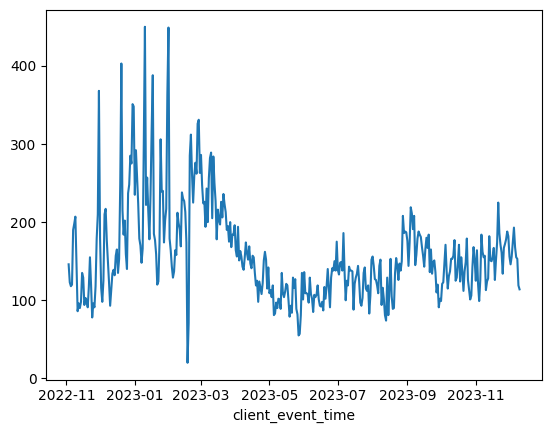

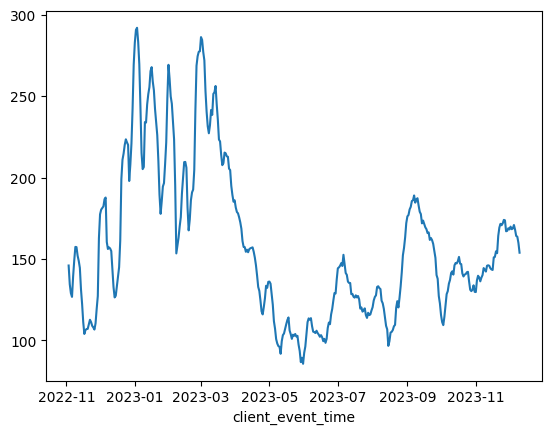

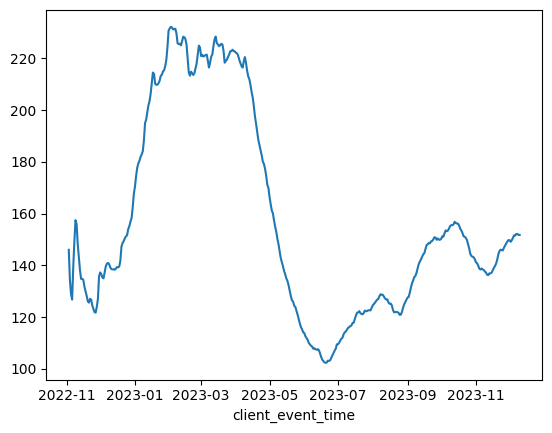

In [ ]:
first_enter_pay_date = first_enter_pay_df\
                        .groupby(first_enter_pay_df['client_event_time'].dt.date)\
                        .size()

# check head
display(first_enter_pay_date.head(5))

# day plot            
first_enter_pay_date.plot()
plt.show()

# week plot
first_enter_pay_date.rolling(min_periods=1, window=7).mean().plot()
plt.show()

# month plot
first_enter_pay_date.rolling(min_periods=1, window=50).mean().plot()
plt.show()

In [ ]:

print(f'first_subscript_df : {first_subscript_df.shape[0]}')
print(first_subscript_df.duplicated().sum())
print(f're_subscript_df : {re_subscript_df.shape[0]}')
print(re_subscript_df.duplicated().sum())
print(f'auto_pay_df : {auto_pay_df.shape[0]}')
print(auto_pay_df.duplicated().sum())

print("first_subscript_df, re_subscript_df")
temp = pd.merge(first_subscript_df, re_subscript_df
                , on=['user_id', 'client_event_time']
                , how='inner')
if temp.size > 0:
    temp = temp[['user_id', 'client_event_time']]
    display(temp)
    display(pd.merge(temp, first_subscript_df
                     , on=['user_id', 'client_event_time']
                     , how='inner'))
    display(pd.merge(temp, re_subscript_df
                     , on=['user_id', 'client_event_time']
                     , how='inner'))
    
print("auto_pay_df, re_subscript_df")
temp = pd.merge(auto_pay_df, re_subscript_df
                , on=['user_id', 'client_event_time']
                , how='inner')
if temp.size > 0:
    temp = temp[['user_id', 'client_event_time']]
    display(temp)
    display(pd.merge(temp, auto_pay_df
                     , on=['user_id', 'client_event_time']
                     , how='inner'))
    display(pd.merge(temp, re_subscript_df
                     , on=['user_id', 'client_event_time']
                     , how='inner'))

print("auto_pay_df, first_subscript_df")
temp = pd.merge(auto_pay_df, first_subscript_df
                , on=['user_id', 'client_event_time']
                , how='inner')
if temp.size > 0:
    temp = temp[['user_id', 'client_event_time']]
    display(temp)
    display(pd.merge(temp, auto_pay_df
                     , on=['user_id', 'client_event_time']
                     , how='inner'))
    display(pd.merge(temp, first_subscript_df
                     , on=['user_id', 'client_event_time']
                     , how='inner'))


first_subscript_df : 14289
2
re_subscript_df : 791
0
auto_pay_df : 15945
0
first_subscript_df, re_subscript_df
auto_pay_df, re_subscript_df


,user_id,client_event_time
0,0889fec8022c71328b877826576a764f,2022-11-18 02:49:40.687


,user_id,client_event_time,city,country,device_family,device_type,event_type,language,os_name,os_version,platform,plan_price,paid_amount,coupon_discount_amount,pg_type
0,0889fec8022c71328b877826576a764f,2022-11-18 02:49:40.687,Gwangjin-gu,South Korea,Windows,Windows,renew.subscription,Korean,Chrome,107.0.0.0,Web,15920,15442,478,NaN


,user_id,client_event_time,city,country,device_family,device_type,event_type,language,os_name,os_version,platform,plan_price,paid_amount,coupon_discount_amount,pg_type
0,0889fec8022c71328b877826576a764f,2022-11-18 02:49:40.687,Gwangjin-gu,South Korea,Windows,Windows,resubscribe.subscription,Korean,Chrome,107.0.0.0,Web,15920,15442,478,NaN


auto_pay_df, first_subscript_df


,user_id,client_event_time
0,7fb2da7924c07cc24515000c9d2f237a,2022-09-24 01:45:02.179
1,2466261a18d5757e8504ff8045d4b0e1,2022-09-24 13:09:30.345
2,7f6ac355cd862e7361735903b53f1c92,2022-09-26 10:20:01.953
3,08e0a0b1e7ae39f10cba93cfbfec6ec1,2022-11-11 17:10:01.825
4,6b889dac8d1646374b43ccd0130182ff,2022-11-17 08:45:02.108


,user_id,client_event_time,city,country,device_family,device_type,event_type,language,os_name,os_version,platform,plan_price,paid_amount,coupon_discount_amount,pg_type
0,7fb2da7924c07cc24515000c9d2f237a,2022-09-24 01:45:02.179,Mapo-gu,South Korea,Mac,Mac,renew.subscription,Korean,Chrome,105,Web,15920,15920,0,NaN
1,2466261a18d5757e8504ff8045d4b0e1,2022-09-24 13:09:30.345,Seoul,South Korea,Mac,Mac,renew.subscription,Korean,Safari,14,Web,15920,15920,0,NaN
2,7f6ac355cd862e7361735903b53f1c92,2022-09-26 10:20:01.953,Sejong,South Korea,Linux,Linux,renew.subscription,Korean,Chrome,91,Web,15920,15920,0,NaN
3,08e0a0b1e7ae39f10cba93cfbfec6ec1,2022-11-11 17:10:01.825,Gangnam-gu,South Korea,Windows,Windows,renew.subscription,Korean,Chrome,107,Web,15920,15920,0,NaN
4,6b889dac8d1646374b43ccd0130182ff,2022-11-17 08:45:02.108,Seoul,South Korea,Mac,Mac,renew.subscription,Korean,Chrome,107.0.0.0,Web,131600,131600,0,NaN


,user_id,client_event_time,city,country,device_family,device_type,event_type,language,os_name,os_version,platform,plan_price,paid_amount,coupon_discount_amount,pg_type
0,7fb2da7924c07cc24515000c9d2f237a,2022-09-24 01:45:02.179,Mapo-gu,South Korea,Mac,Mac,complete.subscription,Korean,Chrome,105,Web,15920,15920,0,NaN
1,2466261a18d5757e8504ff8045d4b0e1,2022-09-24 13:09:30.345,Seoul,South Korea,Mac,Mac,complete.subscription,Korean,Safari,14,Web,15920,15920,0,NaN
2,7f6ac355cd862e7361735903b53f1c92,2022-09-26 10:20:01.953,Sejong,South Korea,Linux,Linux,complete.subscription,Korean,Chrome,91,Web,15920,15920,0,NaN
3,08e0a0b1e7ae39f10cba93cfbfec6ec1,2022-11-11 17:10:01.825,Gangnam-gu,South Korea,Windows,Windows,complete.subscription,Korean,Chrome,107,Web,15920,15920,0,NaN
4,6b889dac8d1646374b43ccd0130182ff,2022-11-17 08:45:02.108,Seoul,South Korea,Mac,Mac,complete.subscription,Korean,Chrome,107.0.0.0,Web,131600,131600,0,NaN


첫 결제와 정기 결제는 겹치는게 없음\
만료후 재구독은 다른 두 데이터에서 겹치는 부분이 있지만\
수가 적고 데이터의 초기 부분이라 초기 운영의 오류의 수 있음

In [338]:
temp1 = first_subscript_df.groupby('user_id')['client_event_time'].min()
temp2 = auto_pay_df.groupby('user_id')['client_event_time'].min()
temp3 = re_subscript_df.groupby('user_id')['client_event_time'].min()

In [363]:
print(temp1.shape[0])
print(temp2.shape[0])

# merge first_subscript_df and auto_pay_df
result = pd.merge(temp1, temp2, how='inner', on='user_id')\
    .reset_index()\
    .rename(columns={'client_event_time_x' : 'first_subscript_date', 'client_event_time_y' : 'auto_pay_date'})
print(result.shape[0])

# Create a new column 'diff' in the result DataFrame
result['diff'] = result['first_subscript_date'] - result['auto_pay_date']
result['diff'] = result['diff'].dt.total_seconds()
result['diff'] = result['diff']

# 날짜 대소 비교
temp = result[result['diff'].abs() < 600]
display(temp)
display(temp['diff'].describe())
temp = result[result['diff'].abs() >= 600]
display(temp)
display(temp['diff'].describe())

13881
7498
5385


,user_id,first_subscript_date,auto_pay_date,diff
9,00713a0e97135815ea700dfe82ce49fb,2022-10-07 15:40:01.797,2022-10-07 15:40:01.779,0.018
18,010a4a8efd5fd2528719b5bd8098286a,2022-10-07 00:30:02.524,2022-10-07 00:30:02.004,0.520
21,0126ad7cca27944f9856d7c6ec5974b5,2022-10-03 01:20:01.864,2022-10-03 01:20:02.723,-0.859
24,01449049533c7dfe50cdfbdb605410e2,2022-11-06 19:05:02.671,2022-11-06 19:05:02.672,-0.001
27,0157e1eaf2645e7d4de1fba14fe72a0f,2022-10-10 02:40:01.405,2022-10-10 02:40:01.533,-0.128
...,...,...,...,...
5312,fc52c92792b44f3f461ddc1167aa90a1,2022-11-07 01:15:01.136,2022-11-07 01:15:01.644,-0.508
5319,fcdf96b4de5958aeabf554e6f7e9daec,2022-09-28 02:10:02.126,2022-09-28 02:10:01.625,0.501
5324,fd35e6f4c96e4f1d2b5ebd12ef26bced,2022-10-09 10:00:03.650,2022-10-09 10:00:02.763,0.887
5337,fdb13da083ec2460c8ab4dd4218363a0,2022-11-06 08:00:02.938,2022-11-06 08:00:02.412,0.526


count    479.000000
mean      -1.350777
std       23.333267
min     -451.367000
25%       -0.019000
50%        0.013000
75%        0.520000
max        1.411000
Name: diff, dtype: float64

,user_id,first_subscript_date,auto_pay_date,diff
0,0000572f2ba8079bcefd2760b632e820,2023-03-25 14:40:01.647,2023-04-25 14:45:01.747,-2.678700e+06
1,000be07bc09ceff42c11978f4a9f1c1a,2022-08-20 13:05:01.083,2022-11-20 13:10:01.891,-7.949101e+06
2,001ddbe4885db89888b34bf0eb14f6e1,2022-04-10 06:02:28.859,2023-01-21 09:00:05.092,-2.472106e+07
3,002109ba574914ed127dcae867110f91,2022-02-17 02:39:54.910,2023-02-17 08:10:06.967,-3.155581e+07
4,0031482d16469048027f6096d13c8b22,2023-09-10 23:34:21.696,2023-10-10 23:35:02.550,-2.592041e+06
...,...,...,...,...
5380,ffa1cfa6bc3b410a927be11e23ff5340,2022-12-19 12:50:01.076,2023-12-31 14:42:16.966,-3.257954e+07
5381,ffb19e67ac35d18a6711c55d2ace39ba,2022-08-10 05:25:22.823,2022-09-10 05:30:02.277,-2.678679e+06
5382,ffe13db0ad3751c9be06a73aa38bc9fc,2022-09-08 02:35:01.476,2022-10-08 02:40:02.035,-2.592301e+06
5383,ffe3e486f61399d62d83727e53a850dc,2022-07-30 06:04:32.692,2023-07-31 02:03:05.911,-3.160791e+07


count    4.906000e+03
mean    -8.818868e+06
std      1.033928e+07
min     -5.812338e+07
25%     -9.797943e+06
50%     -2.768429e+06
75%     -2.592301e+06
max     -6.000720e+02
Name: diff, dtype: float64

첫 구독과 정기 결제가 시간적으로 동일한(오차 1초 이내) 데이터가 존재한다.
두 데이터는 일부분 겹친다.\
첫구독은 언제나 구독날짜가 동일하거나 앞서있다.

In [362]:
print(temp2.shape[0])
print(temp3.shape[0])

# merge re_subscript_df and auto_pay_df
result = pd.merge(temp2, temp3, how='inner', on='user_id')\
    .reset_index()\
    .rename(columns={'client_event_time_x' : 'auto_pay_date', 'client_event_time_y' : 're_subscript_date'})
print(result.shape[0])

# Create a new column 'diff' in the result DataFrame
result['diff'] = result['auto_pay_date'] - result['re_subscript_date']
result['diff'] = result['diff'].dt.total_seconds()
result['diff'] = result['diff']

# 날짜 대소 비교
temp = result[result['diff'].abs() < 600]
display(temp)
display(temp['diff'].describe())
temp = result[result['diff'].abs() >= 600]
display(temp)
display(temp['diff'].describe())

7498
761
511


,user_id,auto_pay_date,re_subscript_date,diff
2,01420e0a936792dbdcabad14fe9fece1,2022-11-13 10:05:13.135,2022-11-13 10:05:13.681,-0.546
18,04230eb1c628b99fb70aa483344e47ad,2022-11-13 04:39:41.375,2022-11-13 04:39:42.825,-1.450
24,0772cb88d17b51d6822f12f315ba6687,2022-11-19 08:21:36.490,2022-11-19 08:21:36.503,-0.013
28,0889fec8022c71328b877826576a764f,2022-11-18 02:49:40.687,2022-11-18 02:49:40.687,0.000
51,1562a3b4d08ee3c44e068009fe01cbbe,2022-11-13 17:14:21.671,2022-11-13 17:14:21.661,0.010
57,1be14d4ed3bef4e82d3a2331ace77dc1,2022-11-08 10:50:44.742,2022-11-08 10:50:43.860,0.882
71,23a69672ced44709d2790430b6fecf33,2022-11-29 08:37:26.761,2022-11-29 08:37:27.293,-0.532
98,35588439329bcfa58841c588aba35201,2023-08-01 05:48:02.091,2023-08-01 05:40:11.642,470.449
106,3966266887fba64584a2c890fd7400d5,2022-11-12 04:48:28.011,2022-11-12 04:48:28.116,-0.105
129,4591c8f94f84533e7013713d9302a70b,2022-11-11 07:16:59.188,2022-11-11 07:16:59.748,-0.560


count     29.000000
mean      32.422828
std      122.401396
min       -1.665000
25%       -0.542000
50%       -0.105000
75%        0.001000
max      478.173000
Name: diff, dtype: float64

,user_id,auto_pay_date,re_subscript_date,diff
0,0108538a502bb0339cdee7d33f96a510,2023-02-01 01:05:26.946,2023-11-27 00:03:46.443,-2.582990e+07
1,010a54b7adcb47015c5813cf8509461e,2022-09-20 12:30:50.004,2023-04-13 03:36:01.458,-1.767991e+07
3,0169c3e54cbd0d8b35d7dd59b40ca65c,2022-10-13 06:00:07.462,2022-09-13 05:59:00.147,2.592067e+06
4,01946f0541feaf69418576cd1f77e321,2022-10-13 03:00:01.358,2023-07-10 02:22:25.467,-2.332574e+07
5,01bb08e6b27802710bb8421493ae3688,2023-09-10 12:40:03.073,2023-08-10 12:35:25.240,2.678678e+06
...,...,...,...,...
506,ff27c0ef4f7c2c87a09e295c496727f5,2023-07-25 02:35:02.556,2023-12-18 05:11:13.874,-1.262377e+07
507,ff917e8b6bcf53a48bd1b1efae5d00f5,2023-09-25 03:20:03.315,2022-09-25 03:17:16.348,3.153617e+07
508,ff9bb243eff83d84e2cb289ff629aba8,2023-08-25 07:03:48.454,2023-07-25 06:31:11.205,2.680357e+06
509,ffe13db0ad3751c9be06a73aa38bc9fc,2022-10-08 02:40:02.035,2023-08-19 13:29:33.039,-2.725497e+07


count    4.820000e+02
mean    -6.401387e+06
std      1.270910e+07
min     -3.965727e+07
25%     -1.596852e+07
50%      2.592007e+06
75%      2.678587e+06
max      3.153617e+07
Name: diff, dtype: float64

정기 결제와 재 구독은 겹치지 않는다.

In [361]:
print(temp1.shape[0])
print(temp3.shape[0])

result = pd.merge(temp1, temp3, how='inner', on='user_id')\
    .reset_index()\
    .rename(columns={'client_event_time_x' : 'first_subscript_date', 'client_event_time_y' : 're_subscript_date'})
print(result.shape[0])

result['diff'] = result['re_subscript_date'] - result['first_subscript_date']
result['diff'] = result['diff'].dt.total_seconds()
result['diff'] = result['diff']

# 날짜 대소 비교
temp = result[result['diff'].abs() < 600]
display(temp)
display(temp['diff'].describe())
temp = result[result['diff'].abs() >= 600]
display(temp)
display(temp['diff'].describe())

13881
761
402


,user_id,first_subscript_date,re_subscript_date,diff
7,0308b8ea736768f9399d3b81d34b00a0,2022-10-17 12:11:11.485,2022-10-17 12:11:11.486,0.001
41,182f52b6dcc8288afce0a629b4de3a9f,2022-10-18 08:00:02.292,2022-10-18 08:00:02.816,0.524
43,1a9bc9f6ba2ab755b45b04d981555ba5,2022-10-02 23:20:15.717,2022-10-02 23:20:14.827,-0.890
49,1d8c3941b13b5fd9969bbf2a350bc8cf,2022-10-25 02:06:12.900,2022-10-25 02:06:13.336,0.436
51,1da0b4afbbf62bbfa74e8e22c710919c,2022-11-01 10:10:33.510,2022-11-01 10:10:34.409,0.899
59,2466261a18d5757e8504ff8045d4b0e1,2022-09-24 07:43:38.349,2022-09-24 07:43:38.321,-0.028
63,274b46e35dfbfd919ef8ec923a3a16bb,2022-11-13 01:56:11.643,2022-11-13 01:56:11.784,0.141
77,308ee0950741e4321045d0ba604778de,2022-09-12 02:09:15.703,2022-09-12 02:09:15.193,-0.510
84,374312364e615be115ae0b43759a2b72,2022-10-01 14:09:51.447,2022-10-01 14:09:50.556,-0.891
104,41aa0116e4ddf9f13e4ccabd7f1f8040,2022-10-01 10:38:26.892,2022-10-01 10:38:27.442,0.550


count    22.000000
mean     -0.085636
std       0.482698
min      -0.891000
25%      -0.515500
50%      -0.006500
75%       0.108000
max       0.899000
Name: diff, dtype: float64

,user_id,first_subscript_date,re_subscript_date,diff
0,010a54b7adcb47015c5813cf8509461e,2022-07-18 00:53:24.343,2023-04-13 03:36:01.458,2.325136e+07
1,01420e0a936792dbdcabad14fe9fece1,2022-02-19 03:27:16.121,2022-11-13 10:05:13.681,2.309268e+07
2,01946f0541feaf69418576cd1f77e321,2022-10-13 03:00:01.875,2023-07-10 02:22:25.467,2.332574e+07
3,0221a206c47958f0983da6875b7c8e0f,2022-06-15 17:34:51.345,2022-10-25 08:36:09.184,1.137248e+07
4,0292f9b9e5eee6d5419862b20151993e,2023-07-27 10:03:51.920,2023-11-07 04:56:51.178,8.880779e+06
...,...,...,...,...
397,fe551a948c862c220158e34d3bc2bc47,2023-08-01 05:23:00.896,2023-12-19 06:26:21.393,1.209980e+07
398,ff27c0ef4f7c2c87a09e295c496727f5,2023-06-25 02:30:40.699,2023-12-18 05:11:13.874,1.521603e+07
399,ff386ac202b4d9791259039e8f5879f4,2023-07-23 04:03:59.033,2023-12-23 09:30:13.106,1.323877e+07
400,ff9bb243eff83d84e2cb289ff629aba8,2023-03-22 06:30:01.899,2023-07-25 06:31:11.205,1.080007e+07


count    3.800000e+02
mean     2.275585e+07
std      1.319475e+07
min      4.046058e+06
25%      1.217153e+07
50%      1.871865e+07
75%      3.264609e+07
max      5.720753e+07
Name: diff, dtype: float64

첫 구독과 재구독가 시간적으로 동일한(오차 1초 이내) 데이터가 존재한다.
두 데이터는 일부분 겹친다.\
첫구독은 언제나 구독날짜가 동일하거나 앞서있다.

In [337]:
temp = first_subscript_df.groupby('user_id')['user_id'].count()
temp[temp > 1].sort_values(ascending=False)

user_id
3767d4c7a827422fccf61d45ae889669    8
f833cca4c382ac8c502c6f99bc432725    6
ccea16701cf72a9027d7d5f2c3d3019c    5
e04c24e899b1e875ed432a7b398a4308    4
1718432f54ebca48832fc7ee9a82810e    3
                                   ..
5817b1cfddd5cf26d9060b21949e526d    2
5802bceee9ecedf9a8b5608598bc19e0    2
57d0d79f7f708d49bcb33e24d7ba1e78    2
57ccaec293dd573fcd8d7697919719a6    2
ffe3e486f61399d62d83727e53a850dc    2
Name: user_id, Length: 361, dtype: int64

In [450]:
## set
# union all the pay data and compact
total_pay_df = pd.concat([first_subscript_df, re_subscript_df, auto_pay_df], axis=0).reset_index(drop=True)
total_pay_df = total_pay_df[['user_id', 'client_event_time', 'event_type']]

# sort by event time
total_pay_df = total_pay_df.sort_values(['user_id', 'client_event_time'])

# display
display(f'first_subscript_df : {first_subscript_df.shape[0]}')
display(f're_subscript_df : {re_subscript_df.shape[0]}')
display(f'auto_pay_df : {auto_pay_df.shape[0]}')
display(total_pay_df.shape[0])

temp = total_pay_df.groupby('user_id').count()
temp = temp[temp['client_event_time'] > 1]
mask = total_pay_df['user_id'].isin(temp.index)
display(total_pay_df[mask].head(25))

## process
# check too close log
temp = total_pay_df.groupby('user_id')['client_event_time'].diff().dt.total_seconds()
temp = temp.dropna().astype('float64')
display(temp)

too_close_log_index = temp[temp < 60].index
first_log_index = total_pay_df.groupby('user_id')['client_event_time'].idxmin().values

## get too close log
# mask : first + too close log
first_log_index = total_pay_df.groupby('user_id')['client_event_time'].idxmin().values
mask = list(first_log_index) + list(too_close_log_index)
mask = list(set(mask))
mask = total_pay_df.index.isin(mask)

# get only 'count() > 1' user
temp = total_pay_df[mask]
temp = temp.groupby('user_id')['user_id'].count()
too_close_log_user = temp[temp > 1].index

# get too close log in total_pay_df
result = total_pay_df[mask]
result = result[result['user_id'].isin(too_close_log_user)]
display(result)

# value count
result.groupby('user_id')['event_type'].sum().str.replace('.subscription', ', ').value_counts()

'first_subscript_df : 14289'

're_subscript_df : 791'

'auto_pay_df : 15945'

31025

,user_id,client_event_time,event_type
3179,0000572f2ba8079bcefd2760b632e820,2023-03-25 14:40:01.647,complete.subscription
22508,0000572f2ba8079bcefd2760b632e820,2023-04-25 14:45:01.747,renew.subscription
23150,0000572f2ba8079bcefd2760b632e820,2023-05-25 14:50:01.753,renew.subscription
3628,000be07bc09ceff42c11978f4a9f1c1a,2022-08-20 13:05:01.083,complete.subscription
17585,000be07bc09ceff42c11978f4a9f1c1a,2022-11-20 13:10:01.891,renew.subscription
20605,000be07bc09ceff42c11978f4a9f1c1a,2023-01-25 06:16:22.464,renew.subscription
4645,001ddbe4885db89888b34bf0eb14f6e1,2022-04-10 06:02:28.859,complete.subscription
20473,001ddbe4885db89888b34bf0eb14f6e1,2023-01-21 09:00:05.092,renew.subscription
5796,002109ba574914ed127dcae867110f91,2022-02-17 02:39:54.910,complete.subscription
21319,002109ba574914ed127dcae867110f91,2023-02-17 08:10:06.967,renew.subscription


22508    2.678700e+06
23150    2.592300e+06
17585    7.949101e+06
20605    5.677581e+06
20473    2.472106e+07
             ...     
22768    2.592300e+06
23466    2.678700e+06
25174    5.152425e+06
27086    4.406328e+06
14849    8.138235e+06
Name: client_event_time, Length: 14878, dtype: float64

,user_id,client_event_time,event_type
16202,00713a0e97135815ea700dfe82ce49fb,2022-10-07 15:40:01.779,renew.subscription
7743,00713a0e97135815ea700dfe82ce49fb,2022-10-07 15:40:01.797,complete.subscription
16164,010a4a8efd5fd2528719b5bd8098286a,2022-10-07 00:30:02.004,renew.subscription
9532,010a4a8efd5fd2528719b5bd8098286a,2022-10-07 00:30:02.524,complete.subscription
4691,0126ad7cca27944f9856d7c6ec5974b5,2022-10-03 01:20:01.864,complete.subscription
...,...,...,...
7574,fdb13da083ec2460c8ab4dd4218363a0,2022-11-06 08:00:02.938,complete.subscription
9281,fdd65930c3cb37b64725377df0a7b380,2022-11-17 06:20:03.725,complete.subscription
9282,fdd65930c3cb37b64725377df0a7b380,2022-11-17 06:20:03.875,complete.subscription
8131,fe47fabc4baa52ef9f85cd749349a33f,2022-09-25 15:10:01.739,complete.subscription


event_type
renew, complete,                     259
complete, renew,                     190
complete, complete,                   48
complete, resubscribe,                22
renew, complete, complete,            21
renew, resubscribe,                   10
resubscribe, complete,                10
complete, renew, complete,             6
complete, renew, renew,                5
renew, complete, renew,                5
resubscribe, renew,                    4
resubscribe, complete, renew,          1
complete, resubscribe, complete,       1
renew, complete, renew, renew,         1
resubscribe, complete, complete,       1
complete, complete, renew,             1
Name: count, dtype: int64